In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install nolds

In [3]:
pip install nltk

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Descargar el léxico de WordNet
nltk.download('wordnet')

#Pruebas 3

In [ ]:
# Descargar recursos necesarios
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
from keras.preprocessing.text import Tokenizer
import re
import numpy as np
import warnings
from nltk.stem import WordNetLemmatizer
#import tensorflow as tf

# iniciar el lematizador
lemmatizer = WordNetLemmatizer()

# funcion para lematizar texto
def lematizar_texto(texto):
    tokens = nltk.word_tokenize(texto)
    lematizados = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lematizados)

# funcion Hurst
def genhurst(S,q):

    L=len(S)
    if L < 100:
        warnings.warn('Data series very short!')

    H = np.zeros((len(range(5,20)),1))
    k = 0

    for Tmax in range(5,20):

        x = np.arange(1,Tmax+1,1)
        mcord = np.zeros((Tmax,1))

        for tt in range(1,Tmax+1):
            dV = S[np.arange(tt,L,tt)] - S[np.arange(tt,L,tt)-tt]
            VV = S[np.arange(tt,L+tt,tt)-tt]
            N = len(dV) + 1
            X = np.arange(1,N+1,dtype=np.float64)
            Y = VV
            mx = np.sum(X)/N
            SSxx = np.sum(X**2) - N*mx**2
            my = np.sum(Y)/N
            SSxy = np.sum( np.multiply(X,Y))  - N*mx*my
            cc1 = SSxy/SSxx
            cc2 = my - cc1*mx
            ddVd = dV - cc1
            VVVd = VV - np.multiply(cc1,np.arange(1,N+1,dtype=np.float64)) - cc2
            mcord[tt-1] = np.mean( np.abs(ddVd)**q )/np.mean( np.abs(VVVd)**q )

        mx = np.mean(np.log10(x))
        SSxx = np.sum( np.log10(x)**2) - Tmax*mx**2
        my = np.mean(np.log10(mcord))
        SSxy = np.sum( np.multiply(np.log10(x),np.transpose(np.log10(mcord)))) - Tmax*mx*my
        H[k] = SSxy/SSxx
        k = k + 1

    mH = np.mean(H)/q

    return mH

# Función para limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Quitar signos de puntuación
    #texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Textos de ejemplo
textos = ["Automatically Generating Rhythmic Verse with Neural Networks. We propose two novel methodologies for the automatic generation of rhythmic poetry in a variety of forms. The first approach uses a neural language model trained on a phonetic encoding to learn an implicit representation of both the form and content of English poetry. This model can effectively learn common poetic devices such as rhyme, rhythm and alliteration. The second approach considers poetry generation as a constraint satisfaction problem where a generative neural language model is tasked with learning a representation of content, and a discriminative weighted finite state machine constrains it on the basis of form. By manipulating the constraints of the latter model, we can generate coherent poetry with arbitrary forms and themes. A large-scale extrinsic evaluation demonstrated that participants consider machine-generated poems to be written by humans 54% of the time. In addition, participants rated a machinegenerated poem to be the best amongst all evaluated.Poetry is an advanced form of linguistic communication, in which a message is conveyed that satisfies both aesthetic and semantic constraints. As poetry is one of the most expressive forms of language, the automatic creation of texts recognisable as poetry is difficult. In addition to requiring an understanding of many aspects of language including phonetic patterns such as rhyme, rhythm and alliteration, poetry composition also requires a deep understanding of the meaning of language.Poetry generation can be dividd into two subtasks, namely the problem of content, which is concerned with a poem’s semantics, and the problem of form, which is concerned with the aesthetic rules that a poem follows. These rules may describe aspects of the literary devices used, and are usually highly prescriptive. Examples of different forms of poetry are limericks, ballads and sonnets. Limericks, for example, are characterised by their strict rhyme scheme (AABBA), their rhythm (two unstressed syllables followed by one stressed syllable) and their shorter third and fourth lines. Creating such poetry requires not only an understanding of the language itself, but also of how it sounds when spoken aloud. Statistical text generation usually requires the construction of a generative language model that explicitly learns the probability of any given word given previous context. Neural language models (Schwenk and Gauvain, 2005; Bengio et al., 2006) have garnered signficant research interest for their ability to learn complex syntactic and semantic representations of natural language (Mikolov et al., 2010; Sutskever et al., 2014; Cho et al., 2014; Kim et al., 2015). Poetry generation is an interesting application, since performing this task automatically requires the creation of models that not only focus on what is being written (content), but also on how it is being written (form). We experiment with two novel methodologies for solving this task. The first involves training a model to learn an implicit representation of content and form through the use of a phonological encoding. The second involves training a generative language model to represent content, which is then constrained by a discriminative pronunciation model, representing form. This second model is of particular interest because poetry with arbitrary rhyme,e rhythm, repetition and themes can be generated by tuning the pronunciation model.Our contributions are twofold. First, we developed a neural language model trained on a phonetic transliteration of poetic form and content. Although example output looked promising, this model was limited by its inability to generalise to novel forms of verse. We then proposed a more robust model trained on unformed poetic text, whose output form is constrained at sample time. This approach offers greater control over the style of the generated poetry than the earlier method, and facilitates themes and poetic devices. An indistinguishability test, where participants were asked to classify a randomly selected set of human “nonsense verse” and machine-generated poetry, showed generated poetry to be indistinguishable from that written by humans. In addition, the poems that were deemed most ‘humanlike’, most aesthetic and most emotive, respectively, were all machine-generated. In future work, it would be useful to investigate models based on morphemes, rather than characters, which offers potentially superior performance for complex and rare words (Luong et al., 2013), which are common in poetry"]

# Inicializar el Tokenizer
tokenizer = Tokenizer()
# Crear una instancia de la clase Tokenizer
#tokenizer = tf.keras.preprocessing.text.Tokenizer()

# Recorrer textos
for texto in textos:
    # Limpiar el texto
    texto_limpio = limpiar_texto(texto)

    # Lematizar el texto limpio
    texto_lematizado = lematizar_texto(texto_limpio)
    print(f"texto lematizado: {texto_lematizado}")
    #print(f"El tamaño del texto lematizado: {len(texto_lematizado)}")

    #tokenizar texto
    #tokenizer.fit_on_texts(texto_lematizado)
    #secuencia = tokenizer.texts_to_sequences(texto_lematizado)
    tokenizer.fit_on_texts([texto_lematizado])
    secuencia_tokens = tokenizer.texts_to_sequences([texto_lematizado])[0]

    print(f"El tamaño de la secuencia es: {len(secuencia_tokens)}")
    print(f"secuencia: {secuencia_tokens}")
    q = 1 # ajustar el valor de q

    #Aplicar Hurst----------------------
    #print(np.array(secuencia))
    H = genhurst(np.array(secuencia_tokens), q)
    #secuencia_flatten = np.array(secuencia).flatten()
    #print(secuencia_flatten)
    #H = genhurst(secuencia_tokens, q)


    print(f"Texto original: {texto}")
    print(f"Texto limpio: {texto_limpio}")
    print(f"Hurst para el texto: {H}\n")


texto lematizado: automatically generating rhythmic verse with neural network . we propose two novel methodology for the automatic generation of rhythmic poetry in a variety of form . the first approach us a neural language model trained on a phonetic encoding to learn an implicit representation of both the form and content of english poetry . this model can effectively learn common poetic device such a rhyme , rhythm and alliteration . the second approach considers poetry generation a a constraint satisfaction problem where a generative neural language model is tasked with learning a representation of content , and a discriminative weighted finite state machine constrains it on the basis of form . by manipulating the constraint of the latter model , we can generate coherent poetry with arbitrary form and theme . a large-scale extrinsic evaluation demonstrated that participant consider machine-generated poem to be written by human 54 % of the time . in addition , participant rated a ma

In [ ]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

## CON stopwords

In [ ]:
import nltk
from keras.preprocessing.text import Tokenizer
import re
import numpy as np
import warnings
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# funcion lematizar texto
def lematizar_texto(texto):
    tokens = nltk.word_tokenize(texto)
    lematizados = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lematizados)

#funcion Hurst
def genhurst(S,q):

    L=len(S)
    if L < 100:
        warnings.warn('Data series very short!')

    H = np.zeros((len(range(5,20)),1))
    k = 0

    for Tmax in range(5,20):

        x = np.arange(1,Tmax+1,1)
        mcord = np.zeros((Tmax,1))

        for tt in range(1,Tmax+1):
            dV = S[np.arange(tt,L,tt)] - S[np.arange(tt,L,tt)-tt]
            VV = S[np.arange(tt,L+tt,tt)-tt]
            N = len(dV) + 1
            X = np.arange(1,N+1,dtype=np.float64)
            Y = VV
            mx = np.sum(X)/N
            SSxx = np.sum(X**2) - N*mx**2
            my = np.sum(Y)/N
            SSxy = np.sum( np.multiply(X,Y))  - N*mx*my
            cc1 = SSxy/SSxx
            cc2 = my - cc1*mx
            ddVd = dV - cc1
            VVVd = VV - np.multiply(cc1,np.arange(1,N+1,dtype=np.float64)) - cc2
            mcord[tt-1] = np.mean( np.abs(ddVd)**q )/np.mean( np.abs(VVVd)**q )

        mx = np.mean(np.log10(x))
        SSxx = np.sum( np.log10(x)**2) - Tmax*mx**2
        my = np.mean(np.log10(mcord))
        SSxy = np.sum( np.multiply(np.log10(x),np.transpose(np.log10(mcord)))) - Tmax*mx*my
        H[k] = SSxy/SSxx
        k = k + 1

    mH = np.mean(H)/q

    return mH

#quitar stopwords
def remove_stopwords(text):
    # Tokenizar el texto
    words = word_tokenize(text)

    # Obtener la lista de stopwords en inglés
    stop_words = set(stopwords.words("english"))

    # Filtrar las palabras que no son stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Unir las palabras
    filtered_text = ' '.join(filtered_words)

    return filtered_text

# funcion para limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Quitar signos de puntuación
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Textos de ejemplo
textos = ["Automatically Generating Rhythmic Verse with Neural Networks. We propose two novel methodologies for the automatic generation of rhythmic poetry in a variety of forms. The first approach uses a neural language model trained on a phonetic encoding to learn an implicit representation of both the form and content of English poetry. This model can effectively learn common poetic devices such as rhyme, rhythm and alliteration. The second approach considers poetry generation as a constraint satisfaction problem where a generative neural language model is tasked with learning a representation of content, and a discriminative weighted finite state machine constrains it on the basis of form. By manipulating the constraints of the latter model, we can generate coherent poetry with arbitrary forms and themes. A large-scale extrinsic evaluation demonstrated that participants consider machine-generated poems to be written by humans 54% of the time. In addition, participants rated a machinegenerated poem to be the best amongst all evaluated.Poetry is an advanced form of linguistic communication, in which a message is conveyed that satisfies both aesthetic and semantic constraints. As poetry is one of the most expressive forms of language, the automatic creation of texts recognisable as poetry is difficult. In addition to requiring an understanding of many aspects of language including phonetic patterns such as rhyme, rhythm and alliteration, poetry composition also requires a deep understanding of the meaning of language.Poetry generation can be dividd into two subtasks, namely the problem of content, which is concerned with a poem’s semantics, and the problem of form, which is concerned with the aesthetic rules that a poem follows. These rules may describe aspects of the literary devices used, and are usually highly prescriptive. Examples of different forms of poetry are limericks, ballads and sonnets. Limericks, for example, are characterised by their strict rhyme scheme (AABBA), their rhythm (two unstressed syllables followed by one stressed syllable) and their shorter third and fourth lines. Creating such poetry requires not only an understanding of the language itself, but also of how it sounds when spoken aloud. Statistical text generation usually requires the construction of a generative language model that explicitly learns the probability of any given word given previous context. Neural language models (Schwenk and Gauvain, 2005; Bengio et al., 2006) have garnered signficant research interest for their ability to learn complex syntactic and semantic representations of natural language (Mikolov et al., 2010; Sutskever et al., 2014; Cho et al., 2014; Kim et al., 2015). Poetry generation is an interesting application, since performing this task automatically requires the creation of models that not only focus on what is being written (content), but also on how it is being written (form). We experiment with two novel methodologies for solving this task. The first involves training a model to learn an implicit representation of content and form through the use of a phonological encoding. The second involves training a generative language model to represent content, which is then constrained by a discriminative pronunciation model, representing form. This second model is of particular interest because poetry with arbitrary rhyme,e rhythm, repetition and themes can be generated by tuning the pronunciation model.Our contributions are twofold. First, we developed a neural language model trained on a phonetic transliteration of poetic form and content. Although example output looked promising, this model was limited by its inability to generalise to novel forms of verse. We then proposed a more robust model trained on unformed poetic text, whose output form is constrained at sample time. This approach offers greater control over the style of the generated poetry than the earlier method, and facilitates themes and poetic devices. An indistinguishability test, where participants were asked to classify a randomly selected set of human “nonsense verse” and machine-generated poetry, showed generated poetry to be indistinguishable from that written by humans. In addition, the poems that were deemed most ‘humanlike’, most aesthetic and most emotive, respectively, were all machine-generated. In future work, it would be useful to investigate models based on morphemes, rather than characters, which offers potentially superior performance for complex and rare words (Luong et al., 2013), which are common in poetry"]

# inicializar el Tokenizer
tokenizer = Tokenizer()

textos_limpios = []

# Recorrer textos
for texto in textos:
    # Limpiar el texto
    texto_limpio = limpiar_texto(texto)
    texto_sin_stopwords = remove_stopwords(texto_limpio)

    # Lematizar el texto limpio
    texto_lematizado = lematizar_texto(texto_sin_stopwords)
    #print(f"El tamaño del texto lematizado: {len(texto_lematizado)}")

    tokenizer.fit_on_texts([texto_lematizado])
    secuencia = tokenizer.texts_to_sequences([texto_lematizado])[0]

    print(f"El tamaño de la secuencia es: {len(secuencia)}")

    q = 1 # ajustar el valor de q

    # Aplicar Hurst
    print(np.array(secuencia))
    H = genhurst(np.array(secuencia), q)
    #secuencia_flatten = np.array(secuencia).flatten()
    #print(secuencia_flatten)
    #H = genhurst(secuencia_flatten, q)


    print(f"Texto original: {texto}")
    print(f"Texto limpio: {texto_limpio}")
    print(f"Hurst para el texto: {H}\n")


El tamaño de la secuencia es: 417
[ 41  73  42  19   8  74  75  11  20  43  44   9  42   1  76   3  21  22
  77   8   4   2  23  24  45  12  46  13   3   5  78   1   2  79  12  47
  14  25  26  15  48  27  22  80   1   9  28  81  29  30   8   4   2  82
  83  13   5  49  84  85  86  87  88  89   3  90  28  91   2  92  93   1
  50   3  31  94  95  96  97  32  98  16  10  17  33  99  51  34  32 100
  16  10 101 102 103 104   3 105 106 107 108 109  35  52  28   1  53 110
   3   4  44  54  36 111   1 112  34 113  37 114  55   4 115  24 116  26
  15  48   1 117  38  18 118  37 119 120   9 121  11 122 123  29   5  56
  10 124  29   3  56  35  57  10 125  57 126 127  55 128  25 129  58 130
 131  39 132   3   1  59 133 134  59  39 135 136  26 137 138  15  11 139
  60 140  53 141  60 142 143 144 145 146   1  18  37   4  38 147 148 149
 150  36   9  58  18 151  30   4   2 152 153 154  61  62  61 155 156   8
   4   2 157 158 159 160   6   7 161 162 163 164  63 165  12  64 166  52
  13 167   4 168 

#hurst con embeddings prueba

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
from keras.preprocessing.text import Tokenizer
import re
import numpy as np
import io
import warnings
from nltk.stem import WordNetLemmatizer
#import tensorflow as tf

#Función para cargar embeddings
def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = list(map(float, tokens[1:]))
    return data

# iniciar el lematizador
lemmatizer = WordNetLemmatizer()

# funcion para lematizar texto
def lematizar_texto(texto):
    tokens = nltk.word_tokenize(texto)
    lematizados = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lematizados)

# funcion Hurst
def genhurst(S,q):

    L=len(S)
    if L < 100:
        warnings.warn('Data series very short!')

    H = np.zeros((len(range(5,20)),1))
    k = 0

    for Tmax in range(5,20):

        x = np.arange(1,Tmax+1,1)
        mcord = np.zeros((Tmax,1))

        for tt in range(1,Tmax+1):
            dV = S[np.arange(tt,L,tt)] - S[np.arange(tt,L,tt)-tt]
            VV = S[np.arange(tt,L+tt,tt)-tt]
            N = len(dV) + 1
            X = np.arange(1,N+1,dtype=np.float64)
            Y = VV
            mx = np.sum(X)/N
            SSxx = np.sum(X**2) - N*mx**2
            my = np.sum(Y)/N
            SSxy = np.sum( np.multiply(X,Y))  - N*mx*my
            cc1 = SSxy/SSxx
            cc2 = my - cc1*mx
            ddVd = dV - cc1
            VVVd = VV - np.multiply(cc1,np.arange(1,N+1,dtype=np.float64)) - cc2
            mcord[tt-1] = np.mean( np.abs(ddVd)**q )/np.mean( np.abs(VVVd)**q )

        mx = np.mean(np.log10(x))
        SSxx = np.sum( np.log10(x)**2) - Tmax*mx**2
        my = np.mean(np.log10(mcord))
        SSxy = np.sum( np.multiply(np.log10(x),np.transpose(np.log10(mcord)))) - Tmax*mx*my
        H[k] = SSxy/SSxx
        k = k + 1

    mH = np.mean(H)/q

    return mH

# Función para limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Quitar signos de puntuación
    #texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Textos de ejemplo
textos = ["Automatically Generating Rhythmic Verse with Neural Networks. We propose two novel methodologies for the automatic generation of rhythmic poetry in a variety of forms. The first approach uses a neural language model trained on a phonetic encoding to learn an implicit representation of both the form and content of English poetry. This model can effectively learn common poetic devices such as rhyme, rhythm and alliteration. The second approach considers poetry generation as a constraint satisfaction problem where a generative neural language model is tasked with learning a representation of content, and a discriminative weighted finite state machine constrains it on the basis of form. By manipulating the constraints of the latter model, we can generate coherent poetry with arbitrary forms and themes. A large-scale extrinsic evaluation demonstrated that participants consider machine-generated poems to be written by humans 54% of the time. In addition, participants rated a machinegenerated poem to be the best amongst all evaluated.Poetry is an advanced form of linguistic communication, in which a message is conveyed that satisfies both aesthetic and semantic constraints. As poetry is one of the most expressive forms of language, the automatic creation of texts recognisable as poetry is difficult. In addition to requiring an understanding of many aspects of language including phonetic patterns such as rhyme, rhythm and alliteration, poetry composition also requires a deep understanding of the meaning of language.Poetry generation can be dividd into two subtasks, namely the problem of content, which is concerned with a poem’s semantics, and the problem of form, which is concerned with the aesthetic rules that a poem follows. These rules may describe aspects of the literary devices used, and are usually highly prescriptive. Examples of different forms of poetry are limericks, ballads and sonnets. Limericks, for example, are characterised by their strict rhyme scheme (AABBA), their rhythm (two unstressed syllables followed by one stressed syllable) and their shorter third and fourth lines. Creating such poetry requires not only an understanding of the language itself, but also of how it sounds when spoken aloud. Statistical text generation usually requires the construction of a generative language model that explicitly learns the probability of any given word given previous context. Neural language models (Schwenk and Gauvain, 2005; Bengio et al., 2006) have garnered signficant research interest for their ability to learn complex syntactic and semantic representations of natural language (Mikolov et al., 2010; Sutskever et al., 2014; Cho et al., 2014; Kim et al., 2015). Poetry generation is an interesting application, since performing this task automatically requires the creation of models that not only focus on what is being written (content), but also on how it is being written (form). We experiment with two novel methodologies for solving this task. The first involves training a model to learn an implicit representation of content and form through the use of a phonological encoding. The second involves training a generative language model to represent content, which is then constrained by a discriminative pronunciation model, representing form. This second model is of particular interest because poetry with arbitrary rhyme,e rhythm, repetition and themes can be generated by tuning the pronunciation model.Our contributions are twofold. First, we developed a neural language model trained on a phonetic transliteration of poetic form and content. Although example output looked promising, this model was limited by its inability to generalise to novel forms of verse. We then proposed a more robust model trained on unformed poetic text, whose output form is constrained at sample time. This approach offers greater control over the style of the generated poetry than the earlier method, and facilitates themes and poetic devices. An indistinguishability test, where participants were asked to classify a randomly selected set of human “nonsense verse” and machine-generated poetry, showed generated poetry to be indistinguishable from that written by humans. In addition, the poems that were deemed most ‘humanlike’, most aesthetic and most emotive, respectively, were all machine-generated. In future work, it would be useful to investigate models based on morphemes, rather than characters, which offers potentially superior performance for complex and rare words (Luong et al., 2013), which are common in poetry"]

# Inicializar el Tokenizer
tokenizer = Tokenizer()
# Crear una instancia de la clase Tokenizer
#tokenizer = tf.keras.preprocessing.text.Tokenizer()

#EMBEDDINGS
embeddings_file_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/wiki-news-300d-1M.vec'
word_embeddings = load_vectors(embeddings_file_path)


# Recorrer textos
for texto in textos:
    # Limpiar el texto
    texto_limpio = limpiar_texto(texto)

    # Lematizar el texto limpio
    texto_lematizado = lematizar_texto(texto_limpio)

    #embeddings
    embeddings_sequence = []
    for word in texto_lematizado.split():
        if word in word_embeddings:
            embeddings_sequence.extend(word_embeddings[word])
    print(f"Tamaño de la secuencia de embeddings: {len(embeddings_sequence)}")
    print(f"Embeddings sequence: {embeddings_sequence}")

    q = 1 # ajustar el valor de q

    #Aplicar Hurst----------------------
    H = genhurst(np.array(embeddings_sequence), q)
    #H = genhurst(secuencia_tokens, q)


    print(f"Texto original: {texto}")
    print(f"Texto limpio: {texto_limpio}")
    print(f"Hurst para el texto con embeddings: {H}\n")


KeyboardInterrupt: ignored

In [ ]:
import nltk
from keras.preprocessing.text import Tokenizer
import numpy as np
from nltk.stem import WordNetLemmatizer

# Función para cargar embeddings
def load_vectors(fname):
    with open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore') as fin:
        n, d = map(int, fin.readline().split())
        return {tokens[0]: list(map(float, tokens[1:])) for line in fin for tokens in [line.rstrip().split(' ')]}

# Iniciar el lematizador
lemmatizer = WordNetLemmatizer()

# Función para lematizar texto
def lematizar_texto(texto):
    tokens = nltk.word_tokenize(texto)
    return ' '.join(lemmatizer.lemmatize(token) for token in tokens)

# Función Hurst
def genhurst(S, q):
    L = len(S)
    if L < 100:
        warnings.warn('Data series very short!')

    H = np.zeros((len(range(5, 20)), 1))

    for k, Tmax in enumerate(range(5, 20)):
        x = np.arange(1, Tmax + 1, 1)
        mcord = np.zeros((Tmax, 1))

        for tt in range(1, Tmax + 1):
            dV = S[np.arange(tt, L, tt)] - S[np.arange(tt, L, tt) - tt]
            VV = S[np.arange(tt, L + tt, tt) - tt]
            N = len(dV) + 1
            X = np.arange(1, N + 1, dtype=np.float64)
            Y = VV
            mx = np.sum(X) / N
            SSxx = np.sum(X**2) - N * mx**2
            my = np.sum(Y) / N
            SSxy = np.sum(np.multiply(X, Y)) - N * mx * my
            cc1 = SSxy / SSxx
            cc2 = my - cc1 * mx
            ddVd = dV - cc1
            VVVd = VV - np.multiply(cc1, np.arange(1, N + 1, dtype=np.float64)) - cc2
            mcord[tt - 1] = np.mean(np.abs(ddVd)**q) / np.mean(np.abs(VVVd)**q)

        mx = np.mean(np.log10(x))
        SSxx = np.sum(np.log10(x)**2) - Tmax * mx**2
        my = np.mean(np.log10(mcord))
        SSxy = np.sum(np.multiply(np.log10(x), np.transpose(np.log10(mcord)))) - Tmax * mx * my
        H[k] = SSxy / SSxx

    mH = np.mean(H) / q

    return mH

# Función para limpiar texto
def limpiar_texto(texto):
    return texto.lower()

# Textos de ejemplo
textos = ["Automatically Generating Rhythmic Verse with Neural Networks. We propose two novel methodologies for the automatic generation of rhythmic poetry in a variety of forms. The first approach uses a neural language model trained on a phonetic encoding to learn an implicit representation of both the form and content of English poetry. This model can effectively learn common poetic devices such as rhyme, rhythm and alliteration. The second approach considers poetry generation as a constraint satisfaction problem where a generative neural language model is tasked with learning a representation of content, and a discriminative weighted finite state machine constrains it on the basis of form. By manipulating the constraints of the latter model, we can generate coherent poetry with arbitrary forms and themes. A large-scale extrinsic evaluation demonstrated that participants consider machine-generated poems to be written by humans 54% of the time. In addition, participants rated a machinegenerated poem to be the best amongst all evaluated.Poetry is an advanced form of linguistic communication, in which a message is conveyed that satisfies both aesthetic and semantic constraints. As poetry is one of the most expressive forms of language, the automatic creation of texts recognisable as poetry is difficult. In addition to requiring an understanding of many aspects of language including phonetic patterns such as rhyme, rhythm and alliteration, poetry composition also requires a deep understanding of the meaning of language.Poetry generation can be dividd into two subtasks, namely the problem of content, which is concerned with a poem’s semantics, and the problem of form, which is concerned with the aesthetic rules that a poem follows. These rules may describe aspects of the literary devices used, and are usually highly prescriptive. Examples of different forms of poetry are limericks, ballads and sonnets. Limericks, for example, are characterised by their strict rhyme scheme (AABBA), their rhythm (two unstressed syllables followed by one stressed syllable) and their shorter third and fourth lines. Creating such poetry requires not only an understanding of the language itself, but also of how it sounds when spoken aloud. Statistical text generation usually requires the construction of a generative language model that explicitly learns the probability of any given word given previous context. Neural language models (Schwenk and Gauvain, 2005; Bengio et al., 2006) have garnered signficant research interest for their ability to learn complex syntactic and semantic representations of natural language (Mikolov et al., 2010; Sutskever et al., 2014; Cho et al., 2014; Kim et al., 2015). Poetry generation is an interesting application, since performing this task automatically requires the creation of models that not only focus on what is being written (content), but also on how it is being written (form). We experiment with two novel methodologies for solving this task. The first involves training a model to learn an implicit representation of content and form through the use of a phonological encoding. The second involves training a generative language model to represent content, which is then constrained by a discriminative pronunciation model, representing form. This second model is of particular interest because poetry with arbitrary rhyme,e rhythm, repetition and themes can be generated by tuning the pronunciation model.Our contributions are twofold. First, we developed a neural language model trained on a phonetic transliteration of poetic form and content. Although example output looked promising, this model was limited by its inability to generalise to novel forms of verse. We then proposed a more robust model trained on unformed poetic text, whose output form is constrained at sample time. This approach offers greater control over the style of the generated poetry than the earlier method, and facilitates themes and poetic devices. An indistinguishability test, where participants were asked to classify a randomly selected set of human “nonsense verse” and machine-generated poetry, showed generated poetry to be indistinguishable from that written by humans. In addition, the poems that were deemed most ‘humanlike’, most aesthetic and most emotive, respectively, were all machine-generated. In future work, it would be useful to investigate models based on morphemes, rather than characters, which offers potentially superior performance for complex and rare words (Luong et al., 2013), which are common in poetry"]


# Inicializar el Tokenizer
tokenizer = Tokenizer()

# EMBEDDINGS
embeddings_file_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/wiki-news-300d-1M.vec'
word_embeddings = load_vectors(embeddings_file_path)

# Recorrer textos
for texto in textos:
    # Limpiar el texto
    texto_limpio = limpiar_texto(texto)

    # Lematizar el texto limpio
    texto_lematizado = lematizar_texto(texto_limpio)

    # Embeddings
    embeddings_sequence = [word_embeddings[word] for word in texto_lematizado.split() if word in word_embeddings]
    print(f"Tamaño de la secuencia de embeddings: {len(embeddings_sequence)}")
    print(f"Embeddings sequence: {embeddings_sequence}")

    q = 1  # ajustar el valor de q

    # Aplicar Hurst
    H = genhurst(np.array(embeddings_sequence), q)

    print(f"Texto original: {texto}")
    print(f"Texto limpio: {texto_limpio}")
    print(f"Hurst para el texto con embeddings: {H}\n")


In [ ]:
#VOCABULARIO DE COUNT VECTORIZER y EMBEDDINGS
import nltk
from keras.preprocessing.text import Tokenizer
import numpy as np
import warnings
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Función para cargar embeddings
def load_vectors(fname, vocab):
    with open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore') as fin:
        n, d = map(int, fin.readline().split())
        embeddings = {}
        for line in fin:
            tokens = line.rstrip().split(' ')
            word = tokens[0]
            if word in vocab:
                embeddings[word] = list(map(float, tokens[1:]))
        return embeddings

# Iniciar el lematizador
lemmatizer = WordNetLemmatizer()

# Obtener vocabulario con CountVectorizer
def obtener_vocabulario(textos):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(textos)
    vocab = vectorizer.get_feature_names_out()
    return vocab.tolist()

# Función para lematizar texto
def lematizar_texto(texto):
    tokens = nltk.word_tokenize(texto)
    return ' '.join(lemmatizer.lemmatize(token) for token in tokens)

# Función Hurst
def genhurst(S, q):
    L = len(S)
    if L < 100:
        warnings.warn('Data series very short!')

    H = np.zeros((len(range(5, 20)), 1))

    for k, Tmax in enumerate(range(5, 20)):
        x = np.arange(1, Tmax + 1, 1)
        mcord = np.zeros((Tmax, 1))

        for tt in range(1, Tmax + 1):
            dV = S[np.arange(tt, L, tt)] - S[np.arange(tt, L, tt) - tt]
            VV = S[np.arange(tt, L + tt, tt) - tt]
            N = len(dV) + 1
            X = np.arange(1, N + 1, dtype=np.float64)
            Y = VV
            mx = np.sum(X) / N
            SSxx = np.sum(X**2) - N * mx**2
            my = np.sum(Y) / N
            #SSxy = np.sum(np.multiply(X, Y)) - N * mx * my
            SSxy = np.sum(np.multiply(X[:, np.newaxis], Y)) - N * mx * my
            cc1 = SSxy / SSxx
            cc2 = my - cc1 * mx
            ddVd = dV - cc1
            #VVVd = VV - np.multiply(cc1, np.arange(1, N + 1, dtype=np.float64)) - cc2
            VVVd = VV - np.multiply(cc1, np.arange(1, N + 1, dtype=np.float64)[:, np.newaxis]) - cc2
            mcord[tt - 1] = np.mean(np.abs(ddVd)**q) / np.mean(np.abs(VVVd)**q)

        mx = np.mean(np.log10(x))
        SSxx = np.sum(np.log10(x)**2) - Tmax * mx**2
        my = np.mean(np.log10(mcord))
        SSxy = np.sum(np.multiply(np.log10(x), np.transpose(np.log10(mcord)))) - Tmax * mx * my
        H[k] = SSxy / SSxx

    mH = np.mean(H) / q

    return mH

# Función para limpiar texto
def limpiar_texto(texto):
    return texto.lower()

# Textos de ejemplo
textos = ["Automatically Generating Rhythmic Verse with Neural Networks. We propose two novel methodologies for the automatic generation of rhythmic poetry in a variety of forms. The first approach uses a neural language model trained on a phonetic encoding to learn an implicit representation of both the form and content of English poetry. This model can effectively learn common poetic devices such as rhyme, rhythm and alliteration. The second approach considers poetry generation as a constraint satisfaction problem where a generative neural language model is tasked with learning a representation of content, and a discriminative weighted finite state machine constrains it on the basis of form. By manipulating the constraints of the latter model, we can generate coherent poetry with arbitrary forms and themes. A large-scale extrinsic evaluation demonstrated that participants consider machine-generated poems to be written by humans 54% of the time. In addition, participants rated a machinegenerated poem to be the best amongst all evaluated.Poetry is an advanced form of linguistic communication, in which a message is conveyed that satisfies both aesthetic and semantic constraints. As poetry is one of the most expressive forms of language, the automatic creation of texts recognisable as poetry is difficult. In addition to requiring an understanding of many aspects of language including phonetic patterns such as rhyme, rhythm and alliteration, poetry composition also requires a deep understanding of the meaning of language.Poetry generation can be dividd into two subtasks, namely the problem of content, which is concerned with a poem’s semantics, and the problem of form, which is concerned with the aesthetic rules that a poem follows. These rules may describe aspects of the literary devices used, and are usually highly prescriptive. Examples of different forms of poetry are limericks, ballads and sonnets. Limericks, for example, are characterised by their strict rhyme scheme (AABBA), their rhythm (two unstressed syllables followed by one stressed syllable) and their shorter third and fourth lines. Creating such poetry requires not only an understanding of the language itself, but also of how it sounds when spoken aloud. Statistical text generation usually requires the construction of a generative language model that explicitly learns the probability of any given word given previous context. Neural language models (Schwenk and Gauvain, 2005; Bengio et al., 2006) have garnered signficant research interest for their ability to learn complex syntactic and semantic representations of natural language (Mikolov et al., 2010; Sutskever et al., 2014; Cho et al., 2014; Kim et al., 2015). Poetry generation is an interesting application, since performing this task automatically requires the creation of models that not only focus on what is being written (content), but also on how it is being written (form). We experiment with two novel methodologies for solving this task. The first involves training a model to learn an implicit representation of content and form through the use of a phonological encoding. The second involves training a generative language model to represent content, which is then constrained by a discriminative pronunciation model, representing form. This second model is of particular interest because poetry with arbitrary rhyme,e rhythm, repetition and themes can be generated by tuning the pronunciation model.Our contributions are twofold. First, we developed a neural language model trained on a phonetic transliteration of poetic form and content. Although example output looked promising, this model was limited by its inability to generalise to novel forms of verse. We then proposed a more robust model trained on unformed poetic text, whose output form is constrained at sample time. This approach offers greater control over the style of the generated poetry than the earlier method, and facilitates themes and poetic devices. An indistinguishability test, where participants were asked to classify a randomly selected set of human “nonsense verse” and machine-generated poetry, showed generated poetry to be indistinguishable from that written by humans. In addition, the poems that were deemed most ‘humanlike’, most aesthetic and most emotive, respectively, were all machine-generated. In future work, it would be useful to investigate models based on morphemes, rather than characters, which offers potentially superior performance for complex and rare words (Luong et al., 2013), which are common in poetry"]


# Inicializar el Tokenizer
tokenizer = Tokenizer()

# Obtener vocabulario
vocabulario = obtener_vocabulario(textos)

# EMBEDDINGS
embeddings_file_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/wiki-news-300d-1M.vec'
word_embeddings = load_vectors(embeddings_file_path, vocabulario)


# Recorrer textos
for texto in textos:
    # Limpiar el texto
    texto_limpio = limpiar_texto(texto)

    # Lematizar el texto limpio
    texto_lematizado = lematizar_texto(texto_limpio)

    #embeddings
    embeddings = []
    for word in texto_lematizado.split():
        if word in word_embeddings:
            embeddings.extend(word_embeddings[word])

    print(f"Tamaño de la secuencia de embeddings: {len(embeddings)}")
    print(f"Embeddings sequence: {embeddings}")

    q = 1  # ajustar el valor de q

    # Aplicar Hurst
    H = genhurst(np.array(embeddings), q)

    print(f"Texto original: {texto}")
    print(f"Texto limpio: {texto_limpio}")
    print(f"Hurst para el texto con embeddings: {H}\n")


Tamaño de la secuencia de embeddings: 182100
Embeddings sequence: [0.1424, -0.0829, -0.0179, -0.0099, 0.0774, -0.3064, 0.0131, -0.0062, -0.0538, 0.0362, 0.0396, 0.0532, 0.2058, 0.0101, -0.0109, 0.034, -0.0628, 0.2059, 0.1691, 0.0805, 0.0151, 0.0506, 0.1763, 0.0732, -0.0502, -0.1379, -0.125, 0.0826, -0.0904, 0.099, -0.0401, 0.0531, -0.071, -0.0292, -0.1659, -0.0025, -0.0529, -0.0334, -0.0595, 0.1992, -0.0551, 0.1279, 0.0776, 0.0423, -0.1203, -0.0027, -0.1309, -0.0271, -0.1226, 0.0869, -0.0122, 0.0614, -0.664, 0.023, 0.175, -0.0978, 0.015, -0.0011, -0.2531, 0.1107, -0.0751, -0.0926, -0.0864, 0.1313, -0.0702, -0.0376, 0.0811, -0.115, 0.043, -0.029, -0.192, 0.0697, 0.0656, 0.2435, -0.0567, 0.0232, 0.0864, 0.1447, -0.0699, 0.012, 0.0033, -0.039, 0.0498, -0.1484, 0.0036, 0.1524, -0.1129, -0.0326, -0.4019, -0.017, -0.0498, 0.0619, -0.2105, -0.0602, -0.0676, -0.0484, 0.0467, -0.0644, -0.0803, 0.0191, -0.2059, 0.0363, -0.0326, -0.0801, 0.2447, -0.0283, -0.0455, -0.1039, 0.0129, -0.0131, -0.0125

# pruebas


In [ ]:
!pip install word-piece-tokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
#TOKENIZADOR WORDPIECETOKENIZER
import nltk
import numpy as np
import warnings
from word_piece_tokenizer import WordPieceTokenizer

# Función Hurst
def genhurst(S, q):
    L = len(S)
    if L < 100:
        warnings.warn('Data series very short!')

    H = np.zeros((len(range(5, 20)), 1))

    for k, Tmax in enumerate(range(5, 20)):
        x = np.arange(1, Tmax + 1, 1)
        mcord = np.zeros((Tmax, 1))

        for tt in range(1, Tmax + 1):
            dV = S[np.arange(tt, L, tt)] - S[np.arange(tt, L, tt) - tt]
            VV = S[np.arange(tt, L + tt, tt) - tt]
            N = len(dV) + 1
            X = np.arange(1, N + 1, dtype=np.float64)
            Y = VV
            mx = np.sum(X) / N
            SSxx = np.sum(X**2) - N * mx**2
            my = np.sum(Y) / N
            SSxy = np.sum(np.multiply(X, Y)) - N * mx * my
            #SSxy = np.sum(np.multiply(X[:, np.newaxis], Y)) - N * mx * my
            cc1 = SSxy / SSxx
            cc2 = my - cc1 * mx
            ddVd = dV - cc1
            VVVd = VV - np.multiply(cc1, np.arange(1, N + 1, dtype=np.float64)) - cc2
            #VVVd = VV - np.multiply(cc1, np.arange(1, N + 1, dtype=np.float64)[:, np.newaxis]) - cc2
            mcord[tt - 1] = np.mean(np.abs(ddVd)**q) / np.mean(np.abs(VVVd)**q)

        mx = np.mean(np.log10(x))
        SSxx = np.sum(np.log10(x)**2) - Tmax * mx**2
        my = np.mean(np.log10(mcord))
        SSxy = np.sum(np.multiply(np.log10(x), np.transpose(np.log10(mcord)))) - Tmax * mx * my
        H[k] = SSxy / SSxx

    mH = np.mean(H) / q

    return mH

# Función para limpiar texto
def limpiar_texto(texto):
    return texto.lower()

# Textos de ejemplo
textos = ["skip-gram - zipf + uniform = vector additivity in recent years word-embedding models have gained great popularity due to their remarkable performance on several tasks, including word analogy questions and caption generation. an unexpected “sideeffect” of such models is that their vectors often exhibit compositionality, i.e., adding two word-vectors results in a vector that is only a small angle away from the vector of a word representing the semantic composite of the original words, e.g., “man” + “royal” = “king”. in this work we provide a mathematical formalism for compositionality, and a theoretical justification for the presence of additive compositionality in word vectors learned using the skip-gram model. in particular, we show that additive compositionality holds in an even stricter sense (small distance rather than small angle) under certain assumptions on the process generating the corpus. as a corollary, we explain the success of vector calculus for solving word analogies. when these assumptions do not hold, we show that compositionality is no longer additive, and provide the correct composition operator. finally, we establish a connection between the skip-gram model and the sufficient dimensionality reduction (sdr) framework of globerson and tishby. sdr models provide information-theoretically optimal symbol-embeddings for problems where the training data takes the form of co-occurrence statistics. we prove that the parameters of skip-gram models can be readily modified to obtain the parameters of sdr models by simply adding information on symbol frequencies. this shows that the skip-gram model is essentially learning optimal word embeddings in the sense of globerson and tishby. further, it implies that the heuristics commonly used to approximately fit skip-gram models can be used to fit sdr models. the idea of representing words as vectors has a long history in computational linguistics and machine learning. the general idea is to find a map from words to vectors such that wordsimilarity and vector-similarity are in correspondence. whilst vector-similarity can be readily quantified in terms of distances and angles, quantifying word-similarity is a more ambiguous task. a key insight in that regard is to posit that the meaning of a word is captured by “the company it keeps” (firth, ) and, therefore, that two words that keep company with similar words are likely to be similar themselves. to break the cyclicality of this definition it is common to consider models that only attempt to capture pairwise cooccurrence statistics. in the simplest case, one seeks vectors whose similarity approximates the co-occurrence frequencies. in more sophisticated methods cooccurrences are reweighed to suppress the effect of more frequent words (rohde et al., ) and/or to emphasize pairs of words whose co-occurrence frequency maximally deviates from the independence assumption (church and hanks, ).an alternative to seeking word-embeddings that reflect co-occurrence statistics is to extract thenormally, if a is similar to b and b is similar to c, it should be that a is more similar to c than it is to a random word. but pairwise-similarity models do not explicitly require that, i.e., do not penalize model parameters under which a and c are not particularly similar.vectorial representation of words from non-linear statistical language models, specifically neural networks. (bengio et al., ) already proposed (i) associating with each vocabulary word a feature vector, (ii) expressing the probability function of word sequences in terms of the feature vectors of the words in the sequence, and (iii) learning simultaneously the vectors and the parameters of the probability function. this approach came into prominence recently through works of mikolov et al. (see below) whose main departure from (bengio et al., ) was to follow the suggestion of (mnih and hinton, ) and tradeaway the expressive capacity of general neuralnetwork models for the scalability to very large corpora afforded by the more restricted class of log-linear models.an unexpected side effect of deriving wordembeddings via neural networks is that the wordvectors produced appear to enjoy (approximate) additive compositionality: adding two wordvectors often results in a vector whose nearest word-vector is of the word capturing the composition of the added words, e.g., “man” + “royal” = “king” (mikolov et al., c). this unexpected property allows one to use these vectors to answer word-analogy questions algebraically, e.g., answering the question “man is to king as woman is to ?” by returning the word whose word-vector is nearest to the vector v(king) - v(man) + v(woman).in this work we focus on explaining the source of this phenomenon for the most prominent such model, namely the skip-gram (sg) model introduced in (mikolov et al., a). the sg model learns vector representations of words based on their patterns of co-occurrence in the training corpus as follows: it assigns to each word c in the vocabulary v , a “context” and a “target” vector, respectively uc and vc, which are to be used in order to predict the words that appear around each occurrence of c within a window of ∆ tokens. specifically, the log probability of any target word w to occur at any position within distance ∆ of a context word c is taken to be proportional to the inner product between uc and vw, i.e., letting n = |v |,p(w|c) = e utc vw∑n i= e utc vi. () further, sg assumes that the conditional probability of each possible set of words in a window around a context word c factorizes as the product of the respective conditional probabilities:p(w−∆, . . . , w∆|c) = ∆∏ δ=−∆ δ = p(wδ|c). ()(mikolov et al., a) proposed learning the sg parameters on a training corpus by using maximum likelihood estimation under () and (). thus, if wi denotes the i-th word in the training corpus and t the length of the corpus, we seek the word vectors that maximize t t∑ i= ∆∑ δ=−∆ δ = log p(wi+δ|wi) . () as mentioned, the normalized context vectors obtained from maximizing () under () and () exhibit additive compositionality. for example, the cosine distance between the sum of the context vectors of the words “vietnam” and “capital” and the context vector of the word “hanoi” is small.while there has been much interest in using algebraic operations on word vectors to carry out semantic operations like composition, the only published work which attempts a rigorous theoretical understanding of this phenomenon is (arora et al., ). this work guarantees that word vectors can be recovered by factorizing the so-called pmi matrix, and that algebraic operations on these word vectors can be used to solve analogies, under certain conditions on the process that generated the training corpus. specifically, the word vectors must be known, a priori before their recovery, to have been generated by randomly scaling uniformly sampled vectors from the unit sphere. further, the ith word in the corpus must have been selected with probability proportional to eu t wci , where the “discourse” vector ci governs the topic of the corpus at the ith word. the discourse vector is assumed to evolve according to a random walk on the unit sphere that has a uniform stationary distribution. by way of contrast, our results assume nothing about the properties of the word vectors a priori. in fact, the connection we establish between the skip-gram and sufficient imensionality reduction model of (globerson and tishby, ) more generally, it suffices that the word vectors have certain properties consistent with this sampling process. shows that the word vectors learned by skip-gram are information-theoretically optimal. further, the context word c in the skip-gram model essentially serves the role that the discourse vector does in the pmi model of (arora et al., ): the words neighboring c are selected with probability proportional to eu t c vw . we find the exact non-linear composition operator when no assumptions are made on the context word. when an analogous assumption to that of (arora et al., ) is made, that the context words are uniformly distributed, we prove that the composition operator reduces to vector addition.while our primary motivation has been to provide a better theoretical understanding of the popular sg model, our connection with the sdr method opens up the possibility of practical applicability of our approach more generally. in particular, there is the question of whether, for a given corpus, fitting an sg model will give good embeddings—while we are making reasonable linguistic assumptions about how to model words and the interdependencies of words in a corpus, it’s not clear that these have to hold universally on all corpuses to which we apply sg. however, the fact that when we fit an sg model we are fitting an sdr model (up to frequency information), and the fact that sdr models are informationtheoretically optimal in a certain sense, argues that regardless of whether the sg assumptions hold, sg always gives us optimal features in the following sense: the learned context embeddings and target embeddings preserve the maximal amount of mutual information between any pair of random variables x and y consistent with the observed co-occurence matrix, where y is the target word and x is the predictor word (in a min-max sense, since there are many ways of coupling x and y , each of which may have different amounts of mutual information). importantly, this statement requires no assumptions on the distribution p (x,y )"]
tokenizer = WordPieceTokenizer()

# Recorrer textos
for texto in textos:
    # Limpiar el texto
    texto_limpio = limpiar_texto(texto)

    # Lematizar el texto limpio
    texto_tokenizado = tokenizer.tokenize(texto_limpio)
    print(len(texto_tokenizado))
    print(f'Texto tokenizado: {texto_tokenizado}')

    q = 1  # ajustar el valor de q

    # Aplicar Hurst
    H = genhurst(np.array(texto_tokenizado), q)

    print(f"Texto original: {texto}")
    print(f"Texto limpio: {texto_limpio}")
    print(f"Hurst para el texto con embeddings: {H}\n")


KeyboardInterrupt: ignored

In [ ]:
#TOKENIZADOR KERAS
import nltk
from keras.preprocessing.text import Tokenizer
import numpy as np
import warnings
import numpy as np
import warnings

#funcion Hurst
def genhurst(S,q):

    L=len(S)
    if L < 100:
        warnings.warn('Data series very short!')

    H = np.zeros((len(range(5,20)),1))
    k = 0

    for Tmax in range(5,20):

        x = np.arange(1,Tmax+1,1)
        mcord = np.zeros((Tmax,1))

        for tt in range(1,Tmax+1):
            dV = S[np.arange(tt,L,tt)] - S[np.arange(tt,L,tt)-tt]
            VV = S[np.arange(tt,L+tt,tt)-tt]
            N = len(dV) + 1
            X = np.arange(1,N+1,dtype=np.float64)
            Y = VV
            mx = np.sum(X)/N
            SSxx = np.sum(X**2) - N*mx**2
            my = np.sum(Y)/N
            SSxy = np.sum( np.multiply(X,Y))  - N*mx*my
            cc1 = SSxy/SSxx
            cc2 = my - cc1*mx
            ddVd = dV - cc1
            VVVd = VV - np.multiply(cc1,np.arange(1,N+1,dtype=np.float64)) - cc2
            mcord[tt-1] = np.mean( np.abs(ddVd)**q )/np.mean( np.abs(VVVd)**q )

        mx = np.mean(np.log10(x))
        SSxx = np.sum( np.log10(x)**2) - Tmax*mx**2
        my = np.mean(np.log10(mcord))
        SSxy = np.sum( np.multiply(np.log10(x),np.transpose(np.log10(mcord)))) - Tmax*mx*my
        H[k] = SSxy/SSxx
        k = k + 1

    mH = np.mean(H)/q

    return mH

# funcion para limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    return texto

class CustomTokenizer(Tokenizer):
    def tokenize(self, inputs, *args, **kwargs):
        return super().texts_to_sequences([inputs])[0]

    def detokenize(self, inputs, *args, **kwargs):
        return " ".join([self.index_word[idx] for idx in inputs])


# Textos de ejemplo
textos = ["Automatically Generating Rhythmic Verse with Neural Networks. We propose two novel methodologies for the automatic generation of rhythmic poetry in a variety of forms. The first approach uses a neural language model trained on a phonetic encoding to learn an implicit representation of both the form and content of English poetry. This model can effectively learn common poetic devices such as rhyme, rhythm and alliteration. The second approach considers poetry generation as a constraint satisfaction problem where a generative neural language model is tasked with learning a representation of content, and a discriminative weighted finite state machine constrains it on the basis of form. By manipulating the constraints of the latter model, we can generate coherent poetry with arbitrary forms and themes. A large-scale extrinsic evaluation demonstrated that participants consider machine-generated poems to be written by humans 54% of the time. In addition, participants rated a machinegenerated poem to be the best amongst all evaluated.Poetry is an advanced form of linguistic communication, in which a message is conveyed that satisfies both aesthetic and semantic constraints. As poetry is one of the most expressive forms of language, the automatic creation of texts recognisable as poetry is difficult. In addition to requiring an understanding of many aspects of language including phonetic patterns such as rhyme, rhythm and alliteration, poetry composition also requires a deep understanding of the meaning of language.Poetry generation can be dividd into two subtasks, namely the problem of content, which is concerned with a poem’s semantics, and the problem of form, which is concerned with the aesthetic rules that a poem follows. These rules may describe aspects of the literary devices used, and are usually highly prescriptive. Examples of different forms of poetry are limericks, ballads and sonnets. Limericks, for example, are characterised by their strict rhyme scheme (AABBA), their rhythm (two unstressed syllables followed by one stressed syllable) and their shorter third and fourth lines. Creating such poetry requires not only an understanding of the language itself, but also of how it sounds when spoken aloud. Statistical text generation usually requires the construction of a generative language model that explicitly learns the probability of any given word given previous context. Neural language models (Schwenk and Gauvain, 2005; Bengio et al., 2006) have garnered signficant research interest for their ability to learn complex syntactic and semantic representations of natural language (Mikolov et al., 2010; Sutskever et al., 2014; Cho et al., 2014; Kim et al., 2015). Poetry generation is an interesting application, since performing this task automatically requires the creation of models that not only focus on what is being written (content), but also on how it is being written (form). We experiment with two novel methodologies for solving this task. The first involves training a model to learn an implicit representation of content and form through the use of a phonological encoding. The second involves training a generative language model to represent content, which is then constrained by a discriminative pronunciation model, representing form. This second model is of particular interest because poetry with arbitrary rhyme,e rhythm, repetition and themes can be generated by tuning the pronunciation model.Our contributions are twofold. First, we developed a neural language model trained on a phonetic transliteration of poetic form and content. Although example output looked promising, this model was limited by its inability to generalise to novel forms of verse. We then proposed a more robust model trained on unformed poetic text, whose output form is constrained at sample time. This approach offers greater control over the style of the generated poetry than the earlier method, and facilitates themes and poetic devices. An indistinguishability test, where participants were asked to classify a randomly selected set of human “nonsense verse” and machine-generated poetry, showed generated poetry to be indistinguishable from that written by humans. In addition, the poems that were deemed most ‘humanlike’, most aesthetic and most emotive, respectively, were all machine-generated. In future work, it would be useful to investigate models based on morphemes, rather than characters, which offers potentially superior performance for complex and rare words (Luong et al., 2013), which are common in poetry"]
tokenizer = CustomTokenizer()

# Recorrer textos
for texto in textos:
    # Limpiar el texto
    texto_limpio = limpiar_texto(texto)

    # Ajustar el tokenizer al texto
    tokenizer.fit_on_texts([texto_limpio])

    # Obtener secuencia
    secuencia = tokenizer.tokenize(texto_limpio)

    print(f"El tamaño de la secuencia es: {len(secuencia)}")
    print(secuencia)

    q = 1 # ajustar el valor de q

    # Aplicar Hurst
    H = genhurst(np.array(secuencia), q)

    print(f"Texto original: {texto}")
    print(f"Texto limpio: {texto_limpio}")
    print(f"Hurst para el texto: {H}\n")


El tamaño de la secuencia es: 693
[62, 109, 63, 64, 12, 24, 110, 25, 111, 31, 43, 65, 26, 2, 66, 27, 1, 63, 5, 13, 3, 112, 1, 28, 2, 44, 45, 113, 3, 24, 9, 6, 46, 14, 3, 47, 67, 8, 32, 15, 68, 48, 1, 69, 2, 10, 4, 16, 1, 114, 5, 18, 6, 33, 115, 32, 70, 34, 49, 50, 29, 35, 36, 4, 71, 2, 51, 45, 116, 5, 27, 29, 3, 117, 118, 52, 72, 3, 53, 24, 9, 6, 7, 119, 12, 120, 3, 48, 1, 16, 4, 3, 73, 121, 122, 123, 37, 124, 38, 14, 2, 125, 1, 10, 11, 126, 2, 74, 1, 2, 127, 6, 25, 33, 128, 129, 5, 12, 75, 28, 4, 54, 3, 130, 131, 132, 133, 134, 17, 55, 135, 37, 19, 76, 8, 20, 39, 11, 77, 136, 1, 2, 78, 13, 56, 55, 137, 3, 138, 79, 8, 20, 2, 139, 140, 80, 141, 5, 7, 15, 142, 10, 1, 143, 144, 13, 21, 3, 145, 7, 146, 17, 147, 69, 57, 4, 81, 74, 29, 5, 7, 82, 1, 2, 40, 148, 28, 1, 9, 2, 66, 83, 1, 149, 150, 29, 5, 7, 151, 13, 56, 8, 152, 15, 58, 1, 153, 84, 1, 9, 154, 47, 155, 50, 29, 35, 36, 4, 71, 5, 156, 59, 41, 3, 157, 58, 1, 2, 158, 1, 9, 5, 27, 33, 20, 159, 160, 31, 161, 162, 2, 52, 1, 16, 21, 7, 85

In [ ]:
#TOKENIZADOR COUNT VECTORIZER (FIT ON TEXT FUERA VOC COMPLETO)
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import warnings
import numpy as np
import warnings
import re
import pandas as pd
from google.colab import drive

#funcion Hurst
def genhurst(S,q):

    L=len(S)
    if L < 100:
        warnings.warn('Data series very short!')

    H = np.zeros((len(range(5,20)),1))
    k = 0

    for Tmax in range(5,20):

        x = np.arange(1,Tmax+1,1)
        mcord = np.zeros((Tmax,1))

        for tt in range(1,Tmax+1):
            dV = S[np.arange(tt,L,tt)] - S[np.arange(tt,L,tt)-tt]
            VV = S[np.arange(tt,L+tt,tt)-tt]
            N = len(dV) + 1
            X = np.arange(1,N+1,dtype=np.float64)
            Y = VV
            mx = np.sum(X)/N
            SSxx = np.sum(X**2) - N*mx**2
            my = np.sum(Y)/N
            SSxy = np.sum( np.multiply(X,Y))  - N*mx*my
            cc1 = SSxy/SSxx
            cc2 = my - cc1*mx
            ddVd = dV - cc1
            VVVd = VV - np.multiply(cc1,np.arange(1,N+1,dtype=np.float64)) - cc2
            mcord[tt-1] = np.mean( np.abs(ddVd)**q )/np.mean( np.abs(VVVd)**q )

        mx = np.mean(np.log10(x))
        SSxx = np.sum( np.log10(x)**2) - Tmax*mx**2
        my = np.mean(np.log10(mcord))
        SSxy = np.sum( np.multiply(np.log10(x),np.transpose(np.log10(mcord)))) - Tmax*mx*my
        H[k] = SSxy/SSxx
        k = k + 1

    mH = np.mean(H)/q

    return mH

#funcion limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar números al final de las palabras
    texto = re.sub(r'\b\d+\b', '', texto)

    # Eliminar números al final de las líneas
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)

    # Eliminar números aislados
    texto = re.sub(r'\d+', '', texto)

    # Eliminar dobles espacios
    texto = re.sub(' +', ' ', texto)

    # Eliminar saltos de línea innecesarios
    texto = re.sub(r'\n\s*\n', '\n', texto)

    return texto.strip()


#ruta archivo y hacer el DF
csv_path = '/content/drive/MyDrive/acl_datos_completos.csv'
df = pd.read_csv(csv_path)

# Inicializar el tokenizer fuera del bucle
vectorizador = CountVectorizer()

# Lista para almacenar los resultados
resultados = []

# Lista para almacenar todos los textos concatenados
textos_completos = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Agregar el texto limpio a la lista de todos los textos
    textos_completos.append(texto_limpio)

# Ajustar el tokenizer a todos los textos concatenados
matriz_recuento = vectorizador.fit_transform(textos_completos)

# Recorrer textos
for index, row in df.iterrows():
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])
    texto_limpio = limpiar_texto(texto_concatenado)
    secuencia = vectorizador.transform([texto_limpio]).toarray()
    print(secuencia[0])
    q = 1
    hurst = genhurst(secuencia[0], q)

    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': len(secuencia),
        'Hurst': hurst,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/ACL_HURST_COUNTVECTORIZER.csv', index=False)

print("Proceso completado. Archivo ACL_HURST_COUNTV.csv creado.")


[[1 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 1 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 1]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


#HURST ACL, KERAS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#TOKENIZADOR KERAS (TOKENIZACION CON TODO EL VOCABULARIO)
import nltk
from keras.preprocessing.text import Tokenizer
import numpy as np
import warnings
import numpy as np
import warnings
import re
import pandas as pd
from google.colab import drive
import nolds

#funcion limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar números al final de las palabras
    texto = re.sub(r'\b\d+\b', '', texto)

    # Eliminar números al final de las líneas
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)

    # Eliminar números aislados
    texto = re.sub(r'\d+', '', texto)

    # Eliminar dobles espacios
    texto = re.sub(' +', ' ', texto)

    # Eliminar saltos de línea innecesarios
    texto = re.sub(r'\n\s*\n', '\n', texto)

    return texto.strip()

class CustomTokenizer(Tokenizer):
    def tokenize(self, inputs, *args, **kwargs):
        return super().texts_to_sequences([inputs])[0]

    def detokenize(self, inputs, *args, **kwargs):
        return " ".join([self.index_word[idx] for idx in inputs])

#ruta archivo y hacer el DF
csv_path = '/content/drive/MyDrive/acl_datos_completos.csv'
df = pd.read_csv(csv_path)

# Inicializar el tokenizer fuera del bucle
tokenizer = CustomTokenizer()

# Lista para almacenar los resultados
resultados = []

# Lista para almacenar todos los textos concatenados
textos_completos = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Agregar el texto limpio a la lista de todos los textos
    textos_completos.append(texto_limpio)

# Ajustar el tokenizer a todos los textos concatenados
tokenizer.fit_on_texts(textos_completos)

#Recorrer textos
for index, row in df.iterrows():
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])
    texto_limpio = limpiar_texto(texto_concatenado)
    secuencia = tokenizer.tokenize(texto_limpio)
    #print(secuencia)

    hurst = nolds.hurst_rs(np.array(secuencia))

    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': len(secuencia),
        'Hurst': hurst,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/ACL_HURST_KERAS.csv', index=False)

print("Proceso completado. Archivo ACL_HURST.csv creado.")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


    Conferencia Particion  Archivo  \
0      acl_2017       dev  660.pdf   
1      acl_2017       dev  371.pdf   
2      acl_2017       dev  352.pdf   
3      acl_2017       dev  489.pdf   
4      acl_2017       dev   37.pdf   
..          ...       ...      ...   
132    acl_2017     train  419.pdf   
133    acl_2017     train  182.pdf   
134    acl_2017     train  699.pdf   
135    acl_2017     train  676.pdf   
136    acl_2017     train  691.pdf   

                                                 Texto  Tamano_texto  \
0    automatically generating rhythmic verse with n...           684   
1    phrasal recurrent neural network we propose a ...           888   
2    adversarial multi-task learning for text class...           628   
3    combining distributional and referential infor...           934   
4    sequential matching network: a new architectur...          1229   
..                                                 ...           ...   
132  one-shot neural cross-lingual tran

#Graficas ACL keras

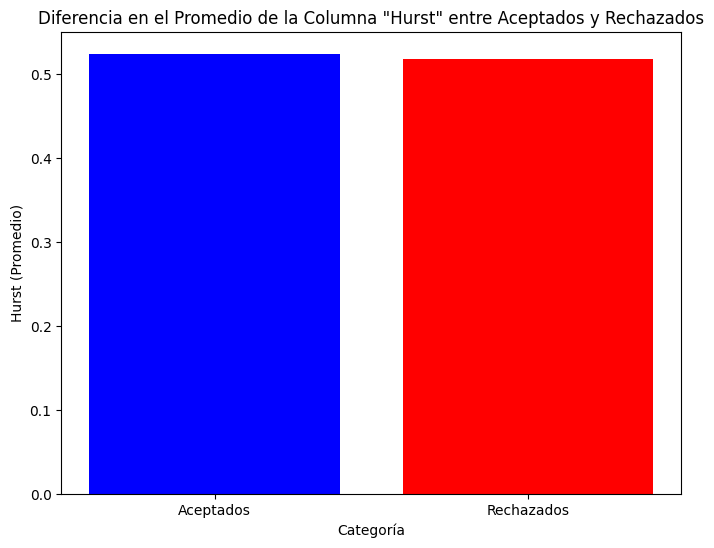

In [5]:
#MOSTRAR RESULTADOS
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ACL_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar barras para aceptados y rechazados
plt.bar(['Aceptados', 'Rechazados'], [df_aceptados['Hurst'].mean(), df_rechazados['Hurst'].mean()], color=['blue', 'red'])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst (Promedio)')
plt.title('Diferencia en el Promedio de la Columna "Hurst" entre Aceptados y Rechazados')
plt.show()

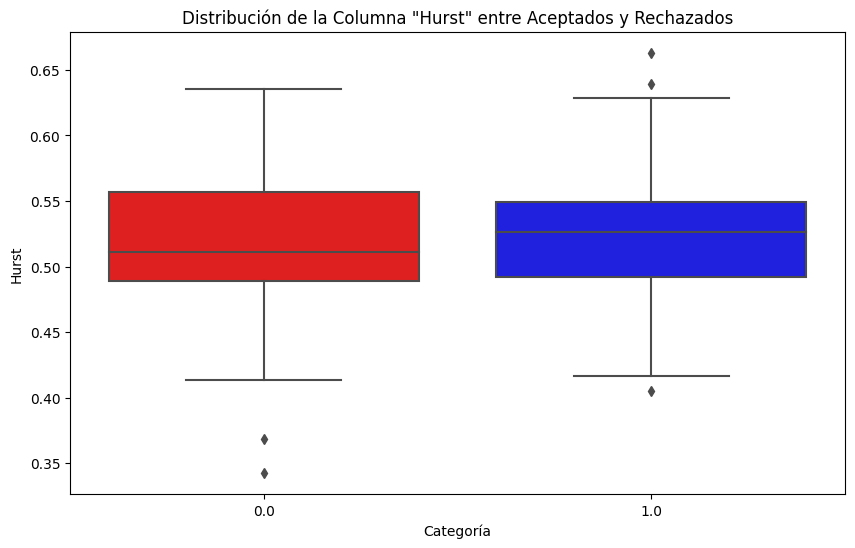

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ACL_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

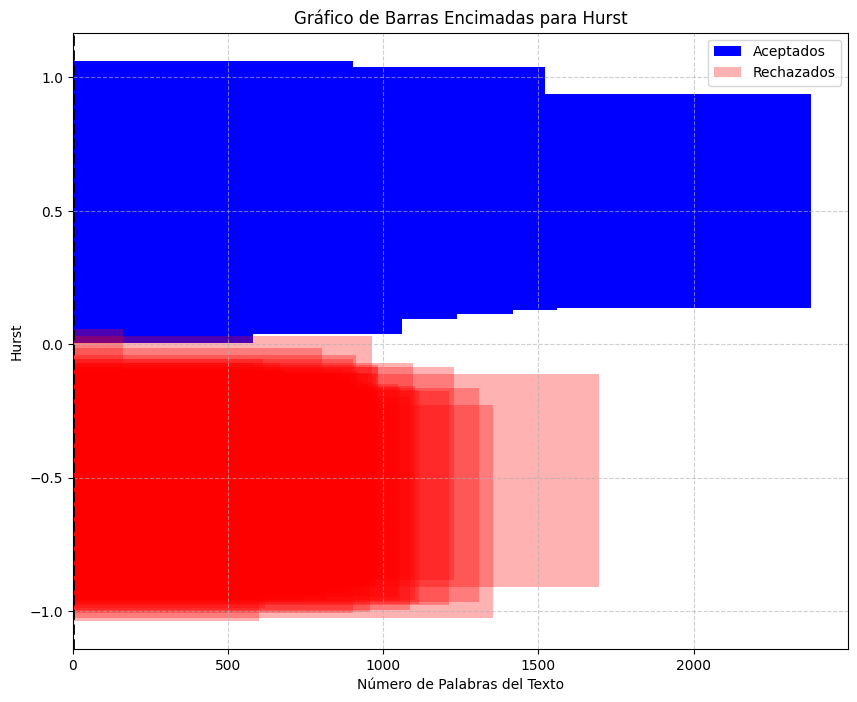

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ACL_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar barras encimadas para Hurst y número de palabras
plt.barh(df_aceptados['Hurst'], df_aceptados['Tamano_texto'], color='blue', label='Aceptados')
plt.barh(-df_rechazados['Hurst'], df_rechazados['Tamano_texto'], color='red', label='Rechazados', alpha=0.3)

# Configurar ejes y etiquetas
plt.xlabel('Número de Palabras del Texto')
plt.ylabel('Hurst')
plt.title('Gráfico de Barras Encimadas para Hurst')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Agregar marcas en el eje X y cambiar el color del eje X a negro
plt.axvline(0, color='black', linewidth=2, linestyle='--')

# Mostrar la gráfica
plt.show()


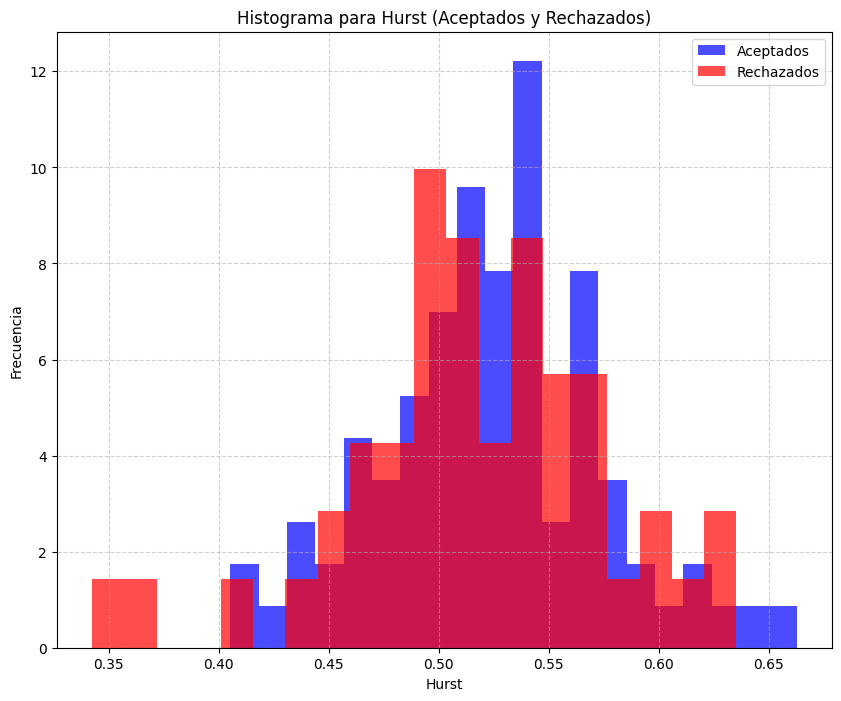

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ACL_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Hurst'], bins=20, color='blue', label='Aceptados', alpha=0.7, density = True)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Hurst'], bins=20, color='red', label='Rechazados', alpha=0.7, density = True)

# Configurar ejes y etiquetas
plt.xlabel('Hurst')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


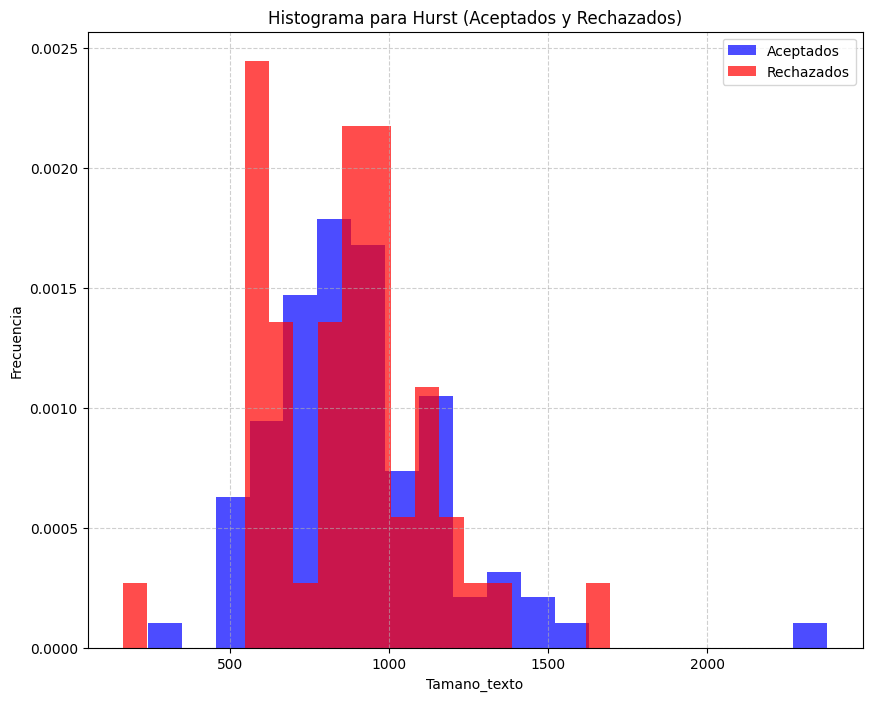

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ACL_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Tamano_texto'], bins=20, color='blue', label='Aceptados', alpha=0.7, density = True)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Tamano_texto'], bins=20, color='red', label='Rechazados', alpha=0.7, density = True)

# Configurar ejes y etiquetas
plt.xlabel('Tamano_texto')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


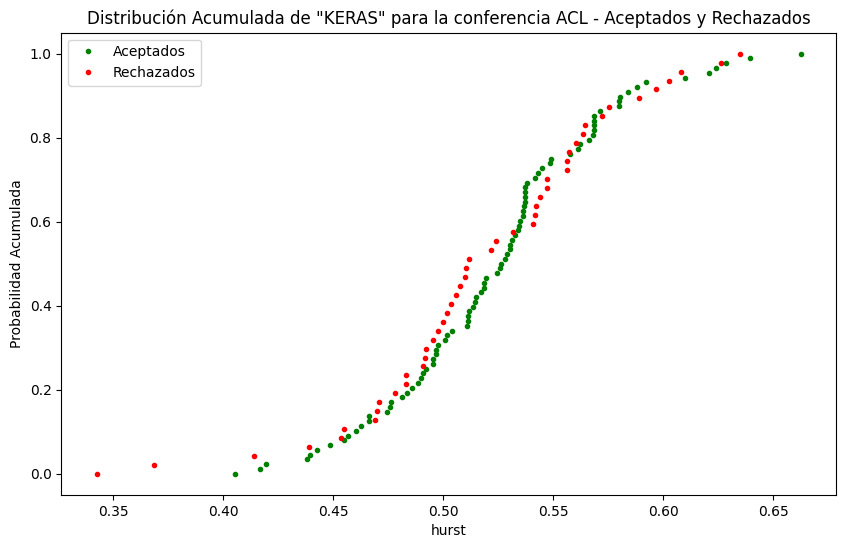

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ACL_HURST_KERAS.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "KERAS" para la conferencia ACL - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#HUSRT ACL COUNT VECTORIZER

In [16]:
#TOKENIZADOR COUNT VECTORIZER (FIT ON TEXT FUERA VOC COMPLETO)
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import warnings
import numpy as np
import warnings
import re
import pandas as pd
from google.colab import drive
import nolds

#funcion limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar números al final de las palabras
    texto = re.sub(r'\b\d+\b', '', texto)

    # Eliminar números al final de las líneas
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)

    # Eliminar números aislados
    texto = re.sub(r'\d+', '', texto)

    # Eliminar dobles espacios
    texto = re.sub(' +', ' ', texto)

    # Eliminar saltos de línea innecesarios
    texto = re.sub(r'\n\s*\n', '\n', texto)

    return texto.strip()


#ruta archivo y hacer el DF
csv_path = '/content/drive/MyDrive/acl_datos_completos.csv'
df = pd.read_csv(csv_path)

# Inicializar el tokenizer fuera del bucle
vectorizador = CountVectorizer()

# Lista para almacenar los resultados
resultados = []

# Lista para almacenar todos los textos concatenados
textos_completos = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Agregar el texto limpio a la lista de todos los textos
    textos_completos.append(texto_limpio)

# Ajustar el tokenizer a todos los textos concatenados
matriz_recuento = vectorizador.fit_transform(textos_completos)

# Recorrer textos
for index, row in df.iterrows():
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])
    texto_limpio = limpiar_texto(texto_concatenado)
    secuencia = vectorizador.transform([texto_limpio]).toarray()
    #print(secuencia[0])

    hurst = nolds.hurst_rs(secuencia[0])
    numpalabras = len(texto_limpio.split())


    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': numpalabras,
        'Hurst': hurst,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/ACL_HURST_COUNTVECTORIZER.csv', index=False)

print("Proceso completado. Archivo ACL_HURST_COUNTV.csv creado.")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


    Conferencia Particion  Archivo  \
0      acl_2017       dev  660.pdf   
1      acl_2017       dev  371.pdf   
2      acl_2017       dev  352.pdf   
3      acl_2017       dev  489.pdf   
4      acl_2017       dev   37.pdf   
..          ...       ...      ...   
132    acl_2017     train  419.pdf   
133    acl_2017     train  182.pdf   
134    acl_2017     train  699.pdf   
135    acl_2017     train  676.pdf   
136    acl_2017     train  691.pdf   

                                                 Texto  Tamano_texto  \
0    automatically generating rhythmic verse with n...           688   
1    phrasal recurrent neural network we propose a ...           862   
2    adversarial multi-task learning for text class...           612   
3    combining distributional and referential infor...           923   
4    sequential matching network: a new architectur...          1207   
..                                                 ...           ...   
132  one-shot neural cross-lingual tran

#Graficas ACL count vectorizer

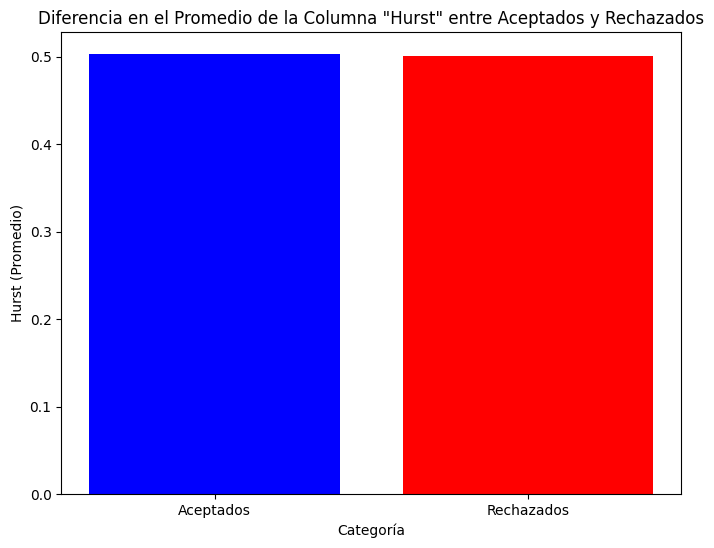

In [17]:
#MOSTRAR RESULTADOS
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ACL_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar barras para aceptados y rechazados
plt.bar(['Aceptados', 'Rechazados'], [df_aceptados['Hurst'].mean(), df_rechazados['Hurst'].mean()], color=['blue', 'red'])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst (Promedio)')
plt.title('Diferencia en el Promedio de la Columna "Hurst" entre Aceptados y Rechazados')
plt.show()

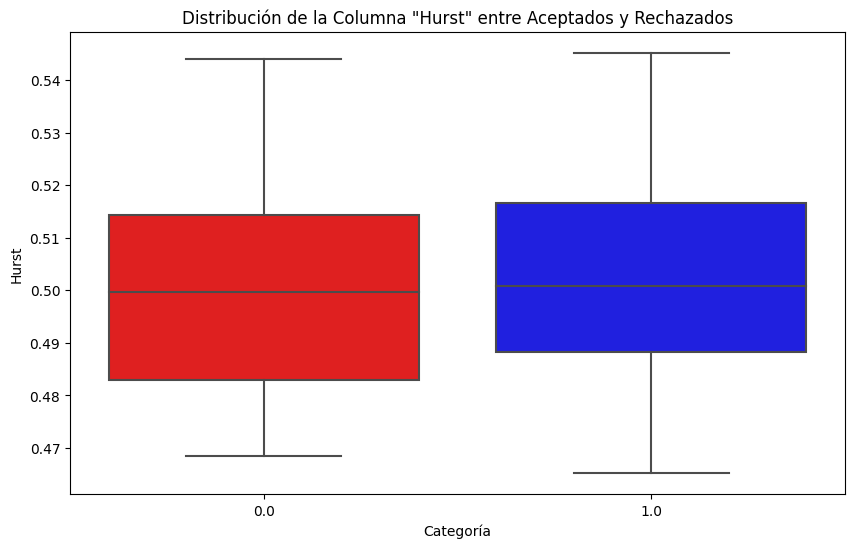

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ACL_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

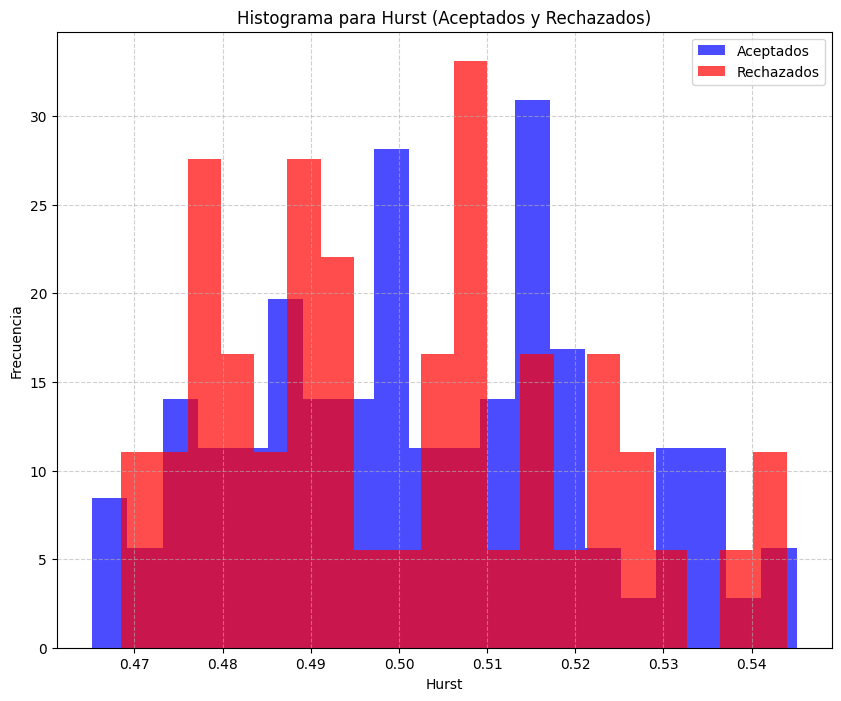

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ACL_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Hurst'], bins=20, color='blue', label='Aceptados', alpha=0.7, density = True)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Hurst'], bins=20, color='red', label='Rechazados', alpha=0.7, density = True)

# Configurar ejes y etiquetas
plt.xlabel('Hurst')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


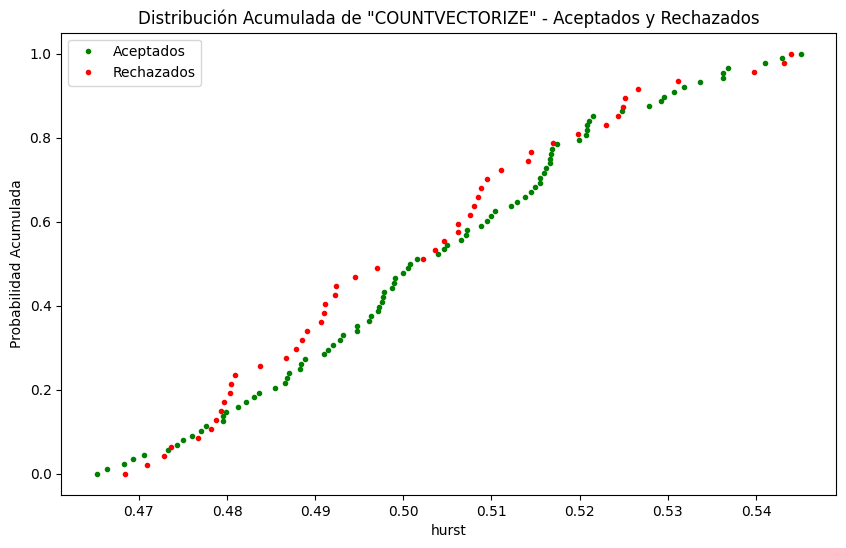

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ACL_HURST_COUNTVECTORIZER.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "COUNTVECTORIZE" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#HURST ICLR KERAS

In [21]:
#TOKENIZADOR KERAS (TOKENIZACION CON TODO EL VOCABULARIO)
import nltk
from keras.preprocessing.text import Tokenizer
import numpy as np
import warnings
import numpy as np
import warnings
import re
import pandas as pd
from google.colab import drive
import nolds

#funcion limpiar texto
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\b\d+\b', '', texto)
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)
    texto = re.sub(r'\d+', '', texto)
    texto = re.sub(' +', ' ', texto)
    texto = re.sub(r'\n\s*\n', '\n', texto)

    return texto.strip()

class CustomTokenizer(Tokenizer):
    def tokenize(self, inputs, *args, **kwargs):
        return super().texts_to_sequences([inputs])[0]

    def detokenize(self, inputs, *args, **kwargs):
        return " ".join([self.index_word[idx] for idx in inputs])

#ruta archivo y hacer el DF
csv_path = '/content/drive/MyDrive/iclr_datos_completos.csv'
df = pd.read_csv(csv_path)

# Inicializar el tokenizer fuera del bucle
tokenizer = CustomTokenizer()

# Lista para almacenar los resultados
resultados = []

# Lista para almacenar todos los textos concatenados
textos_completos = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Agregar el texto limpio a la lista de todos los textos
    textos_completos.append(texto_limpio)

# Ajustar el tokenizer a todos los textos concatenados
tokenizer.fit_on_texts(textos_completos)

#Recorrer textos
for index, row in df.iterrows():
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])
    texto_limpio = limpiar_texto(texto_concatenado)
    secuencia = tokenizer.tokenize(texto_limpio)
    #print(secuencia)

    hurst = nolds.hurst_rs(np.array(secuencia))

    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': len(secuencia),
        'Hurst': hurst,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/ICLR_HURST_KERAS.csv', index=False)

print("Proceso completado. Archivo ICLR_HURST_KERAS.csv creado.")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


    Conferencia Particion  Archivo  \
0     iclr_2017       dev  598.pdf   
1     iclr_2017       dev  328.pdf   
2     iclr_2017       dev  340.pdf   
3     iclr_2017       dev  325.pdf   
4     iclr_2017       dev  614.pdf   
..          ...       ...      ...   
422   iclr_2017     train  410.pdf   
423   iclr_2017     train  710.pdf   
424   iclr_2017     train  694.pdf   
425   iclr_2017     train  779.pdf   
426   iclr_2017     train  569.pdf   

                                                 Texto  Tamano_texto  \
0    speech recognition system this paper presents ...           690   
1    multilayer recurrent network models of pri- ma...           847   
2    nan we study the problem of transferring a sam...           604   
3    nan in this work, we investigate a novel train...          1142   
4    recurrent coevolutionary feature embedding pro...           958   
..                                                 ...           ...   
422  nan we consider the two related pr

#Graficas ICLR keras

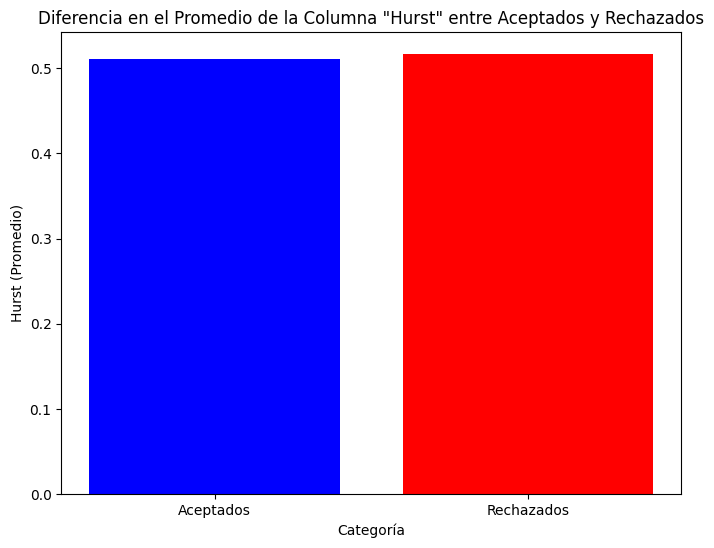

In [22]:
#MOSTRAR RESULTADOS
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ICLR_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar barras para aceptados y rechazados
plt.bar(['Aceptados', 'Rechazados'], [df_aceptados['Hurst'].mean(), df_rechazados['Hurst'].mean()], color=['blue', 'red'])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst (Promedio)')
plt.title('Diferencia en el Promedio de la Columna "Hurst" entre Aceptados y Rechazados')
plt.show()

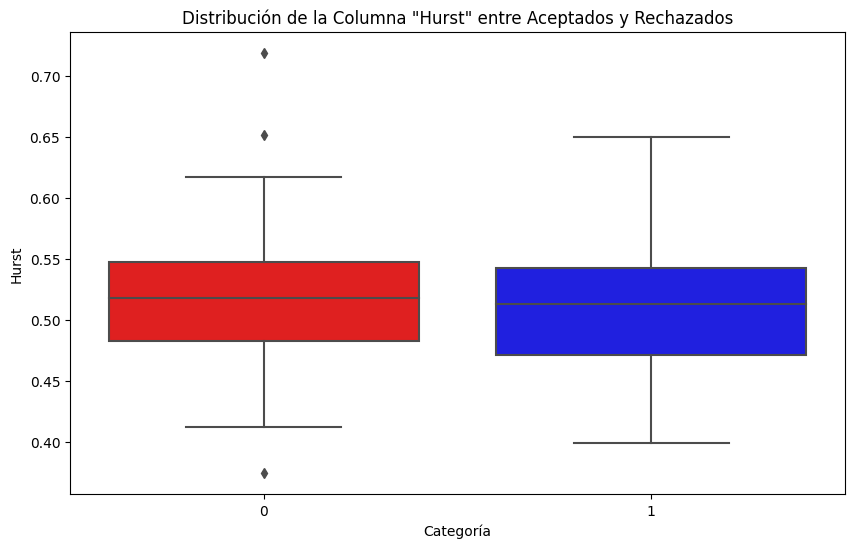

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ICLR_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

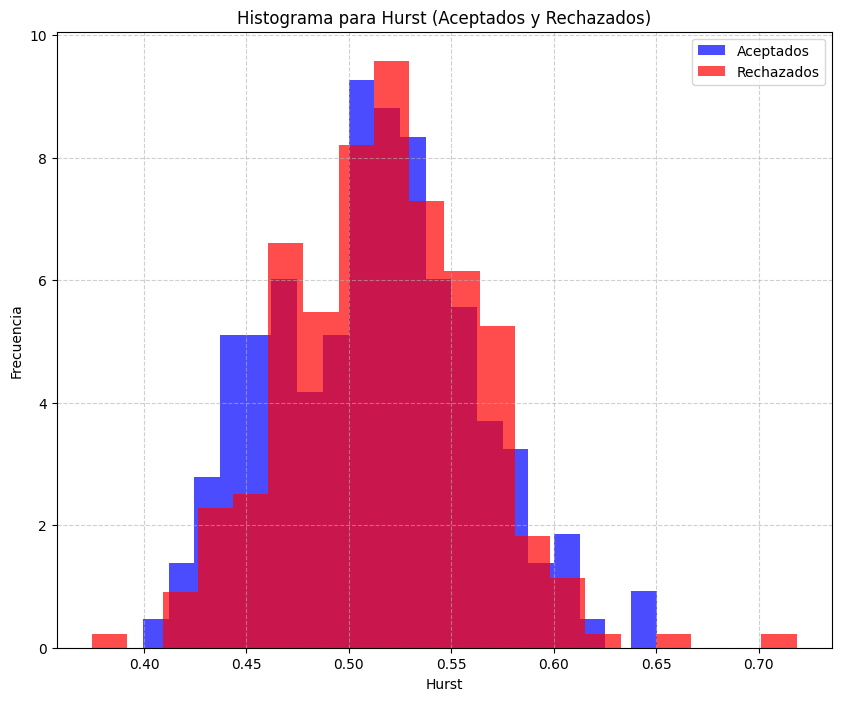

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ICLR_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Hurst'], bins=20, color='blue', label='Aceptados', alpha=0.7, density = True)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Hurst'], bins=20, color='red', label='Rechazados', alpha=0.7, density = True)

# Configurar ejes y etiquetas
plt.xlabel('Hurst')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


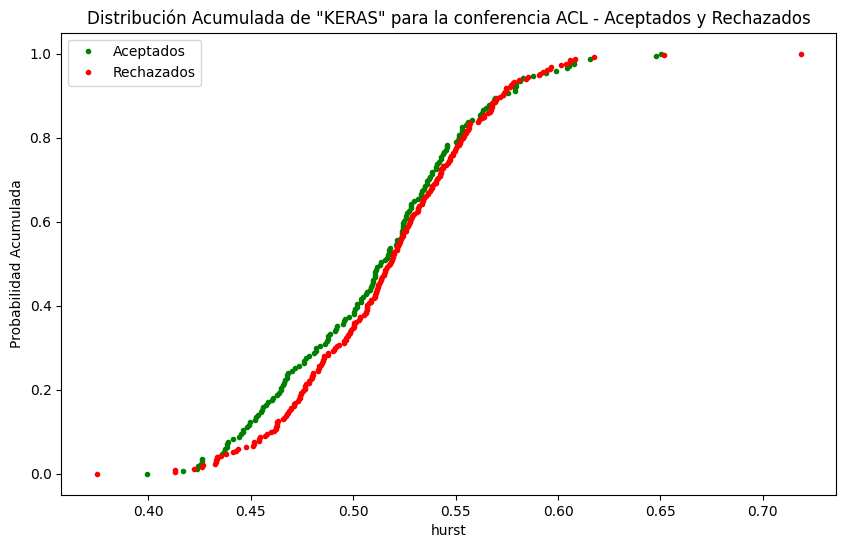

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ICLR_HURST_KERAS.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "KERAS" para la conferencia ACL - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#HURST ICLR COUNTVECTORIZER

In [27]:
#TOKENIZADOR COUNT VECTORIZER (FIT ON TEXT FUERA VOC COMPLETO)
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import warnings
import numpy as np
import warnings
import re
import pandas as pd
from google.colab import drive
import nolds

#funcion limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar números al final de las palabras
    texto = re.sub(r'\b\d+\b', '', texto)

    # Eliminar números al final de las líneas
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)

    # Eliminar números aislados
    texto = re.sub(r'\d+', '', texto)

    # Eliminar dobles espacios
    texto = re.sub(' +', ' ', texto)

    # Eliminar saltos de línea innecesarios
    texto = re.sub(r'\n\s*\n', '\n', texto)

    return texto.strip()


#ruta archivo y hacer el DF
csv_path = '/content/drive/MyDrive/iclr_datos_completos.csv'
df = pd.read_csv(csv_path)

# Inicializar el tokenizer fuera del bucle
vectorizador = CountVectorizer()

# Lista para almacenar los resultados
resultados = []

# Lista para almacenar todos los textos concatenados
textos_completos = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Agregar el texto limpio a la lista de todos los textos
    textos_completos.append(texto_limpio)

# Ajustar el tokenizer a todos los textos concatenados
matriz_recuento = vectorizador.fit_transform(textos_completos)

# Recorrer textos
for index, row in df.iterrows():
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])
    texto_limpio = limpiar_texto(texto_concatenado)
    secuencia = vectorizador.transform([texto_limpio]).toarray()
    #print(secuencia[0])
    hurst = nolds.hurst_rs(secuencia[0])
    numpalabras = len(texto_limpio.split())

    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': numpalabras,
        'Hurst': hurst,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/ICLR_HURST_COUNTVECTORIZER.csv', index=False)

print("Proceso completado. Archivo ICLR_HURST_COUNTV.csv creado.")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

    Conferencia Particion  Archivo  \
0     iclr_2017       dev  598.pdf   
1     iclr_2017       dev  328.pdf   
2     iclr_2017       dev  340.pdf   
3     iclr_2017       dev  325.pdf   
4     iclr_2017       dev  614.pdf   
..          ...       ...      ...   
422   iclr_2017     train  410.pdf   
423   iclr_2017     train  710.pdf   
424   iclr_2017     train  694.pdf   
425   iclr_2017     train  779.pdf   
426   iclr_2017     train  569.pdf   

                                                 Texto  Tamano_texto  \
0    speech recognition system this paper presents ...           700   
1    multilayer recurrent network models of pri- ma...           856   
2    nan we study the problem of transferring a sam...           602   
3    nan in this work, we investigate a novel train...          1134   
4    recurrent coevolutionary feature embedding pro...           934   
..                                                 ...           ...   
422  nan we consider the two related pr

#Graficas ICLR countvectorizer

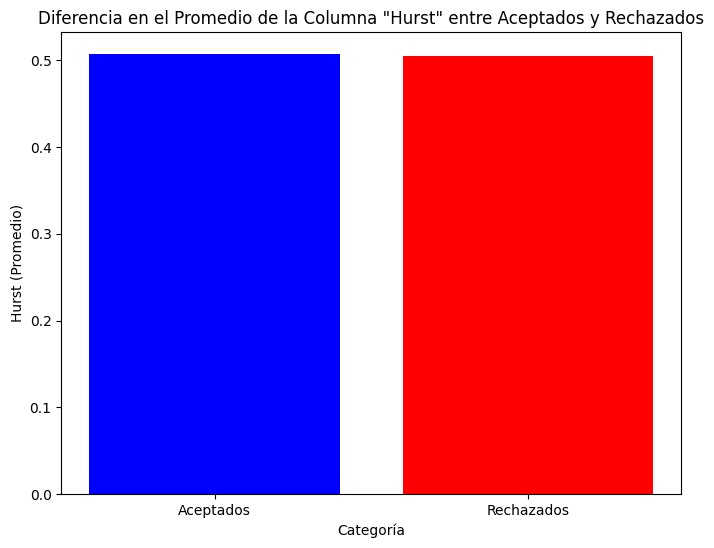

In [28]:
#MOSTRAR RESULTADOS
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ICLR_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar barras para aceptados y rechazados
plt.bar(['Aceptados', 'Rechazados'], [df_aceptados['Hurst'].mean(), df_rechazados['Hurst'].mean()], color=['blue', 'red'])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst (Promedio)')
plt.title('Diferencia en el Promedio de la Columna "Hurst" entre Aceptados y Rechazados')
plt.show()

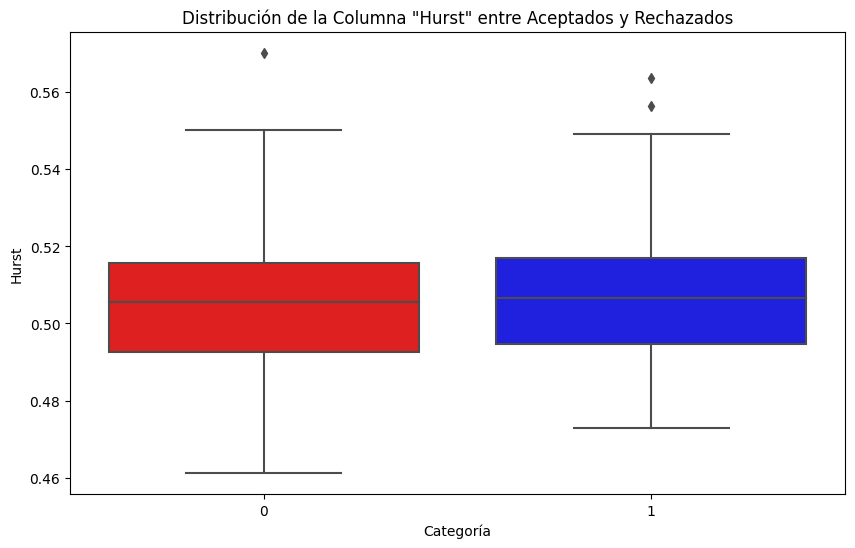

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ICLR_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

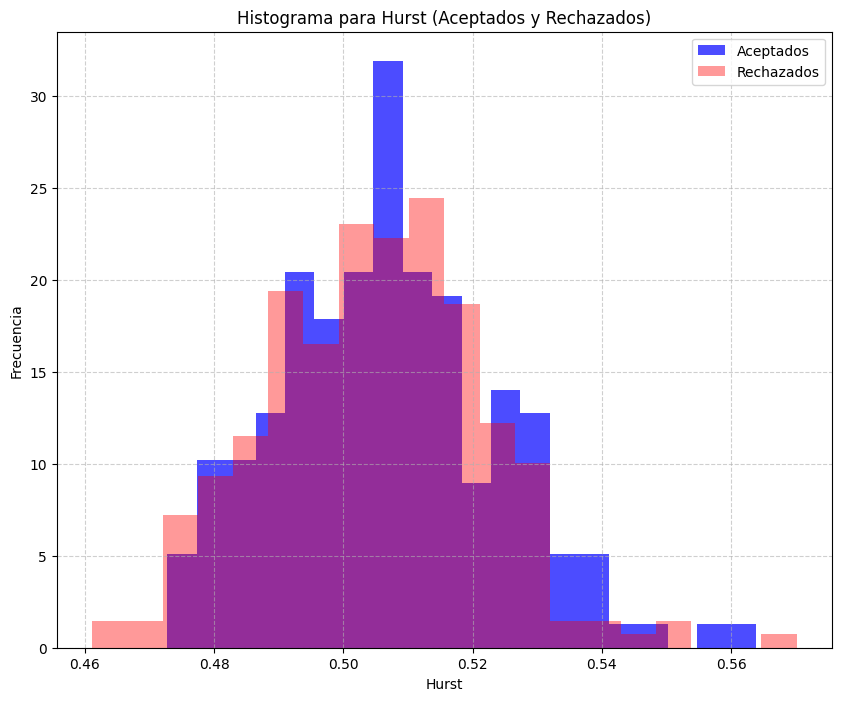

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ICLR_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Hurst'], bins=20, color='blue', label='Aceptados', alpha=0.7, density = True)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Hurst'], bins=20, color='red', label='Rechazados', alpha=0.4, density = True)

# Configurar ejes y etiquetas
plt.xlabel('Hurst')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


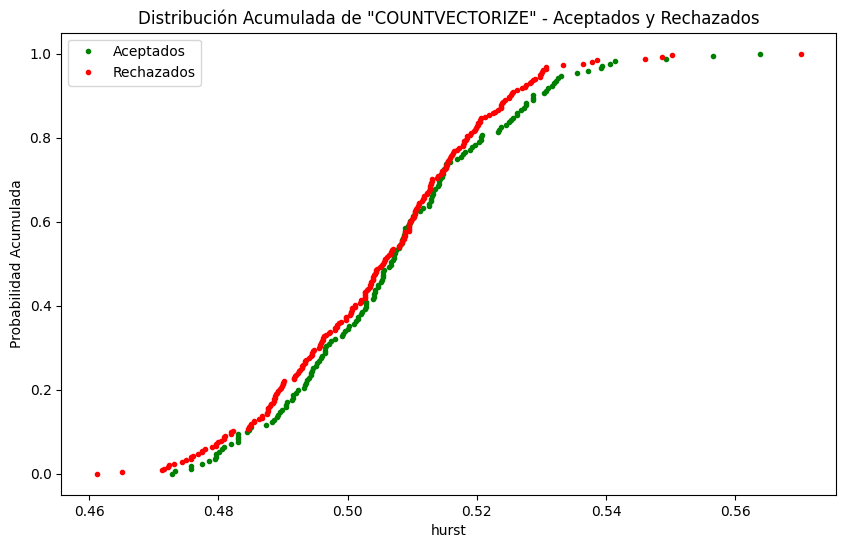

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ICLR_HURST_COUNTVECTORIZER.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "COUNTVECTORIZE" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#HURST ARXIV.AI KERAS

In [32]:
#TOKENIZADOR KERAS (TOKENIZACION CON TODO EL VOCABULARIO)
import nltk
from keras.preprocessing.text import Tokenizer
import numpy as np
import warnings
import numpy as np
import warnings
import re
import pandas as pd
from google.colab import drive
import nolds

#funcion limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar números al final de las palabras
    texto = re.sub(r'\b\d+\b', '', texto)

    # Eliminar números al final de las líneas
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)

    # Eliminar números aislados
    texto = re.sub(r'\d+', '', texto)

    # Eliminar dobles espacios
    texto = re.sub(' +', ' ', texto)

    # Eliminar saltos de línea innecesarios
    texto = re.sub(r'\n\s*\n', '\n', texto)

    return texto.strip()

class CustomTokenizer(Tokenizer):
    def tokenize(self, inputs, *args, **kwargs):
        return super().texts_to_sequences([inputs])[0]

    def detokenize(self, inputs, *args, **kwargs):
        return " ".join([self.index_word[idx] for idx in inputs])

#ruta archivo y hacer el DF
csv_path = '/content/drive/MyDrive/arxivAi_datos_completos.csv'
df = pd.read_csv(csv_path)

# Inicializar el tokenizer fuera del bucle
tokenizer = CustomTokenizer()

# Lista para almacenar los resultados
resultados = []

# Lista para almacenar todos los textos concatenados
textos_completos = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Agregar el texto limpio a la lista de todos los textos
    textos_completos.append(texto_limpio)

# Ajustar el tokenizer a todos los textos concatenados
tokenizer.fit_on_texts(textos_completos)

#Recorrer textos
for index, row in df.iterrows():
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])
    texto_limpio = limpiar_texto(texto_concatenado)
    secuencia = tokenizer.tokenize(texto_limpio)
    #print(secuencia)

    hurst = nolds.hurst_rs(np.array(secuencia))

    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': len(secuencia),
        'Hurst': hurst,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVai_HURST_KERAS.csv', index=False)

print("Proceso completado. Archivo ARXIVai_HURST_KERAS.csv creado.")


/usr/local/lib/python3.10/dist-packages/nolds/measures.py:45: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages

                Conferencia Particion         Archivo  \
0     arxiv.cs.ai_2007-2017       dev   1302.4942.pdf   
1     arxiv.cs.ai_2007-2017       dev  1703.04912.pdf   
2     arxiv.cs.ai_2007-2017       dev   1201.2430.pdf   
3     arxiv.cs.ai_2007-2017       dev   1305.3321.pdf   
4     arxiv.cs.ai_2007-2017       dev  1511.03532.pdf   
...                     ...       ...             ...   
4087  arxiv.cs.ai_2007-2017     train   1306.0386.pdf   
4088  arxiv.cs.ai_2007-2017     train  1605.04056.pdf   
4089  arxiv.cs.ai_2007-2017     train  1603.03518.pdf   
4090  arxiv.cs.ai_2007-2017     train   1406.3124.pdf   
4091  arxiv.cs.ai_2007-2017     train  1612.07837.pdf   

                                                  Texto  Tamano_texto  \
0     implementation of continuous bayesian networks...           124   
1     nan recent methods have adapted the well-estab...          2709   
2     a well-typed lightweight situation calculus∗ s...           818   
3     a mining-based co

#Graficas ARXIV_AI keras

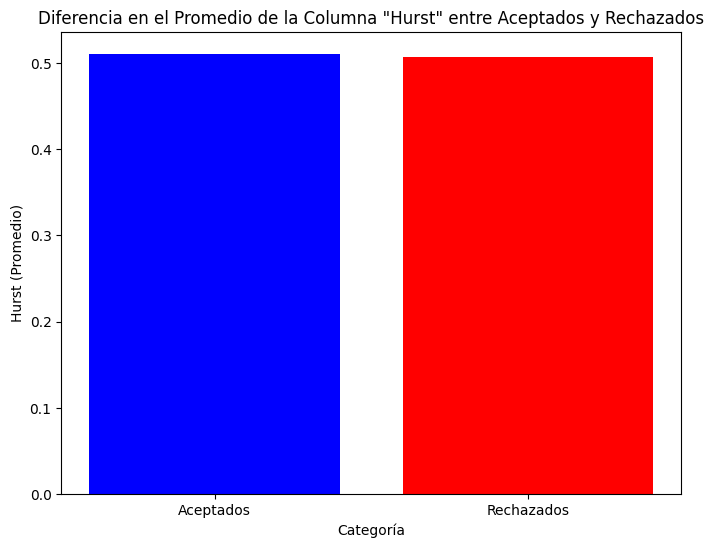

In [33]:
#MOSTRAR RESULTADOS
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVai_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar barras para aceptados y rechazados
plt.bar(['Aceptados', 'Rechazados'], [df_aceptados['Hurst'].mean(), df_rechazados['Hurst'].mean()], color=['blue', 'red'])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst (Promedio)')
plt.title('Diferencia en el Promedio de la Columna "Hurst" entre Aceptados y Rechazados')
plt.show()

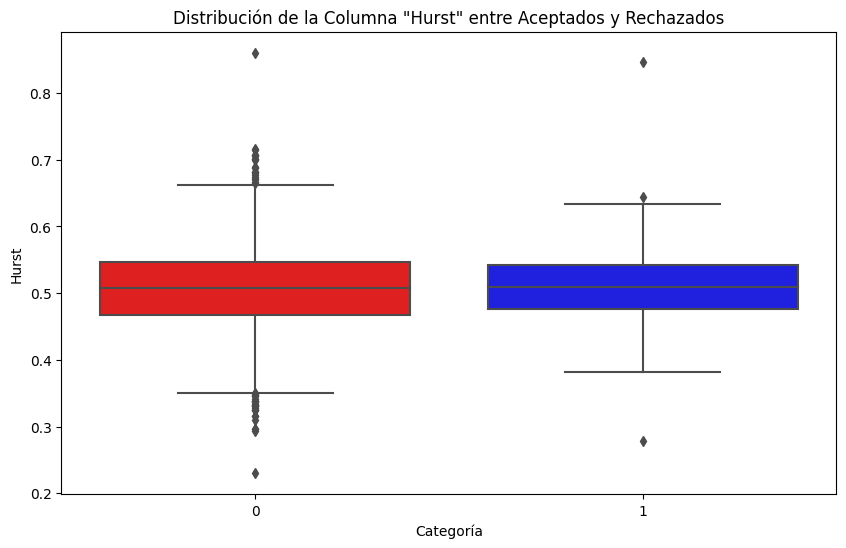

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVai_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

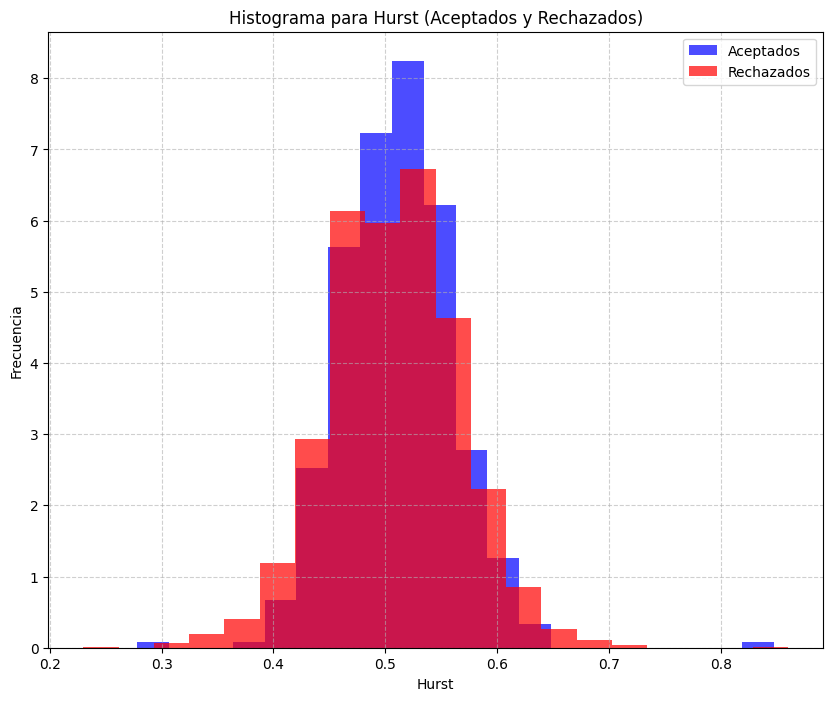

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVai_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Hurst'], bins=20, color='blue', label='Aceptados', alpha=0.7, density = True)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Hurst'], bins=20, color='red', label='Rechazados', alpha=0.7, density = True)

# Configurar ejes y etiquetas
plt.xlabel('Hurst')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


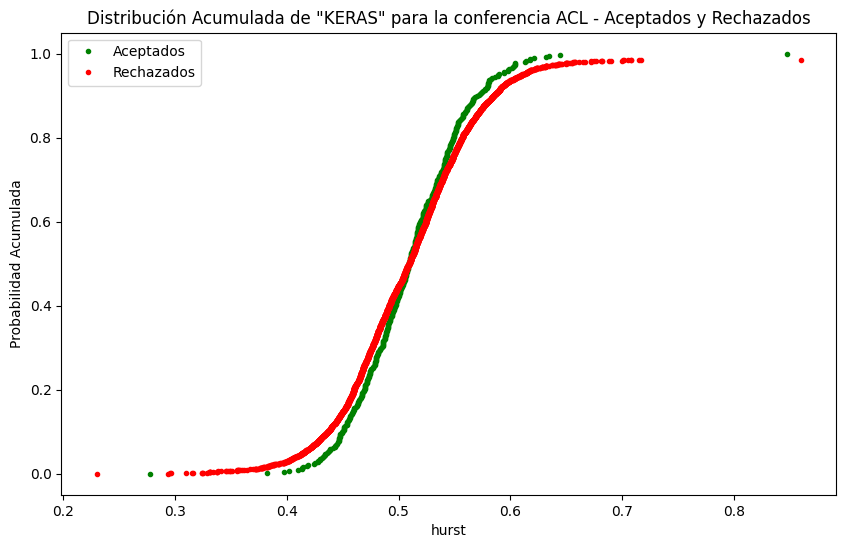

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVai_HURST_KERAS.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "KERAS" para la conferencia ACL - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#HURST ARXIVai COUNTVECTORIZER

In [37]:
#TOKENIZADOR COUNT VECTORIZER (FIT ON TEXT FUERA VOC COMPLETO)
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import warnings
import numpy as np
import warnings
import re
import pandas as pd
from google.colab import drive
import nolds

#funcion limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar números al final de las palabras
    texto = re.sub(r'\b\d+\b', '', texto)

    # Eliminar números al final de las líneas
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)

    # Eliminar números aislados
    texto = re.sub(r'\d+', '', texto)

    # Eliminar dobles espacios
    texto = re.sub(' +', ' ', texto)

    # Eliminar saltos de línea innecesarios
    texto = re.sub(r'\n\s*\n', '\n', texto)

    return texto.strip()


#ruta archivo y hacer el DF
csv_path = '/content/drive/MyDrive/arxivAi_datos_completos.csv'
df = pd.read_csv(csv_path)

# Inicializar el tokenizer fuera del bucle
vectorizador = CountVectorizer()

# Lista para almacenar los resultados
resultados = []

# Lista para almacenar todos los textos concatenados
textos_completos = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Agregar el texto limpio a la lista de todos los textos
    textos_completos.append(texto_limpio)

# Ajustar el tokenizer a todos los textos concatenados
matriz_recuento = vectorizador.fit_transform(textos_completos)

# Recorrer textos
for index, row in df.iterrows():
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])
    texto_limpio = limpiar_texto(texto_concatenado)
    secuencia = vectorizador.transform([texto_limpio]).toarray()
    #print(secuencia[0])
    hurst = nolds.hurst_rs(secuencia[0])
    numpalabras = len(texto_limpio.split())

    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': numpalabras,
        'Hurst': hurst,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVai_HURST_COUNTVECTORIZER.csv', index=False)

print("Proceso completado. Archivo ARXIVai_HURST_COUNTV.csv creado.")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

                Conferencia Particion         Archivo  \
0     arxiv.cs.ai_2007-2017       dev   1302.4942.pdf   
1     arxiv.cs.ai_2007-2017       dev  1703.04912.pdf   
2     arxiv.cs.ai_2007-2017       dev   1201.2430.pdf   
3     arxiv.cs.ai_2007-2017       dev   1305.3321.pdf   
4     arxiv.cs.ai_2007-2017       dev  1511.03532.pdf   
...                     ...       ...             ...   
4087  arxiv.cs.ai_2007-2017     train   1306.0386.pdf   
4088  arxiv.cs.ai_2007-2017     train  1605.04056.pdf   
4089  arxiv.cs.ai_2007-2017     train  1603.03518.pdf   
4090  arxiv.cs.ai_2007-2017     train   1406.3124.pdf   
4091  arxiv.cs.ai_2007-2017     train  1612.07837.pdf   

                                                  Texto  Tamano_texto  \
0     implementation of continuous bayesian networks...           124   
1     nan recent methods have adapted the well-estab...          2725   
2     a well-typed lightweight situation calculus∗ s...           813   
3     a mining-based co

#Graficas ARXVIai countvectorizer

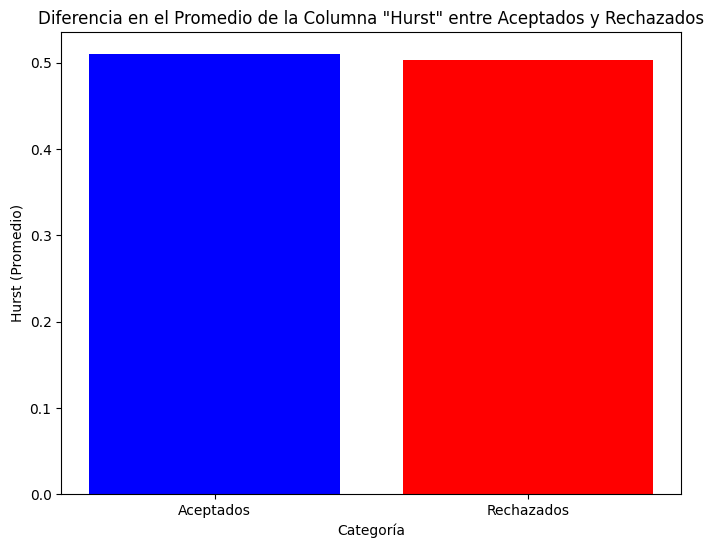

In [38]:
#MOSTRAR RESULTADOS
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVai_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar barras para aceptados y rechazados
plt.bar(['Aceptados', 'Rechazados'], [df_aceptados['Hurst'].mean(), df_rechazados['Hurst'].mean()], color=['blue', 'red'])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst (Promedio)')
plt.title('Diferencia en el Promedio de la Columna "Hurst" entre Aceptados y Rechazados')
plt.show()

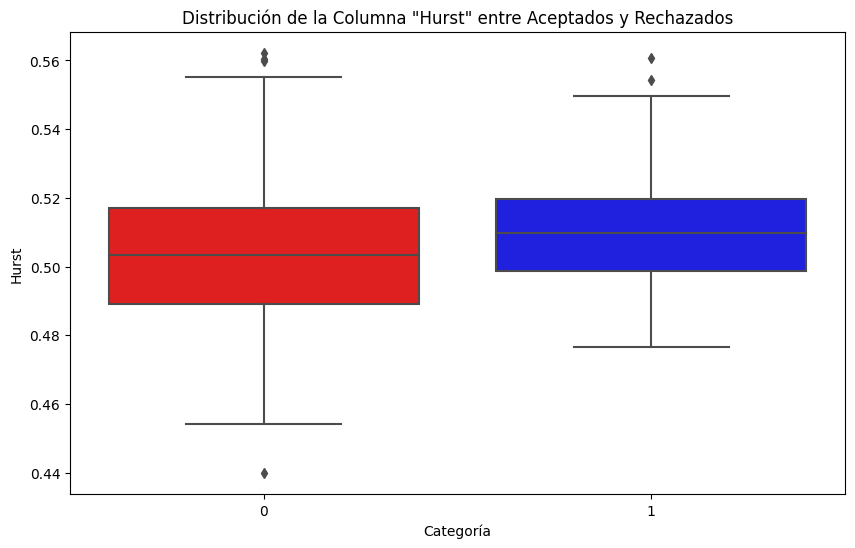

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVai_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

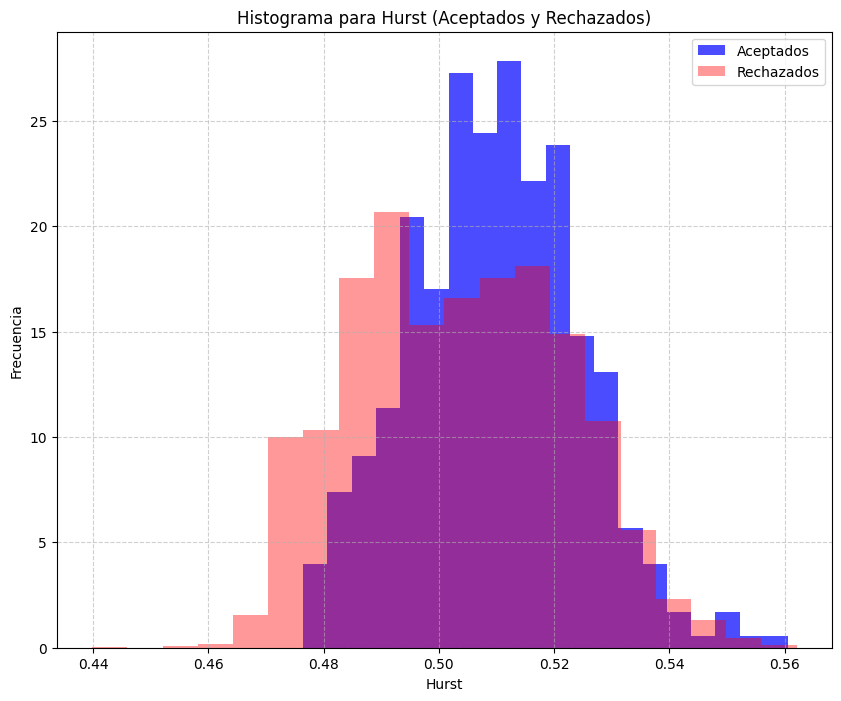

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVai_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Hurst'], bins=20, color='blue', label='Aceptados', alpha=0.7, density = True)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Hurst'], bins=20, color='red', label='Rechazados', alpha=0.4, density = True)

# Configurar ejes y etiquetas
plt.xlabel('Hurst')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


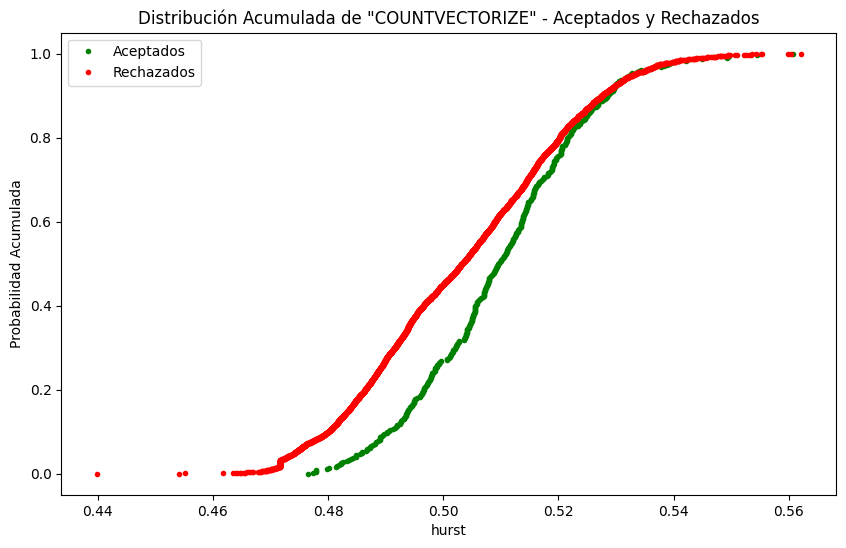

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVai_HURST_COUNTVECTORIZER.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "COUNTVECTORIZE" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#HURST ARXIVcl KERAS

In [42]:
#TOKENIZADOR KERAS (TOKENIZACION CON TODO EL VOCABULARIO)
import nltk
from keras.preprocessing.text import Tokenizer
import numpy as np
import warnings
import numpy as np
import warnings
import re
import pandas as pd
from google.colab import drive
import nolds

#funcion limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar números al final de las palabras
    texto = re.sub(r'\b\d+\b', '', texto)

    # Eliminar números al final de las líneas
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)

    # Eliminar números aislados
    texto = re.sub(r'\d+', '', texto)

    # Eliminar dobles espacios
    texto = re.sub(' +', ' ', texto)

    # Eliminar saltos de línea innecesarios
    texto = re.sub(r'\n\s*\n', '\n', texto)

    return texto.strip()

class CustomTokenizer(Tokenizer):
    def tokenize(self, inputs, *args, **kwargs):
        return super().texts_to_sequences([inputs])[0]

    def detokenize(self, inputs, *args, **kwargs):
        return " ".join([self.index_word[idx] for idx in inputs])

#ruta archivo y hacer el DF
csv_path = '/content/drive/MyDrive/arxivCl_datos_completos.csv'
df = pd.read_csv(csv_path)

# Inicializar el tokenizer fuera del bucle
tokenizer = CustomTokenizer()

# Lista para almacenar los resultados
resultados = []

# Lista para almacenar todos los textos concatenados
textos_completos = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Agregar el texto limpio a la lista de todos los textos
    textos_completos.append(texto_limpio)

# Ajustar el tokenizer a todos los textos concatenados
tokenizer.fit_on_texts(textos_completos)

#Recorrer textos
for index, row in df.iterrows():
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])
    texto_limpio = limpiar_texto(texto_concatenado)
    secuencia = tokenizer.tokenize(texto_limpio)
    #print(secuencia)
    hurst = nolds.hurst_rs(np.array(secuencia))

    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': len(secuencia),
        'Hurst': hurst,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVcl_HURST_KERAS.csv', index=False)

print("Proceso completado. Archivo ARXIVcl_HURST_KERAS.csv creado.")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

                Conferencia Particion         Archivo  \
0     arxiv.cs.cl_2007-2017       dev  1610.06602.pdf   
1     arxiv.cs.cl_2007-2017       dev  1505.07599.pdf   
2     arxiv.cs.cl_2007-2017       dev  1709.06033.pdf   
3     arxiv.cs.cl_2007-2017       dev  1510.07482.pdf   
4     arxiv.cs.cl_2007-2017       dev  1701.03947.pdf   
...                     ...       ...             ...   
2635  arxiv.cs.cl_2007-2017     train  1704.06879.pdf   
2636  arxiv.cs.cl_2007-2017     train   1412.6575.pdf   
2637  arxiv.cs.cl_2007-2017     train  1704.05162.pdf   
2638  arxiv.cs.cl_2007-2017     train  1603.06485.pdf   
2639  arxiv.cs.cl_2007-2017     train  1702.07092.pdf   

                                                  Texto  Tamano_texto  \
0     iterative refinement for machine translation e...           768   
1     overview of the nlpcc shared task: chinese wor...           448   
2     sequence to sequence learning for event predic...           756   
3     edge-linear first

#Graficas ARXIVcl keras

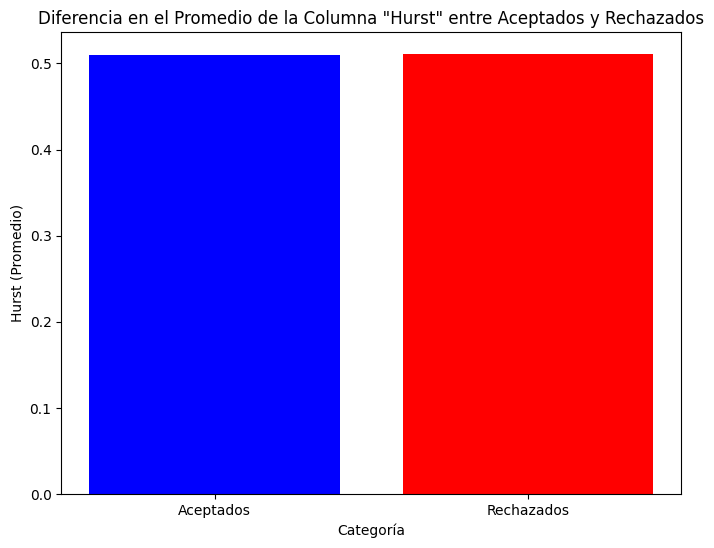

In [43]:
#MOSTRAR RESULTADOS
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVcl_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar barras para aceptados y rechazados
plt.bar(['Aceptados', 'Rechazados'], [df_aceptados['Hurst'].mean(), df_rechazados['Hurst'].mean()], color=['blue', 'red'])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst (Promedio)')
plt.title('Diferencia en el Promedio de la Columna "Hurst" entre Aceptados y Rechazados')
plt.show()

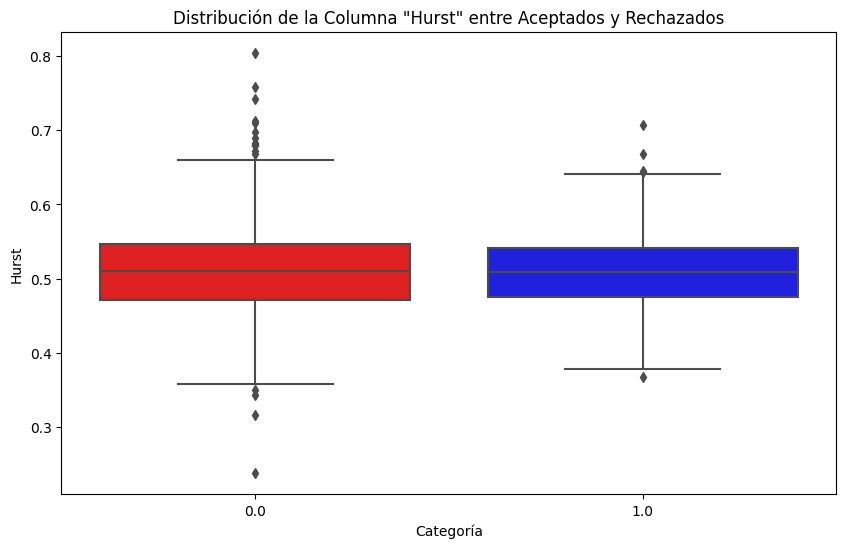

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVcl_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

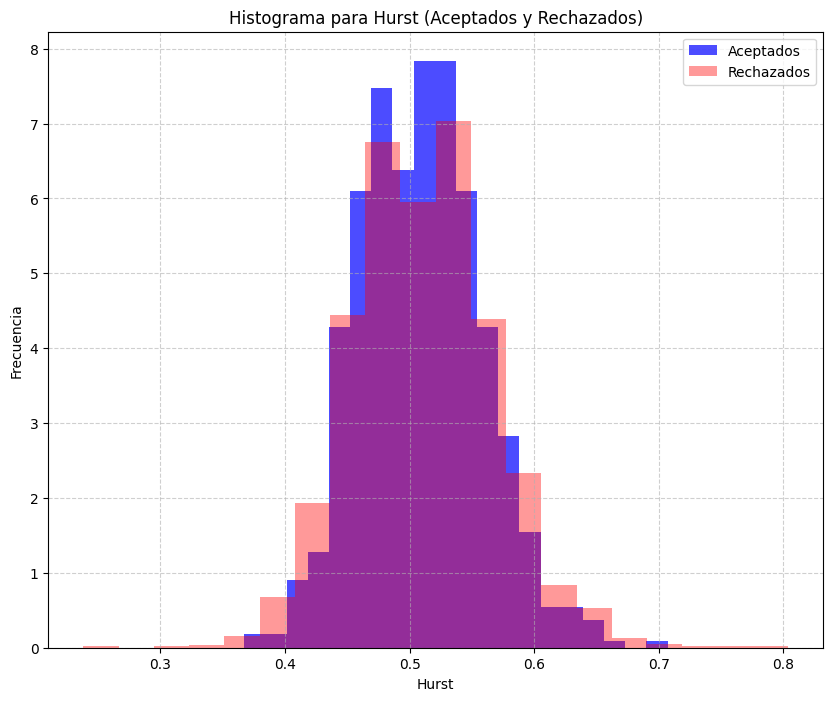

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVcl_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Hurst'], bins=20, color='blue', label='Aceptados', alpha=0.7, density = True)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Hurst'], bins=20, color='red', label='Rechazados', alpha=0.4, density = True)

# Configurar ejes y etiquetas
plt.xlabel('Hurst')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


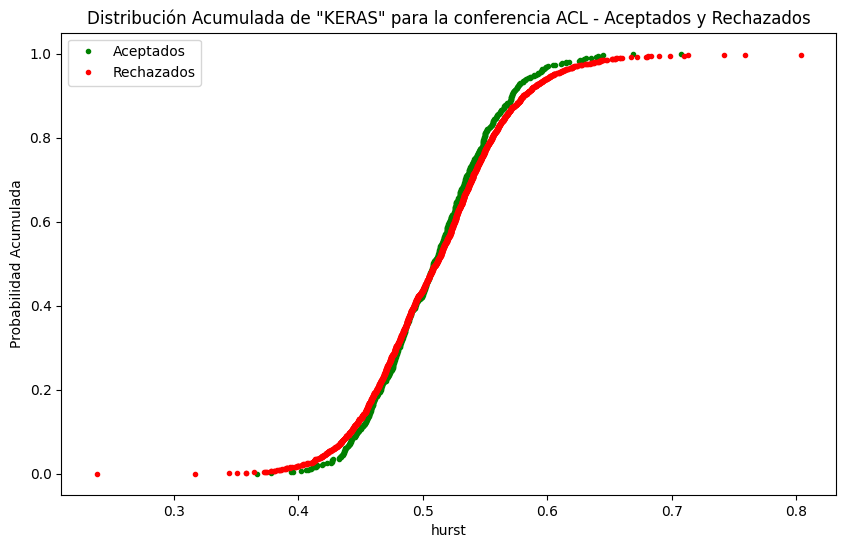

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVcl_HURST_KERAS.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "KERAS" para la conferencia ACL - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#HURST ARXIVcl COUNTVECTORIZER

In [47]:
#TOKENIZADOR COUNT VECTORIZER (FIT ON TEXT FUERA VOC COMPLETO)
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import warnings
import numpy as np
import warnings
import re
import pandas as pd
from google.colab import drive
import nolds

#funcion limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar números al final de las palabras
    texto = re.sub(r'\b\d+\b', '', texto)

    # Eliminar números al final de las líneas
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)

    # Eliminar números aislados
    texto = re.sub(r'\d+', '', texto)

    # Eliminar dobles espacios
    texto = re.sub(' +', ' ', texto)

    # Eliminar saltos de línea innecesarios
    texto = re.sub(r'\n\s*\n', '\n', texto)

    return texto.strip()


#ruta archivo y hacer el DF
csv_path = '/content/drive/MyDrive/arxivCl_datos_completos.csv'
df = pd.read_csv(csv_path)

# Inicializar el tokenizer fuera del bucle
vectorizador = CountVectorizer()

# Lista para almacenar los resultados
resultados = []

# Lista para almacenar todos los textos concatenados
textos_completos = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Agregar el texto limpio a la lista de todos los textos
    textos_completos.append(texto_limpio)

# Ajustar el tokenizer a todos los textos concatenados
matriz_recuento = vectorizador.fit_transform(textos_completos)

# Recorrer textos
for index, row in df.iterrows():
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])
    texto_limpio = limpiar_texto(texto_concatenado)
    secuencia = vectorizador.transform([texto_limpio]).toarray()
    #print(secuencia[0])
    hurst = nolds.hurst_rs(secuencia[0])
    numpalabras = len(texto_limpio.split())

    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': numpalabras,
        'Hurst': hurst,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVcl_HURST_COUNTVECTORIZER.csv', index=False)

print("Proceso completado. Archivo ARXIVai_HURST_COUNTV.csv creado.")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

                Conferencia Particion         Archivo  \
0     arxiv.cs.cl_2007-2017       dev  1610.06602.pdf   
1     arxiv.cs.cl_2007-2017       dev  1505.07599.pdf   
2     arxiv.cs.cl_2007-2017       dev  1709.06033.pdf   
3     arxiv.cs.cl_2007-2017       dev  1510.07482.pdf   
4     arxiv.cs.cl_2007-2017       dev  1701.03947.pdf   
...                     ...       ...             ...   
2635  arxiv.cs.cl_2007-2017     train  1704.06879.pdf   
2636  arxiv.cs.cl_2007-2017     train   1412.6575.pdf   
2637  arxiv.cs.cl_2007-2017     train  1704.05162.pdf   
2638  arxiv.cs.cl_2007-2017     train  1603.06485.pdf   
2639  arxiv.cs.cl_2007-2017     train  1702.07092.pdf   

                                                  Texto  Tamano_texto  \
0     iterative refinement for machine translation e...           773   
1     overview of the nlpcc shared task: chinese wor...           430   
2     sequence to sequence learning for event predic...           753   
3     edge-linear first

#Graficas ARXIVcl countvectorizer

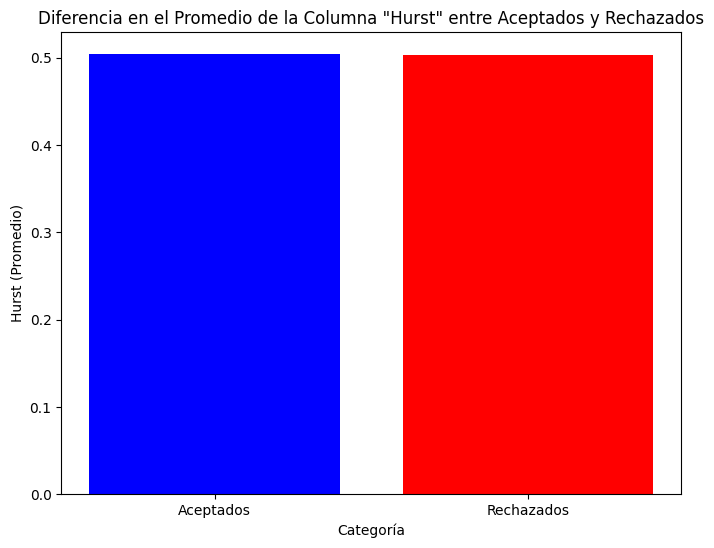

In [48]:
#MOSTRAR RESULTADOS
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVcl_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar barras para aceptados y rechazados
plt.bar(['Aceptados', 'Rechazados'], [df_aceptados['Hurst'].mean(), df_rechazados['Hurst'].mean()], color=['blue', 'red'])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst (Promedio)')
plt.title('Diferencia en el Promedio de la Columna "Hurst" entre Aceptados y Rechazados')
plt.show()

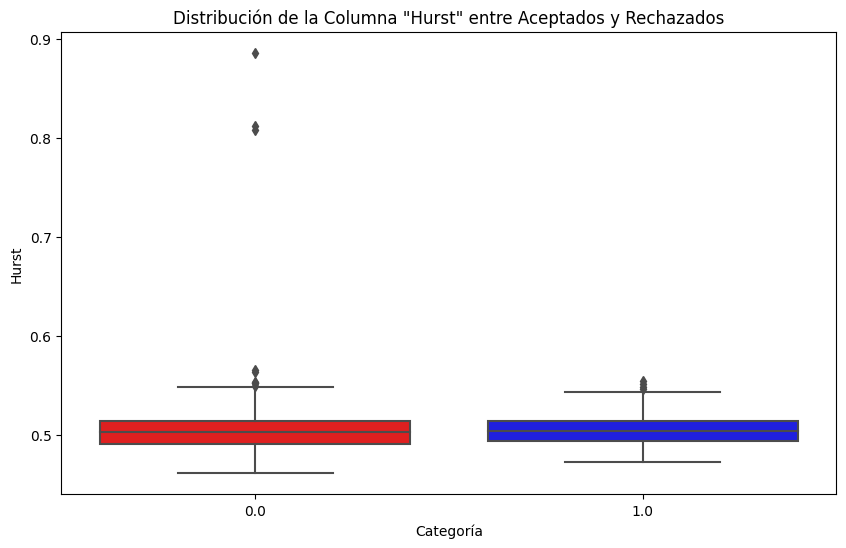

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVcl_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

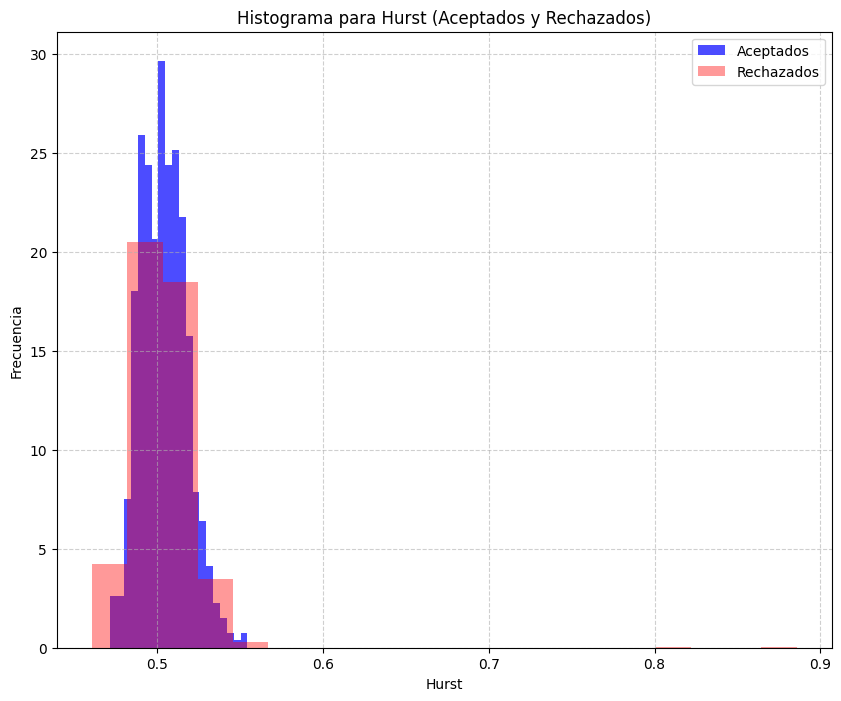

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVcl_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Hurst'], bins=20, color='blue', label='Aceptados', alpha=0.7, density=True)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Hurst'], bins=20, color='red', label='Rechazados', alpha=0.4, density=True)

# Configurar ejes y etiquetas
plt.xlabel('Hurst')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


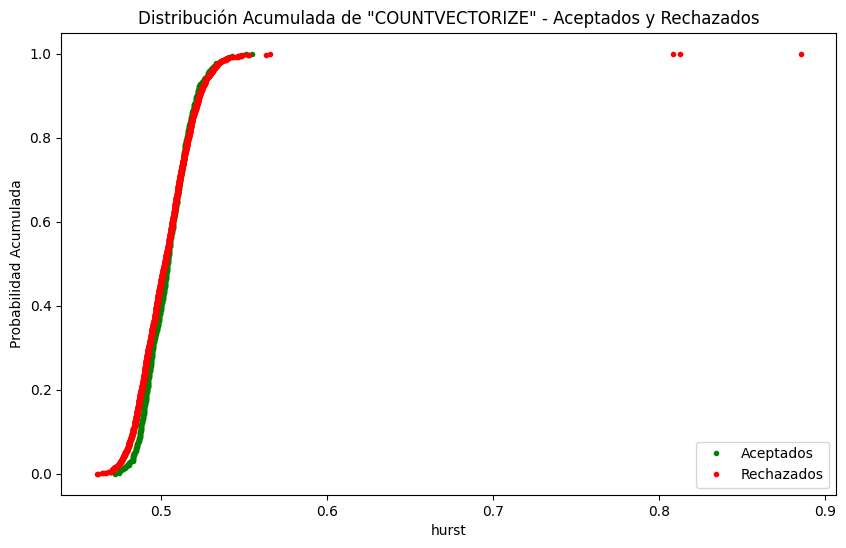

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVcl_HURST_COUNTVECTORIZER.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "COUNTVECTORIZE" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#HURST ARXIVlg KERAS

In [54]:
#TOKENIZADOR KERAS (TOKENIZACION CON TODO EL VOCABULARIO)
import nltk
from keras.preprocessing.text import Tokenizer
import numpy as np
import warnings
import numpy as np
import warnings
import re
import pandas as pd
from google.colab import drive
import nolds

#funcion limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar números al final de las palabras
    texto = re.sub(r'\b\d+\b', '', texto)

    # Eliminar números al final de las líneas
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)

    # Eliminar números aislados
    texto = re.sub(r'\d+', '', texto)

    # Eliminar dobles espacios
    texto = re.sub(' +', ' ', texto)

    # Eliminar saltos de línea innecesarios
    texto = re.sub(r'\n\s*\n', '\n', texto)

    return texto.strip()

class CustomTokenizer(Tokenizer):
    def tokenize(self, inputs, *args, **kwargs):
        return super().texts_to_sequences([inputs])[0]

    def detokenize(self, inputs, *args, **kwargs):
        return " ".join([self.index_word[idx] for idx in inputs])

#ruta archivo y hacer el DF
csv_path = '/content/drive/MyDrive/arxivLg_datos_completos.csv'
df = pd.read_csv(csv_path)

# Inicializar el tokenizer fuera del bucle
tokenizer = CustomTokenizer()

# Lista para almacenar los resultados
resultados = []

# Lista para almacenar todos los textos concatenados
textos_completos = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Agregar el texto limpio a la lista de todos los textos
    textos_completos.append(texto_limpio)

# Ajustar el tokenizer a todos los textos concatenados
tokenizer.fit_on_texts(textos_completos)

#Recorrer textos
for index, row in df.iterrows():
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])
    texto_limpio = limpiar_texto(texto_concatenado)
    secuencia = tokenizer.tokenize(texto_limpio)
    #print(secuencia)
    hurst = nolds.hurst_rs(np.array(secuencia))

    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': len(secuencia),
        'Hurst': hurst,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVlg_HURST_KERAS.csv', index=False)

print("Proceso completado. Archivo ARXIVlg_HURST_KERAS.csv creado.")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

                Conferencia Particion         Archivo  \
0     arxiv.cs.lg_2007-2017       dev  1604.04428.pdf   
1     arxiv.cs.lg_2007-2017       dev  1603.04283.pdf   
2     arxiv.cs.lg_2007-2017       dev  1610.08120.pdf   
3     arxiv.cs.lg_2007-2017       dev  1703.02721.pdf   
4     arxiv.cs.lg_2007-2017       dev   1306.4650.pdf   
...                     ...       ...             ...   
5043  arxiv.cs.lg_2007-2017     train  1606.01166.pdf   
5044  arxiv.cs.lg_2007-2017     train   1201.6626.pdf   
5045  arxiv.cs.lg_2007-2017     train   1401.0159.pdf   
5046  arxiv.cs.lg_2007-2017     train  1512.02693.pdf   
5047  arxiv.cs.lg_2007-2017     train  1611.01449.pdf   

                                                  Texto  Tamano_texto  \
0     resisting adversarials for convolutional neura...           562   
1     nan we construct a universal prediction system...           466   
2     image segmentation for fruit detection and yie...          1704   
3     on approximation 

#Graficas ARXIVlg keras

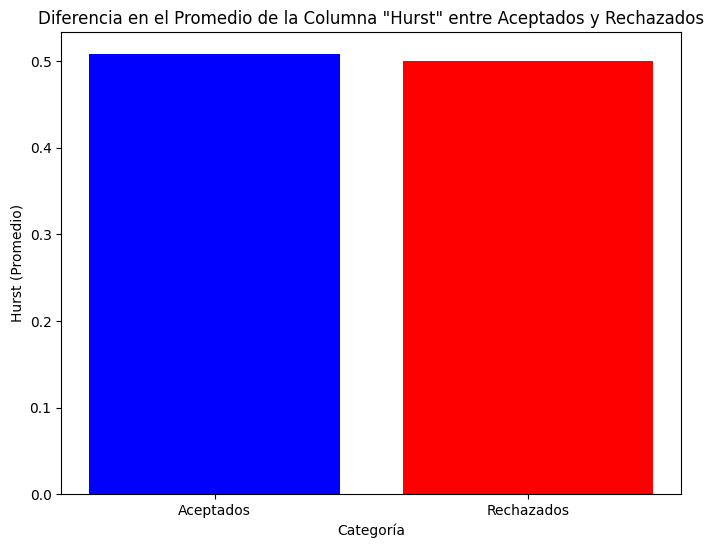

In [55]:
#MOSTRAR RESULTADOS
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVlg_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar barras para aceptados y rechazados
plt.bar(['Aceptados', 'Rechazados'], [df_aceptados['Hurst'].mean(), df_rechazados['Hurst'].mean()], color=['blue', 'red'])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst (Promedio)')
plt.title('Diferencia en el Promedio de la Columna "Hurst" entre Aceptados y Rechazados')
plt.show()

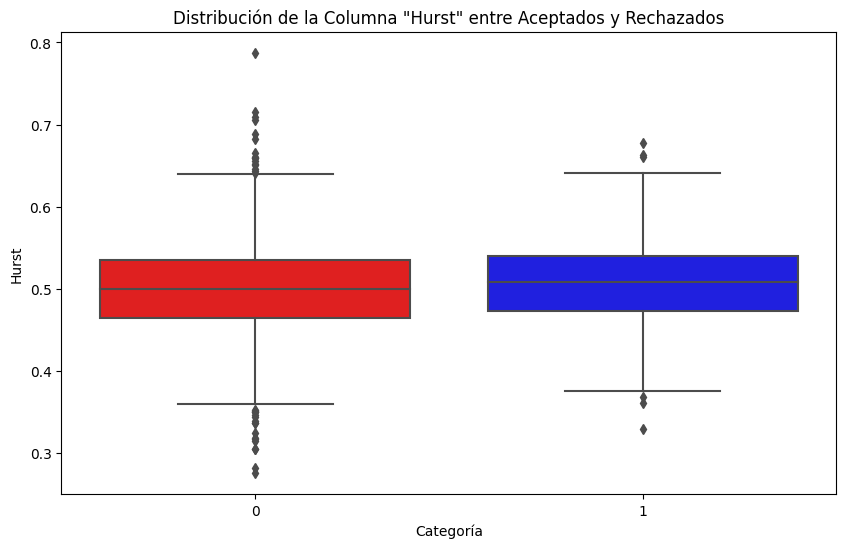

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVlg_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

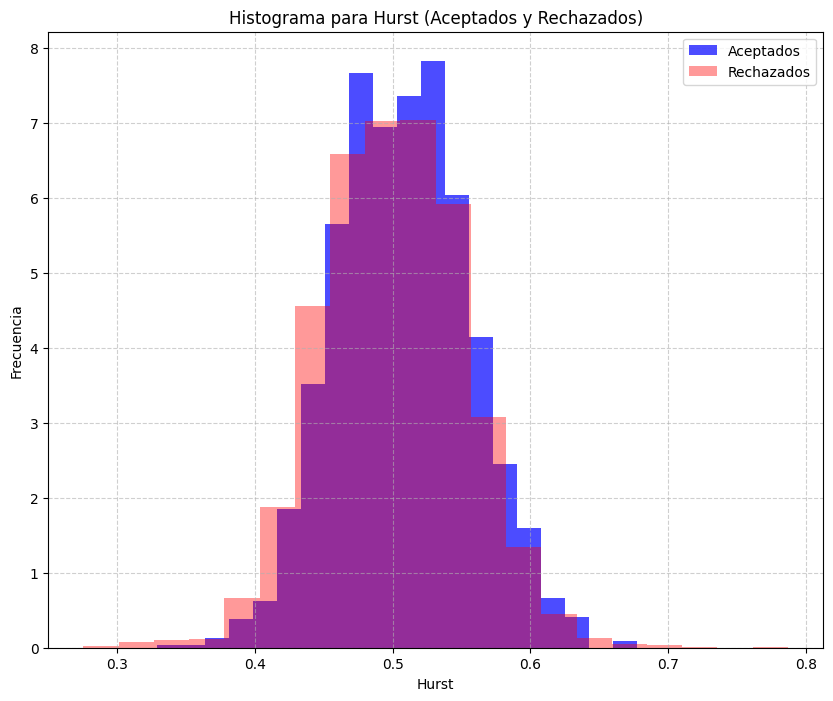

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVlg_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Hurst'], bins=20, color='blue', label='Aceptados', alpha=0.7, density=True)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Hurst'], bins=20, color='red', label='Rechazados', alpha=0.4, density=True)

# Configurar ejes y etiquetas
plt.xlabel('Hurst')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


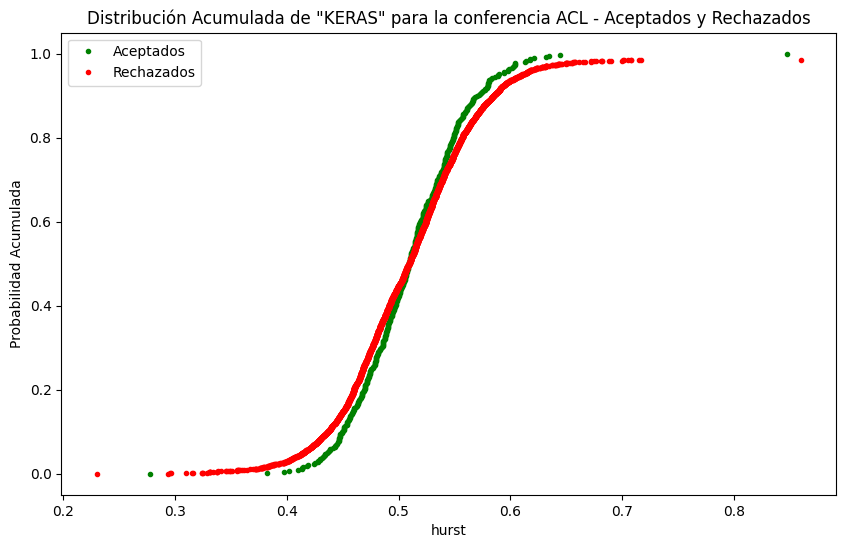

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVai_HURST_KERAS.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "KERAS" para la conferencia ACL - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#HURST ARXIVlg COUNTVECTORIZER

In [61]:
#TOKENIZADOR COUNT VECTORIZER (FIT ON TEXT FUERA VOC COMPLETO)
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import warnings
import numpy as np
import warnings
import re
import pandas as pd
from google.colab import drive
import nolds


#funcion limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar números al final de las palabras
    texto = re.sub(r'\b\d+\b', '', texto)

    # Eliminar números al final de las líneas
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)

    # Eliminar números aislados
    texto = re.sub(r'\d+', '', texto)

    # Eliminar dobles espacios
    texto = re.sub(' +', ' ', texto)

    # Eliminar saltos de línea innecesarios
    texto = re.sub(r'\n\s*\n', '\n', texto)

    return texto.strip()


#ruta archivo y hacer el DF
csv_path = '/content/drive/MyDrive/arxivLg_datos_completos.csv'
df = pd.read_csv(csv_path)

# Inicializar el tokenizer fuera del bucle
vectorizador = CountVectorizer()

# Lista para almacenar los resultados
resultados = []

# Lista para almacenar todos los textos concatenados
textos_completos = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Agregar el texto limpio a la lista de todos los textos
    textos_completos.append(texto_limpio)

# Ajustar el tokenizer a todos los textos concatenados
matriz_recuento = vectorizador.fit_transform(textos_completos)

# Recorrer textos
for index, row in df.iterrows():
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])
    texto_limpio = limpiar_texto(texto_concatenado)
    secuencia = vectorizador.transform([texto_limpio]).toarray()
    #print(secuencia[0])
    hurst = nolds.hurst_rs(secuencia[0])
    numpalabras = len(texto_limpio.split())
    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': numpalabras,
        'Hurst': hurst,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVlg_HURST_COUNTVECTORIZER.csv', index=False)

print("Proceso completado. Archivo ARXIVlg_HURST_COUNTV.csv creado.")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

                Conferencia Particion         Archivo  \
0     arxiv.cs.lg_2007-2017       dev  1604.04428.pdf   
1     arxiv.cs.lg_2007-2017       dev  1603.04283.pdf   
2     arxiv.cs.lg_2007-2017       dev  1610.08120.pdf   
3     arxiv.cs.lg_2007-2017       dev  1703.02721.pdf   
4     arxiv.cs.lg_2007-2017       dev   1306.4650.pdf   
...                     ...       ...             ...   
5043  arxiv.cs.lg_2007-2017     train  1606.01166.pdf   
5044  arxiv.cs.lg_2007-2017     train   1201.6626.pdf   
5045  arxiv.cs.lg_2007-2017     train   1401.0159.pdf   
5046  arxiv.cs.lg_2007-2017     train  1512.02693.pdf   
5047  arxiv.cs.lg_2007-2017     train  1611.01449.pdf   

                                                  Texto  Tamano_texto  \
0     resisting adversarials for convolutional neura...           564   
1     nan we construct a universal prediction system...           493   
2     image segmentation for fruit detection and yie...          1690   
3     on approximation 

#Graficas ARXIVlg countvectorizer

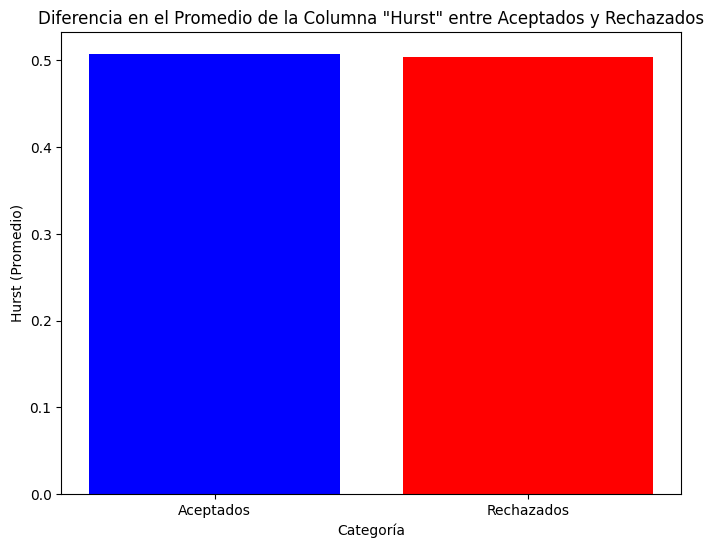

In [62]:
#MOSTRAR RESULTADOS
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVlg_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar barras para aceptados y rechazados
plt.bar(['Aceptados', 'Rechazados'], [df_aceptados['Hurst'].mean(), df_rechazados['Hurst'].mean()], color=['blue', 'red'])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst (Promedio)')
plt.title('Diferencia en el Promedio de la Columna "Hurst" entre Aceptados y Rechazados')
plt.show()

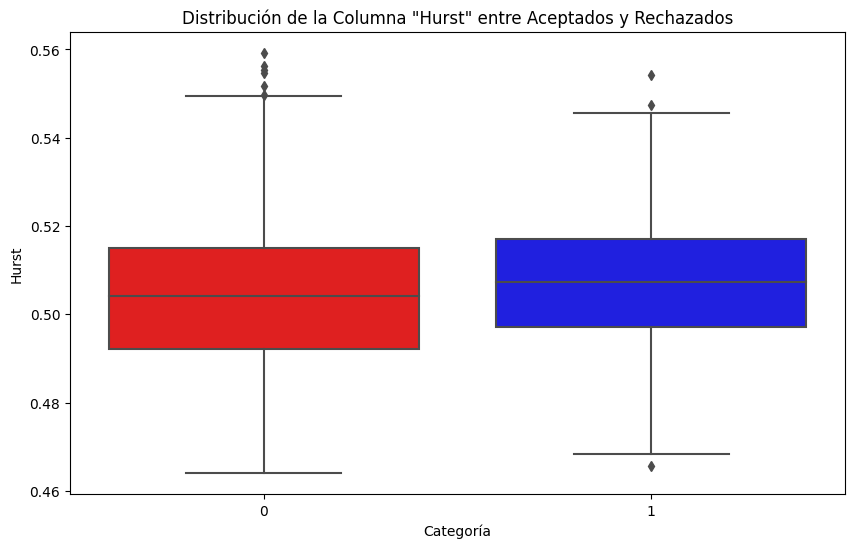

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVlg_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

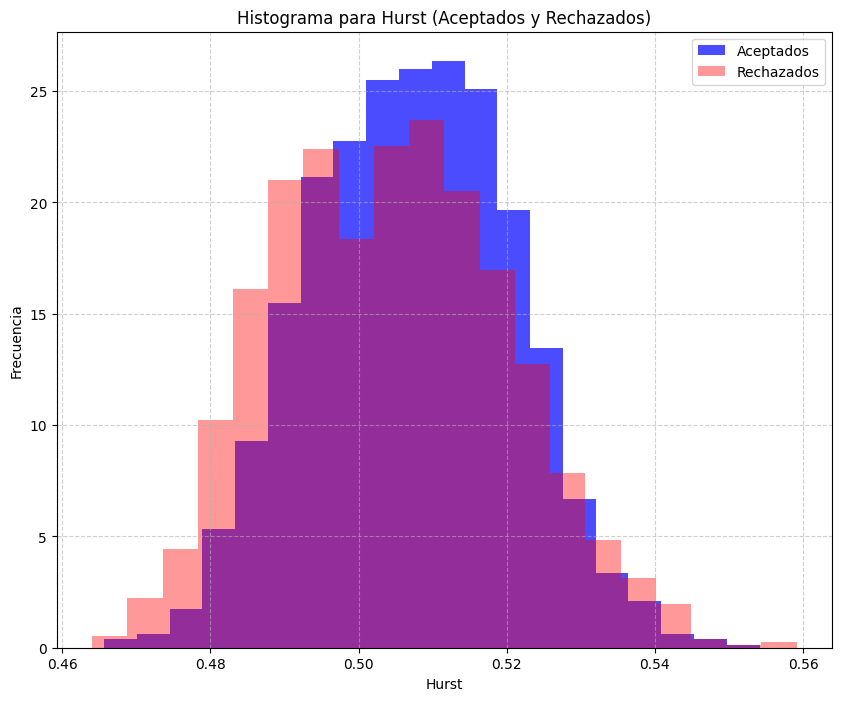

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVlg_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Hurst'], bins=20, color='blue', label='Aceptados', alpha=0.7, density = True)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Hurst'], bins=20, color='red', label='Rechazados', alpha=0.4, density = True)

# Configurar ejes y etiquetas
plt.xlabel('Hurst')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


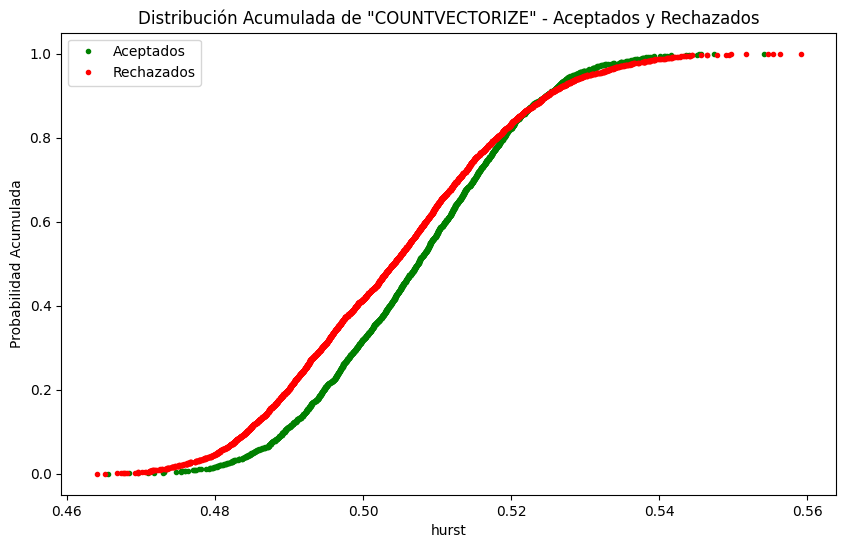

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/ARXIVlg_HURST_COUNTVECTORIZER.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "COUNTVECTORIZE" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#HURST TODOS KERAS

In [ ]:
#TOKENIZADOR KERAS (TOKENIZACION CON TODO EL VOCABULARIO)
import nltk
from keras.preprocessing.text import Tokenizer
import numpy as np
import warnings
import numpy as np
import warnings
import re
import pandas as pd
from google.colab import drive
import nolds

#funcion limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar números al final de las palabras
    texto = re.sub(r'\b\d+\b', '', texto)

    # Eliminar números al final de las líneas
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)

    # Eliminar números aislados
    texto = re.sub(r'\d+', '', texto)

    # Eliminar dobles espacios
    texto = re.sub(' +', ' ', texto)

    # Eliminar saltos de línea innecesarios
    texto = re.sub(r'\n\s*\n', '\n', texto)

    return texto.strip()

class CustomTokenizer(Tokenizer):
    def tokenize(self, inputs, *args, **kwargs):
        return super().texts_to_sequences([inputs])[0]

    def detokenize(self, inputs, *args, **kwargs):
        return " ".join([self.index_word[idx] for idx in inputs])

#ruta archivo y hacer el DF
rutas_archivos = [
    '/content/drive/MyDrive/acl_datos_completos.csv',
    '/content/drive/MyDrive/iclr_datos_completos.csv',
    '/content/drive/MyDrive/arxivAi_datos_completos.csv',
    '/content/drive/MyDrive/arxivCl_datos_completos.csv',
    '/content/drive/MyDrive/arxivLg_datos_completos.csv'
]
df = pd.concat([pd.read_csv(ruta) for ruta in rutas_archivos], ignore_index=True)


# Inicializar el tokenizer fuera del bucle
tokenizer = CustomTokenizer()

# Lista para almacenar los resultados
resultados = []

# Lista para almacenar todos los textos concatenados
textos_completos = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Agregar el texto limpio a la lista de todos los textos
    textos_completos.append(texto_limpio)

# Ajustar el tokenizer a todos los textos concatenados
tokenizer.fit_on_texts(textos_completos)

#Recorrer textos
for index, row in df.iterrows():
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])
    texto_limpio = limpiar_texto(texto_concatenado)
    secuencia = tokenizer.tokenize(texto_limpio)

    h = nolds.hurst_rs(np.array(secuencia))

    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': len(secuencia),
        'Hurst': h,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_KERAS.csv', index=False)

print("Proceso completado. Archivo TODOS_HURST_KERAS.csv creado.")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

                 Conferencia Particion         Archivo  \
0                   acl_2017       dev         660.pdf   
1                   acl_2017       dev         371.pdf   
2                   acl_2017       dev         352.pdf   
3                   acl_2017       dev         489.pdf   
4                   acl_2017       dev          37.pdf   
...                      ...       ...             ...   
12339  arxiv.cs.lg_2007-2017     train  1606.01166.pdf   
12340  arxiv.cs.lg_2007-2017     train   1201.6626.pdf   
12341  arxiv.cs.lg_2007-2017     train   1401.0159.pdf   
12342  arxiv.cs.lg_2007-2017     train  1512.02693.pdf   
12343  arxiv.cs.lg_2007-2017     train  1611.01449.pdf   

                                                   Texto  Tamano_texto  \
0      automatically generating rhythmic verse with n...           684   
1      phrasal recurrent neural network we propose a ...           888   
2      adversarial multi-task learning for text class...           628   
3      

#Graficas TODOS keras

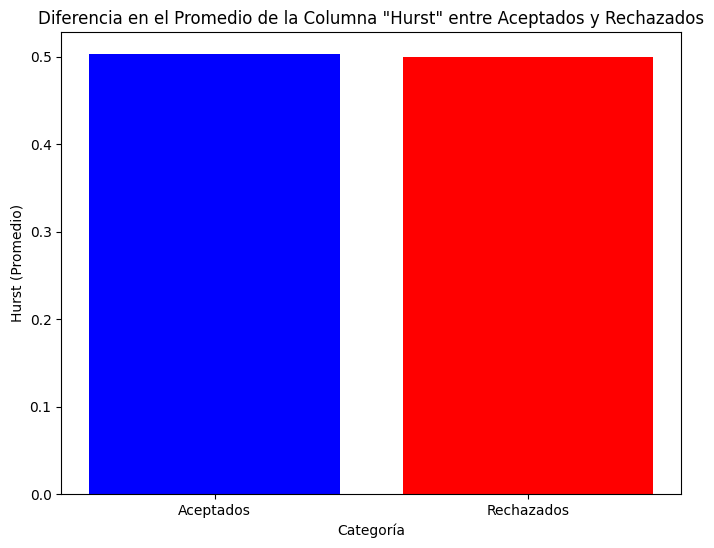

In [ ]:
#MOSTRAR RESULTADOS
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar barras para aceptados y rechazados
plt.bar(['Aceptados', 'Rechazados'], [df_aceptados['Hurst'].mean(), df_rechazados['Hurst'].mean()], color=['blue', 'red'])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst (Promedio)')
plt.title('Diferencia en el Promedio de la Columna "Hurst" entre Aceptados y Rechazados')
plt.show()

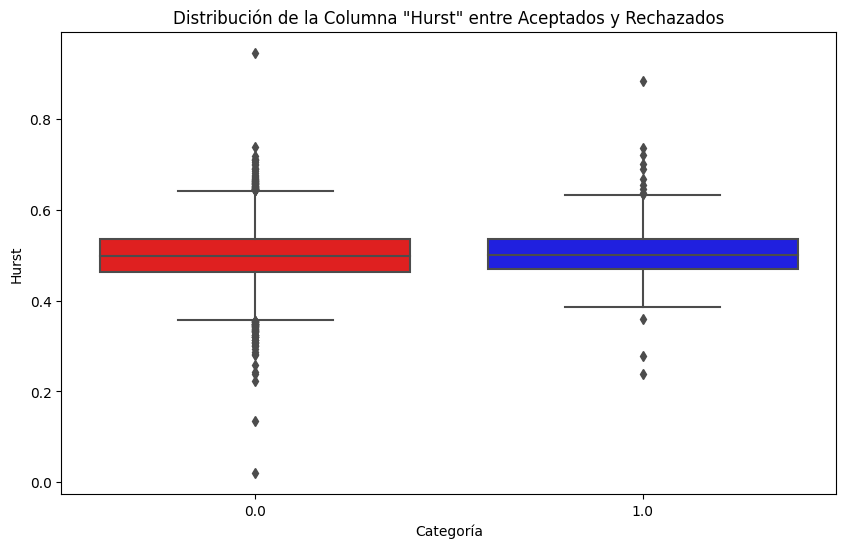

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

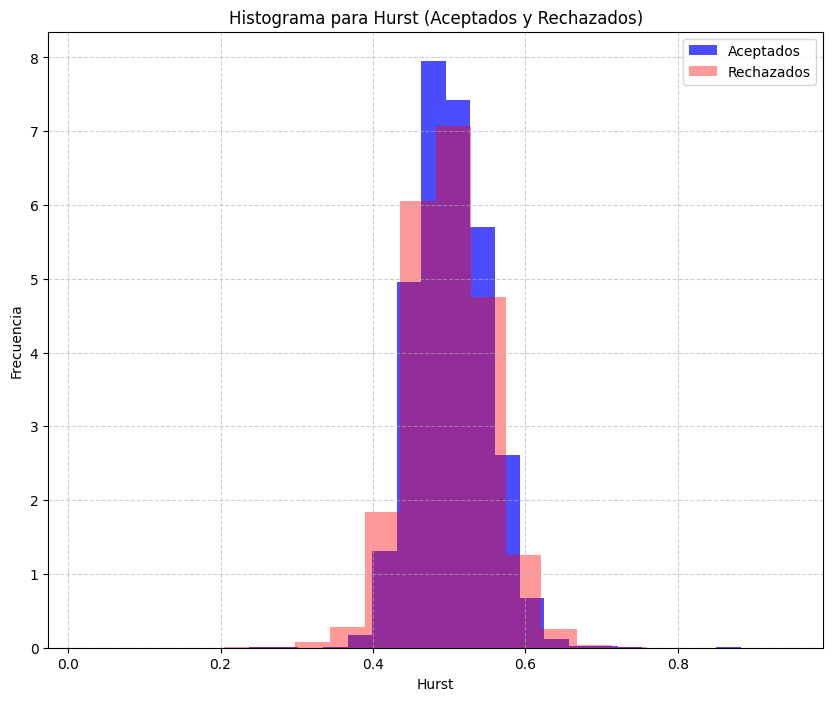

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_KERAS.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Hurst'], bins=20, color='blue', label='Aceptados', alpha=0.7, density = True)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Hurst'], bins=20, color='red', label='Rechazados', alpha=0.4, density = True)

# Configurar ejes y etiquetas
plt.xlabel('Hurst')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


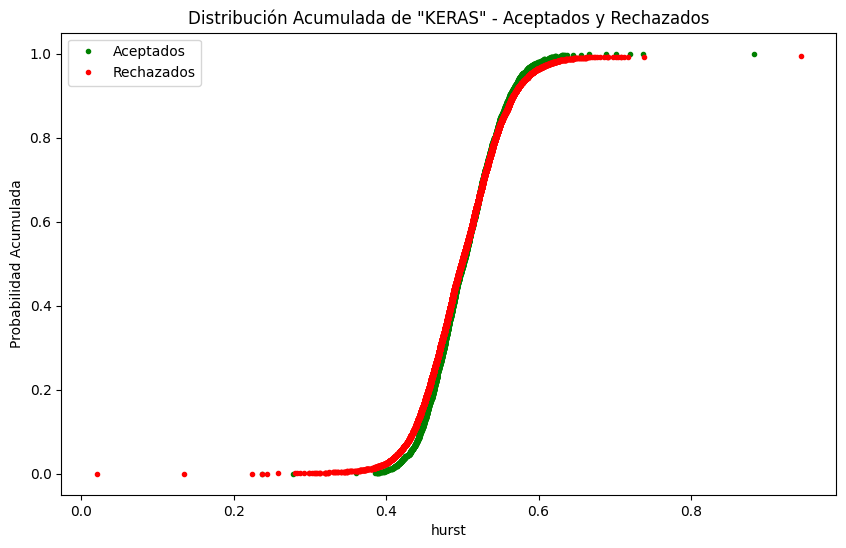

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_KERAS.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "KERAS" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#HURST TODOS COUNTVECTORIZER

In [ ]:
#TOKENIZADOR COUNT VECTORIZER (FIT ON TEXT FUERA VOC COMPLETO)
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import warnings
import numpy as np
import warnings
import re
import pandas as pd
from google.colab import drive
import nolds

#Funcion limpiar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar números al final de las palabras
    texto = re.sub(r'\b\d+\b', '', texto)

    # Eliminar números al final de las líneas
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)

    # Eliminar números aislados
    texto = re.sub(r'\d+', '', texto)

    # Eliminar dobles espacios
    texto = re.sub(' +', ' ', texto)

    # Eliminar saltos de línea innecesarios
    texto = re.sub(r'\n\s*\n', '\n', texto)

    return texto.strip()


#ruta archivo y hacer el DF
rutas_archivos = [
    '/content/drive/MyDrive/acl_datos_completos.csv',
    '/content/drive/MyDrive/iclr_datos_completos.csv',
    '/content/drive/MyDrive/arxivAi_datos_completos.csv',
    '/content/drive/MyDrive/arxivCl_datos_completos.csv',
    '/content/drive/MyDrive/arxivLg_datos_completos.csv'
]
df = pd.concat([pd.read_csv(ruta) for ruta in rutas_archivos], ignore_index=True)

# Inicializar el tokenizer fuera del bucle
vectorizador = CountVectorizer()

# Lista para almacenar los resultados
resultados = []

# Lista para almacenar todos los textos concatenados
textos_completos = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Agregar el texto limpio a la lista de todos los textos
    textos_completos.append(texto_limpio)

# Ajustar el tokenizer a todos los textos concatenados
matriz_recuento = vectorizador.fit_transform(textos_completos)

# Recorrer textos
for index, row in df.iterrows():
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])
    texto_limpio = limpiar_texto(texto_concatenado)
    secuencia = vectorizador.transform([texto_limpio]).toarray()[0]

    h = nolds.hurst_rs(np.array(secuencia))

    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': len(secuencia),
        'Hurst': h,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_COUNTVECTORIZER.csv', index=False)

print("Proceso completado. Archivo TODOS_HURST_COUNTVECTORIZER.csv creado.")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

                 Conferencia Particion         Archivo  \
0                   acl_2017       dev         660.pdf   
1                   acl_2017       dev         371.pdf   
2                   acl_2017       dev         352.pdf   
3                   acl_2017       dev         489.pdf   
4                   acl_2017       dev          37.pdf   
...                      ...       ...             ...   
12339  arxiv.cs.lg_2007-2017     train  1606.01166.pdf   
12340  arxiv.cs.lg_2007-2017     train   1201.6626.pdf   
12341  arxiv.cs.lg_2007-2017     train   1401.0159.pdf   
12342  arxiv.cs.lg_2007-2017     train  1512.02693.pdf   
12343  arxiv.cs.lg_2007-2017     train  1611.01449.pdf   

                                                   Texto  Tamano_texto  \
0      automatically generating rhythmic verse with n...         95903   
1      phrasal recurrent neural network we propose a ...         95903   
2      adversarial multi-task learning for text class...         95903   
3      

#Graficas TODOS countvectorizer

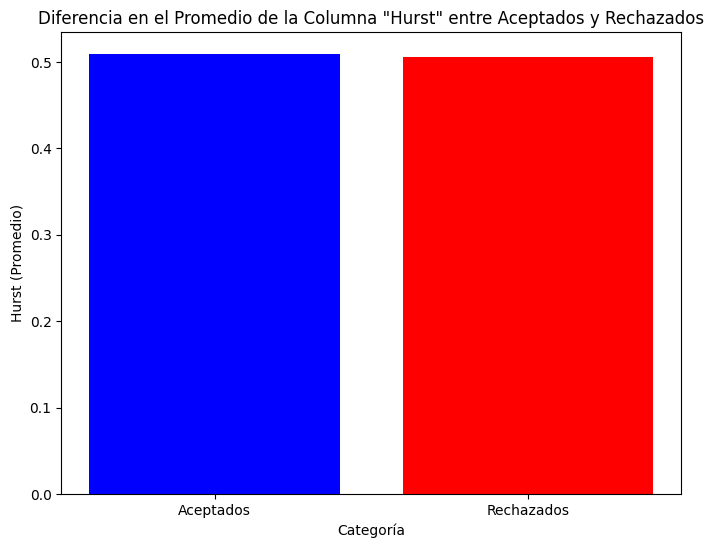

In [ ]:
#MOSTRAR RESULTADOS
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar barras para aceptados y rechazados
plt.bar(['Aceptados', 'Rechazados'], [df_aceptados['Hurst'].mean(), df_rechazados['Hurst'].mean()], color=['blue', 'red'])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst (Promedio)')
plt.title('Diferencia en el Promedio de la Columna "Hurst" entre Aceptados y Rechazados')
plt.show()

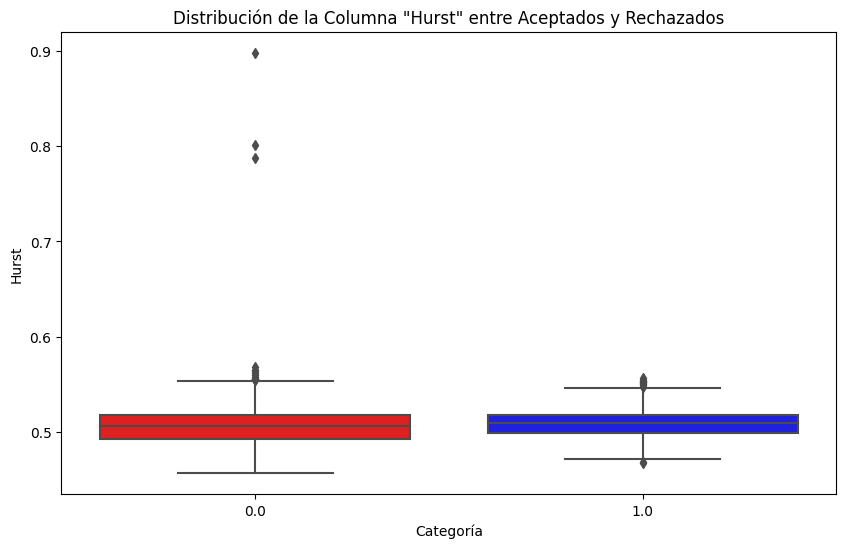

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

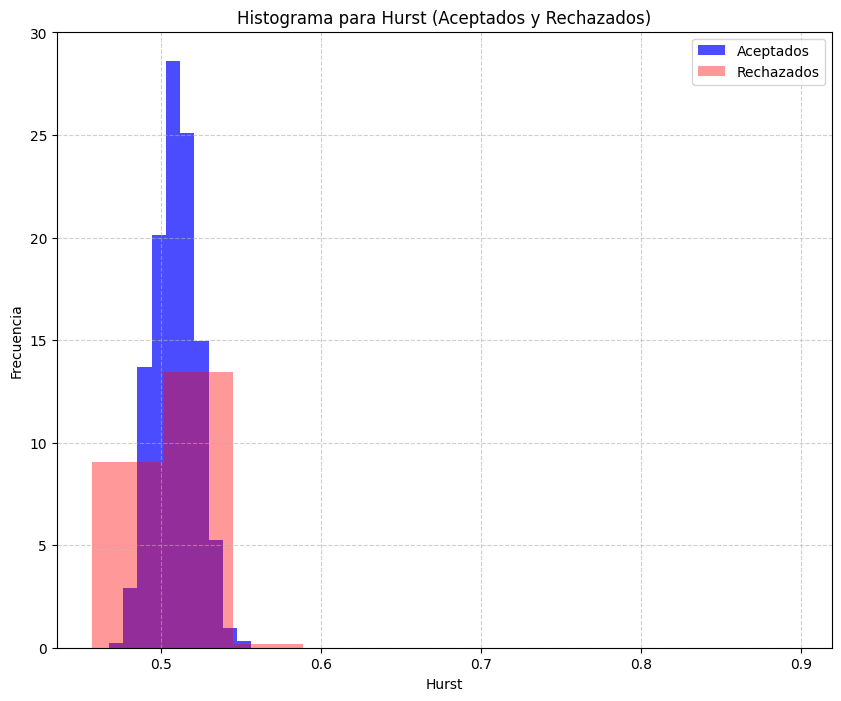

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_COUNTVECTORIZER.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Hurst'], bins=None, color='blue', label='Aceptados', alpha=0.7, density=True)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Hurst'], bins=None, color='red', label='Rechazados', alpha=0.4, density=True)

# Configurar ejes y etiquetas
plt.xlabel('Hurst')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


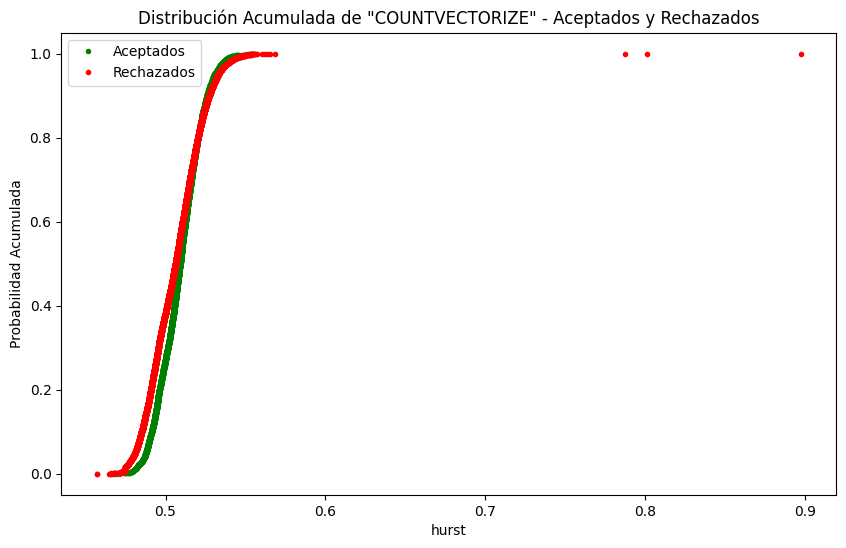

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_COUNTVECTORIZER.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "COUNTVECTORIZE" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#REPLICAR HURST CON ASCII


In [ ]:
import numpy as np
import warnings
import re
import pandas as pd
import nolds

# Función para convertir texto a códigos ASCII
def texto_a_ascii(texto):
    ascii_codes = [ord(char) for char in texto]
    return ascii_codes

# Función limpiar texto
def limpiar_texto(texto):
    #texto = texto.lower()
    texto = re.sub(r'\b\d+\b', '', texto)
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)
    texto = re.sub(r'\d+', '', texto)
    texto = re.sub(' +', ' ', texto)
    texto = re.sub(r'\n\s*\n', '\n', texto)
    return texto.strip()

# Ruta archivo y hacer el DF
rutas_archivos = [
    '/content/drive/MyDrive/acl_datos_completos.csv',
    '/content/drive/MyDrive/iclr_datos_completos.csv',
    '/content/drive/MyDrive/arxivAi_datos_completos.csv',
    '/content/drive/MyDrive/arxivCl_datos_completos.csv',
    '/content/drive/MyDrive/arxivLg_datos_completos.csv'
]
df = pd.concat([pd.read_csv(ruta) for ruta in rutas_archivos], ignore_index=True)

# Lista para almacenar los resultados
resultados = []

# Recorrer las filas del DataFrame
for index, row in df.iterrows():
    # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
    texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

    # Limpiar el texto
    texto_limpio = limpiar_texto(texto_concatenado)

    # Convertir el texto a códigos ASCII
    texto_ascii = texto_a_ascii(texto_limpio)
    #print(texto_ascii)

    h = nolds.hurst_rs(np.array(texto_ascii))
    #np.array(texto_ascii)

    # Almacenar resultados
    resultados.append({
        'Conferencia': row['Conferencia'],
        'Particion': row['Particion'],
        'Archivo': row['Archivo'],
        'Texto': texto_limpio,
        'Tamano_texto': len(texto_ascii),
        'Hurst': h,
        'Accepted': row['Accepted']
    })

# Crear un nuevo DataFrame con los resultados y resetear el índice
df_resultados = pd.DataFrame(resultados).reset_index(drop=True)

# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_ASCII.csv', index=False)

#print("Proceso completado. Archivo TODOS_HURST_ASCII.csv creado.")


#Graficas TODOS ascii

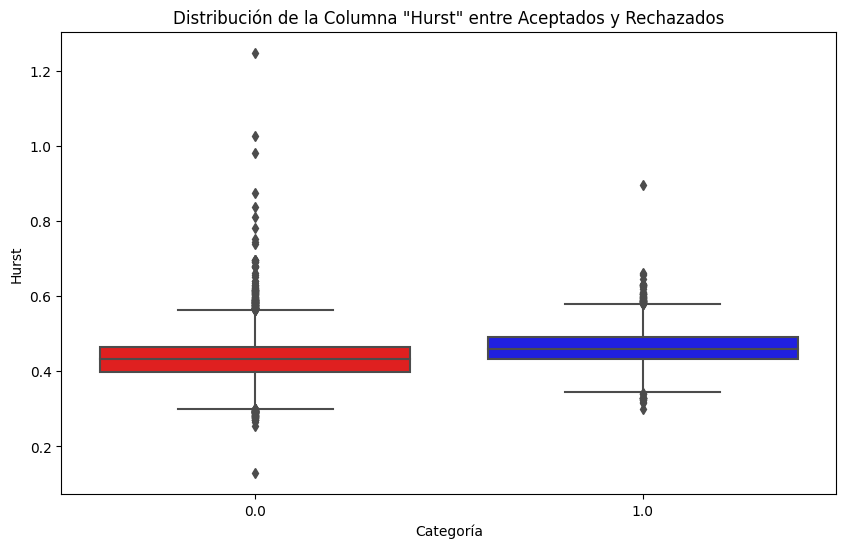

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_ASCII.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

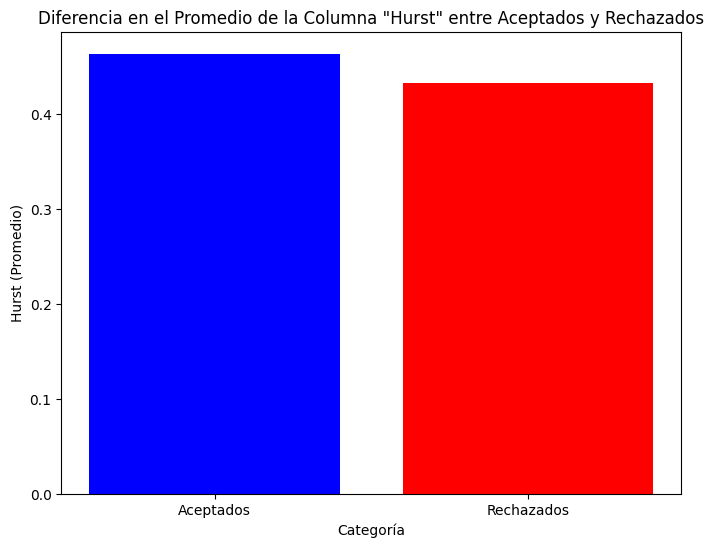

In [ ]:
#MOSTRAR RESULTADOS
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_ASCII.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en dos DataFrames: aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar barras para aceptados y rechazados
plt.bar(['Aceptados', 'Rechazados'], [df_aceptados['Hurst'].mean(), df_rechazados['Hurst'].mean()], color=['blue', 'red'])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst (Promedio)')
plt.title('Diferencia en el Promedio de la Columna "Hurst" entre Aceptados y Rechazados')
plt.show()

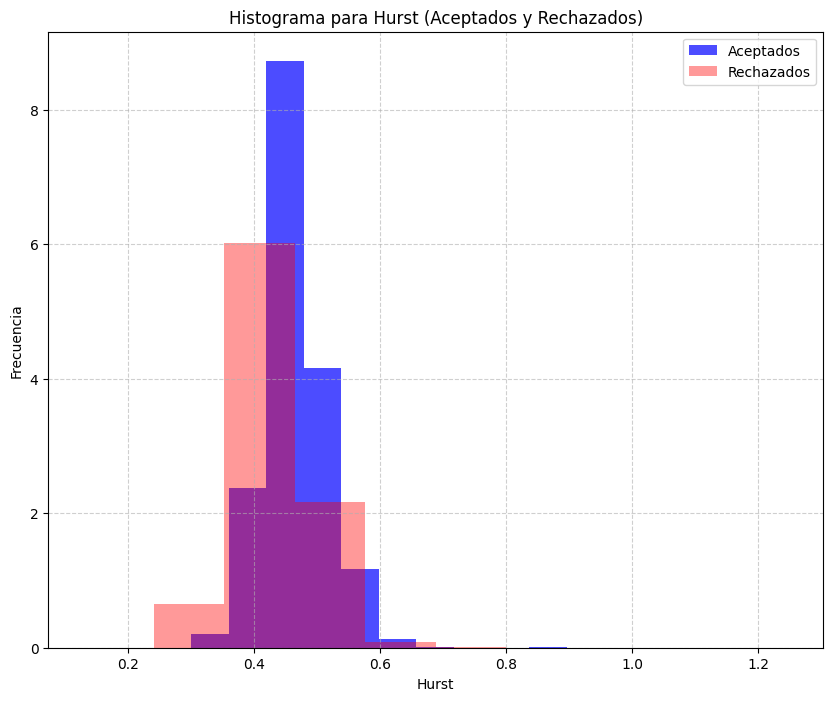

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#imprimir distribucion acumulada

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_ASCII.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Separar los datos en aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

#tamano letra
plt.figure(figsize=(10, 8))

# Graficar histograma para aceptados
plt.hist(df_aceptados['Hurst'], bins=None, color='blue', density=True, label='Aceptados', alpha=0.7)

# Graficar histograma para rechazados
plt.hist(df_rechazados['Hurst'], bins=None, color='red',density=True, label='Rechazados', alpha=0.4)


plt.xlabel('Hurst')
plt.ylabel('Frecuencia')
plt.title('Histograma para Hurst (Aceptados y Rechazados)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


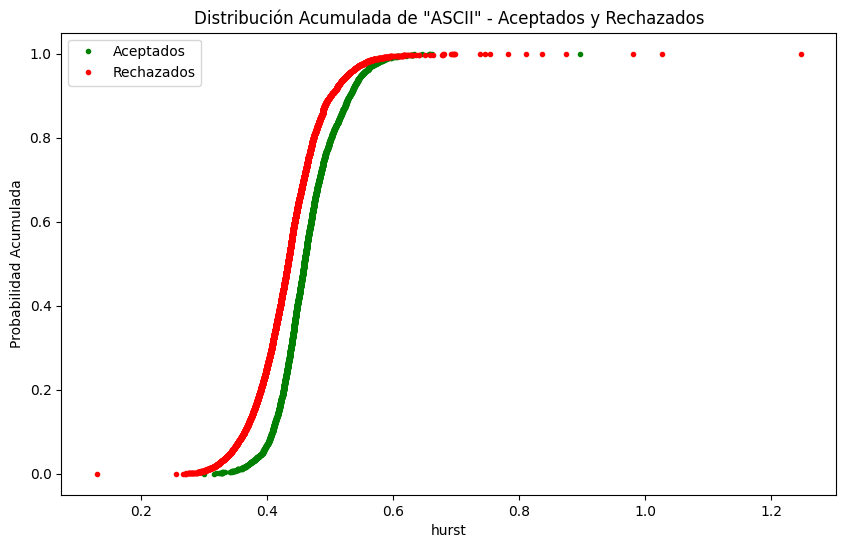

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_ASCII.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "ASCII" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#HURST TODOS NUEVOS TOKENIZADORES

In [ ]:
!wget http://www.gutenberg.org/cache/epub/16457/pg16457.txt
!wget https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-103-raw-v1.zip
!unzip wikitext-103-raw-v1.zip

In [ ]:
!pip install tokenizers

In [ ]:
import numpy as np
import warnings
import re
import pandas as pd
import nolds
from tokenizers import Tokenizer
from tokenizers.models import BPE, Unigram, WordLevel, WordPiece
from tokenizers.trainers import BpeTrainer, WordLevelTrainer, WordPieceTrainer, UnigramTrainer
from tokenizers.pre_tokenizers import Whitespace

unk_token = "<UNK>"  # token for unknown words
spl_tokens = ["<UNK>", "<SEP>", "<MASK>", "<CLS>"]  # special tokens

def prepare_tokenizer_trainer(alg):
    """
    Prepares the tokenizer and trainer with unknown & special tokens.
    """
    if alg == 'BPE':
        tokenizer = Tokenizer(BPE(unk_token = unk_token))
        trainer = BpeTrainer(special_tokens = spl_tokens)
    elif alg == 'UNI':
        tokenizer = Tokenizer(Unigram())
        trainer = UnigramTrainer(unk_token= unk_token, special_tokens = spl_tokens)
    elif alg == 'WPC':
        tokenizer = Tokenizer(WordPiece(unk_token = unk_token))
        trainer = WordPieceTrainer(special_tokens = spl_tokens)
    else:
        tokenizer = Tokenizer(WordLevel(unk_token = unk_token))
        trainer = WordLevelTrainer(special_tokens = spl_tokens)

    tokenizer.pre_tokenizer = Whitespace()
    return tokenizer, trainer


def train_tokenizer(files, alg='WLV'):
    """
    Takes the files and trains the tokenizer.
    """
    tokenizer, trainer = prepare_tokenizer_trainer(alg)
    tokenizer.train(files, trainer) # training the tokenzier
    tokenizer.save("./tokenizer-trained.json")
    tokenizer = Tokenizer.from_file("./tokenizer-trained.json")
    return tokenizer

def tokenize(input_string, tokenizer):
    """
    Tokenizes the input string using the tokenizer provided.
    """
    output = tokenizer.encode(input_string)

    #return outputs
    return output.ids


# Función limpiar texto
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\b\d+\b', '', texto)
    texto = re.sub(r'\s\d+$', '', texto, flags=re.MULTILINE)
    texto = re.sub(r'\d+', '', texto)
    texto = re.sub(' +', ' ', texto)
    texto = re.sub(r'\n\s*\n', '\n', texto)
    return texto.strip()

# Ruta archivo y hacer el DF
rutas_archivos = [
    '/content/drive/MyDrive/acl_datos_completos.csv',
    '/content/drive/MyDrive/iclr_datos_completos.csv',
    '/content/drive/MyDrive/arxivAi_datos_completos.csv',
    '/content/drive/MyDrive/arxivCl_datos_completos.csv',
    '/content/drive/MyDrive/arxivLg_datos_completos.csv'
]

df = pd.concat([pd.read_csv(ruta) for ruta in rutas_archivos], ignore_index=True)

# Definir los tokenizadores
tokenizers = {
    'BPE': {'model': BPE, 'trainer': BpeTrainer},
    'UNI': {'model': Unigram, 'trainer': UnigramTrainer},
    'WPC': {'model': WordPiece, 'trainer': WordPieceTrainer},
    'WLV': {'model': WordLevel, 'trainer': WordLevelTrainer},
}

# Lista para almacenar los resultados
resultados = []

large_files = [f"./wikitext-103-raw/wiki.{split}.raw" for split in ["test", "train", "valid"]]

tokens_dict = {}

# Iterar los tokenizadores
for tokenizador in tokenizers:

    # Entrenar el tokenizador
    trained_tokenizer = train_tokenizer(large_files, tokenizador)


    # Recorrer las filas del DataFrame
    for index, row in df.iterrows():
        # Concatenar los textos: Title, Abstract, Introduccion, Conclusion
        texto_concatenado = ' '.join([str(row['Title']), str(row['Abstract']), str(row['Introducción']), str(row['Conclusion'])])

        # Limpiar el texto
        texto_limpio = limpiar_texto(texto_concatenado)
        #print(texto_limpio)

        # Tokenizar el texto con el tokenizador actual
        texto_tokenizado = tokenize(texto_limpio, trained_tokenizer)

        # Calcular el parámetro de Hurst
        h = nolds.hurst_rs(np.array(texto_tokenizado))

        # Almacenar resultados
        resultados.append({
            'Conferencia': row['Conferencia'],
            'Particion': row['Particion'],
            'Archivo': row['Archivo'],
            'Texto': texto_limpio,
            'Tamano_texto': len(texto_tokenizado),
            'Accepted': row['Accepted'],
            f'Hurst_{tokenizador}': h  # Columna para cada tokenizador
        })

# Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

# Guardar el nuevo DataFrame en un archivo CSV
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES.csv', index=False)

print("Proceso completado. Archivo TODOS_HURST_NUEVOSTOKENIZADORES.csv creado.")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/nolds/measures.py:45: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  warnings.warn(
/usr/local/lib/python3.10/dist-packages

Proceso completado. Archivo TODOS_HURST_NUEVOSTOKENIZADORES.csv creado.


In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES.csv')
print(df)

                 Conferencia Particion         Archivo  \
0                   acl_2017       dev         660.pdf   
1                   acl_2017       dev         371.pdf   
2                   acl_2017       dev         352.pdf   
3                   acl_2017       dev         489.pdf   
4                   acl_2017       dev          37.pdf   
...                      ...       ...             ...   
49371  arxiv.cs.lg_2007-2017     train  1606.01166.pdf   
49372  arxiv.cs.lg_2007-2017     train   1201.6626.pdf   
49373  arxiv.cs.lg_2007-2017     train   1401.0159.pdf   
49374  arxiv.cs.lg_2007-2017     train  1512.02693.pdf   
49375  arxiv.cs.lg_2007-2017     train  1611.01449.pdf   

                                                   Texto  Tamano_texto  \
0      automatically generating rhythmic verse with n...           888   
1      phrasal recurrent neural network we propose a ...          1268   
2      adversarial multi-task learning for text class...           806   
3      

In [ ]:
import pandas as pd

df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES.csv')

# Agrupar por nombre de archivo y aplicar alguna función de resumen
df_grouped = df.groupby('Archivo').agg({
    'Conferencia': 'first',
    'Particion': 'first',
    'Texto': 'first',
    'Tamano_texto': 'first',
    'Accepted': 'first',
    'Hurst_BPE': 'mean',
    'Hurst_UNI': 'mean',
    'Hurst_WPC': 'mean',
    'Hurst_WLV': 'mean'
}).reset_index()

df_grouped.to_csv('/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv', index=False)

print(df_grouped)



             Archivo            Conferencia Particion  \
0      0704.2668.pdf  arxiv.cs.lg_2007-2017     train   
1      0705.4485.pdf  arxiv.cs.lg_2007-2017     train   
2      0710.0485.pdf  arxiv.cs.lg_2007-2017     train   
3      0712.3402.pdf  arxiv.cs.lg_2007-2017     train   
4      0801.4716.pdf  arxiv.cs.cl_2007-2017     train   
...              ...                    ...       ...   
12270         86.pdf               acl_2017     train   
12271         87.pdf               acl_2017     train   
12272         94.pdf               acl_2017       dev   
12273         96.pdf               acl_2017     train   
12274         97.pdf               acl_2017     train   

                                                   Texto  Tamano_texto  \
0      supervised feature selection via dependence es...          2161   
1      mixed membership stochastic blockmodels observ...          1465   
2      prediction with expert advice for the brier ga...            56   
3      graph kernel

#Graficas NUEVOSTOKENIZADORES

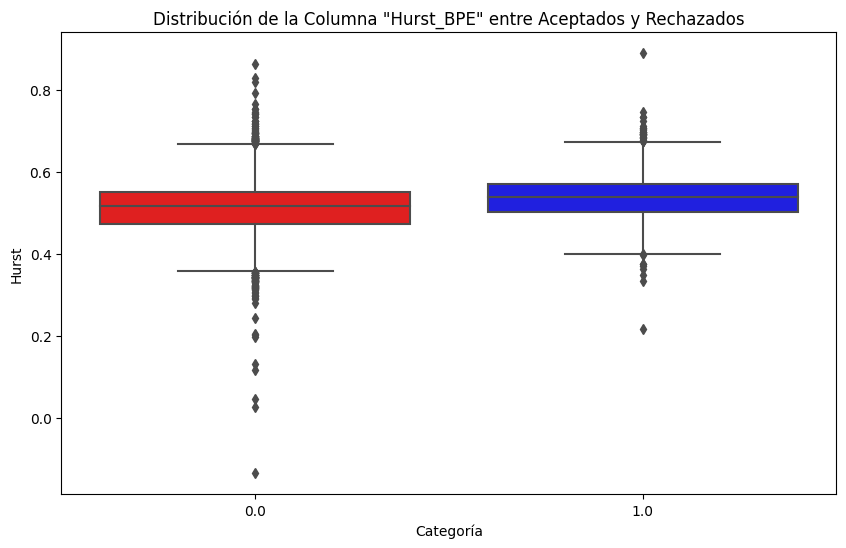

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst_BPE', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_BPE" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

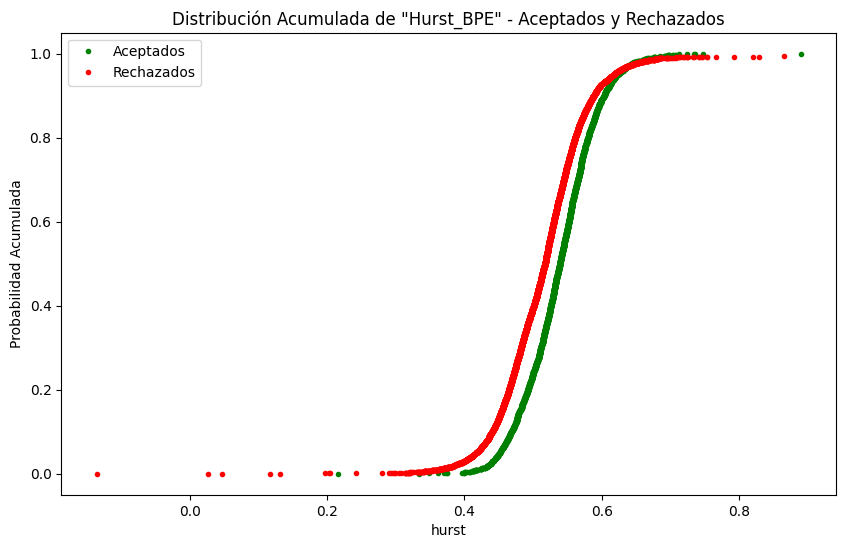

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_BPE'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_BPE'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_BPE" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


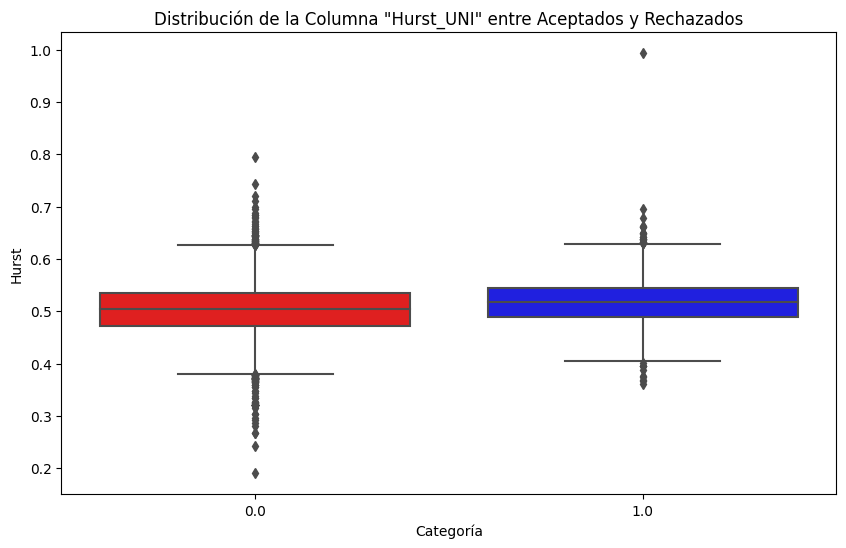

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst_UNI', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_UNI" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

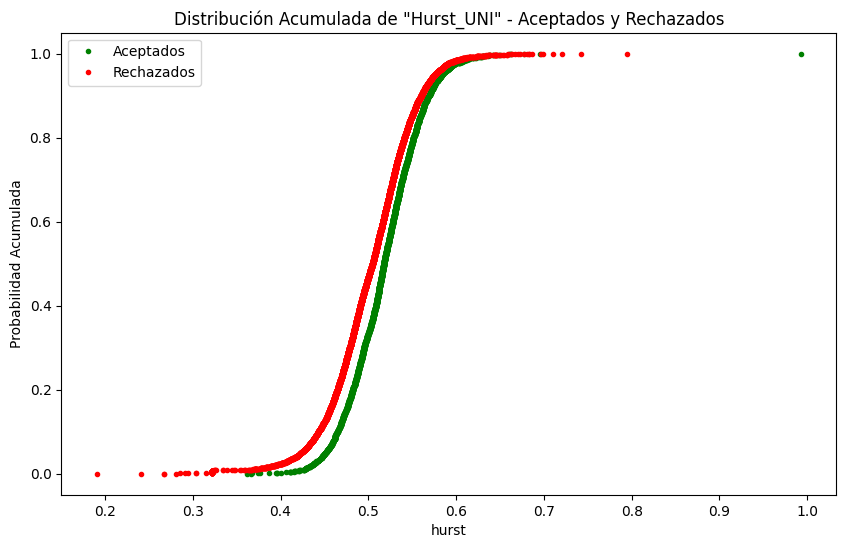

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_UNI'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_UNI'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_UNI" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


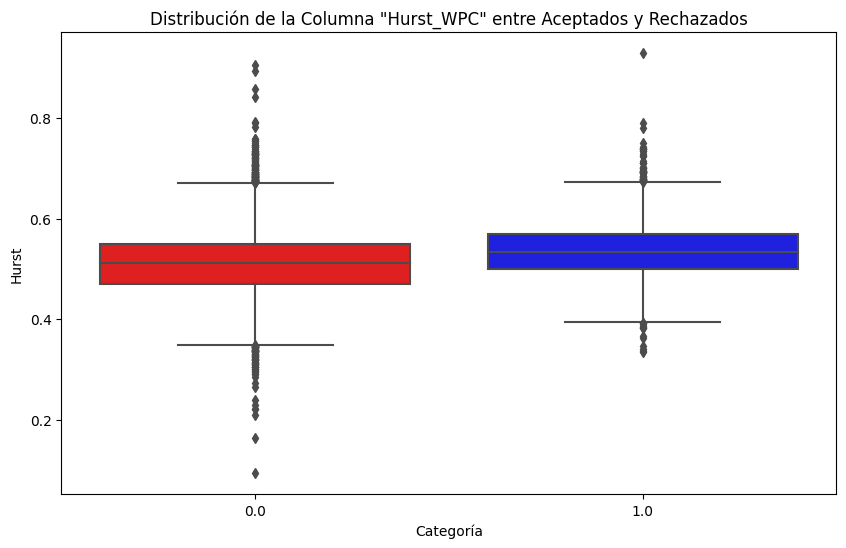

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst_WPC', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_WPC" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

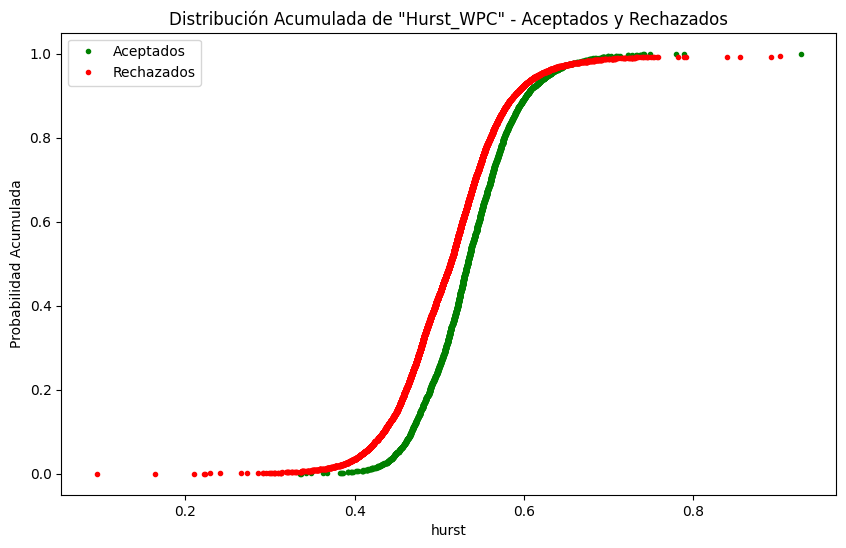

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_WPC'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_WPC'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_WPC" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


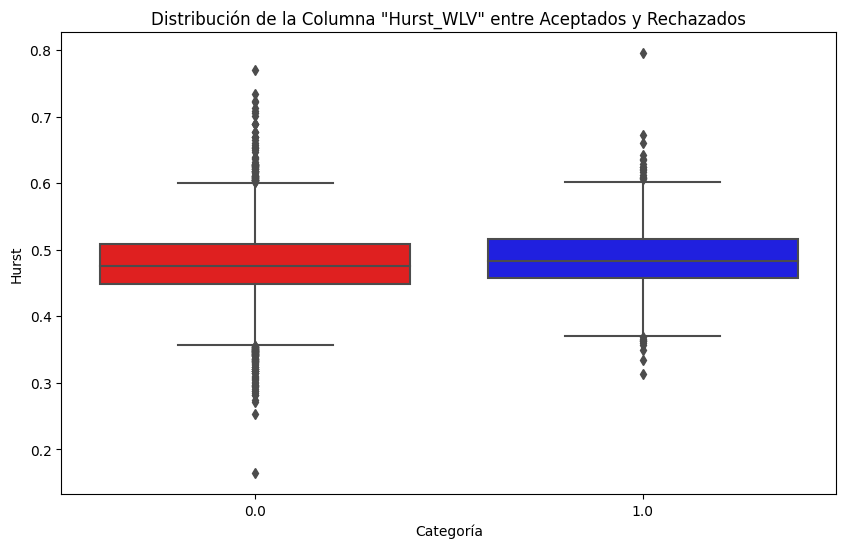

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados
sns.boxplot(x='Accepted', y='Hurst_WLV', data=df_resultados, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_WLV" entre Aceptados y Rechazados')

# Mostrar la gráfica
plt.show()

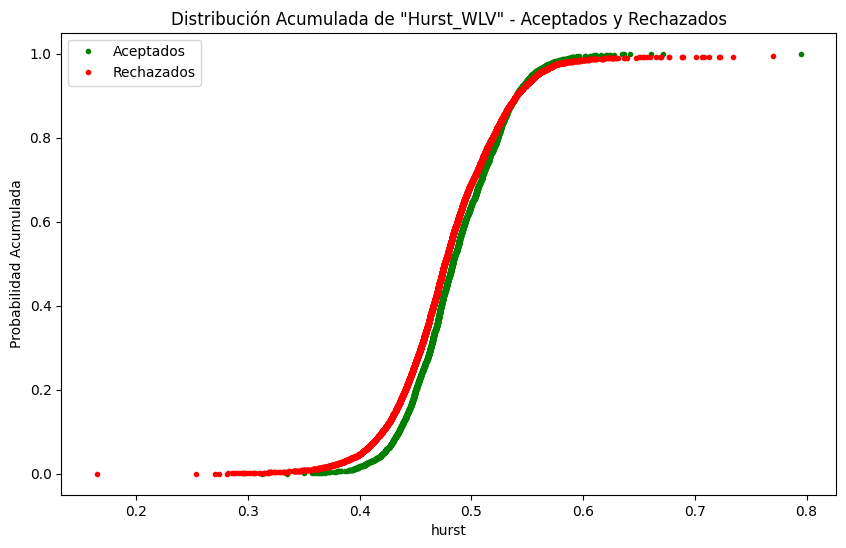

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Separar DF aceptados y rechazados
df_aceptados = df_resultados[df_resultados['Accepted'] == 1]
df_rechazados = df_resultados[df_resultados['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_WLV'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_WLV'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_WLV" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#Graficas arxiv.cs.lg_2007-2017 nuevos vectorizadores

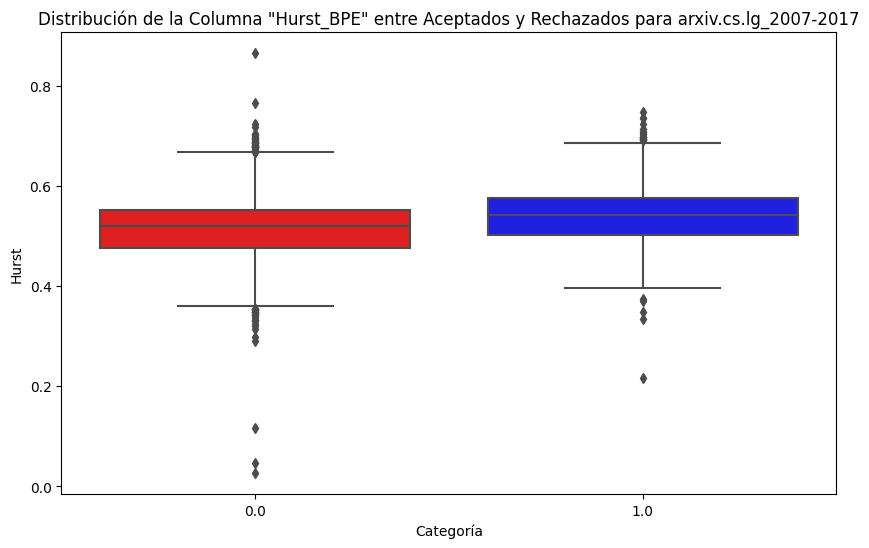

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos que tienen "acl_2017" en la columna "Conferencia"
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_BPE', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_BPE" entre Aceptados y Rechazados para arxiv.cs.lg_2007-2017')

# Mostrar la gráfica
plt.show()


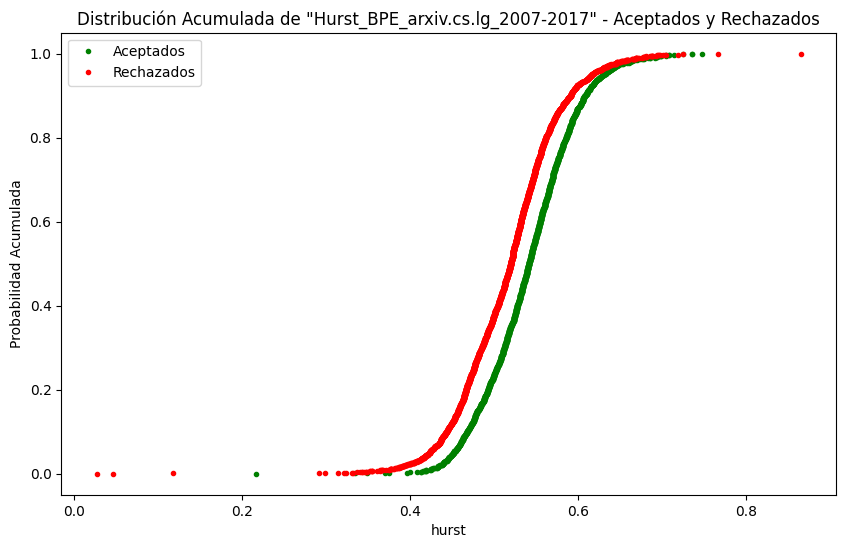

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_BPE'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_BPE'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_BPE_arxiv.cs.lg_2007-2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


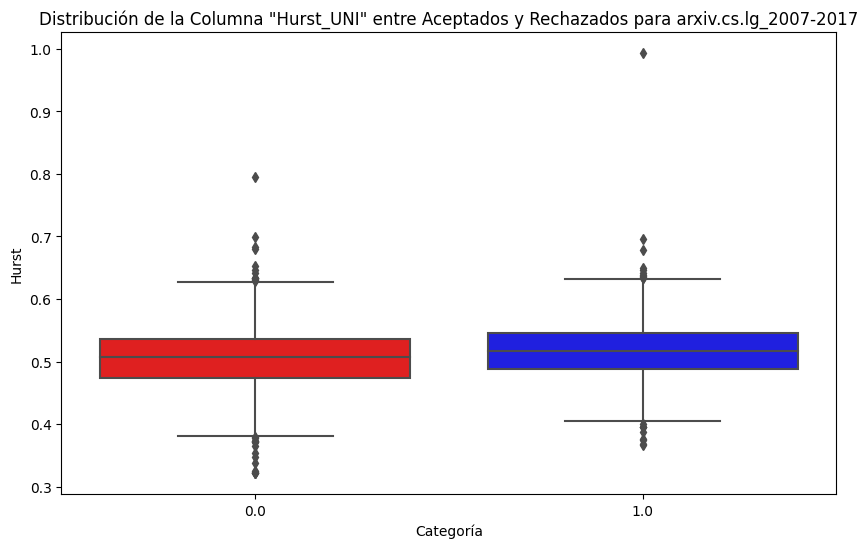

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos que tienen "acl_2017" en la columna "Conferencia"
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_UNI', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_UNI" entre Aceptados y Rechazados para arxiv.cs.lg_2007-2017')

# Mostrar la gráfica
plt.show()


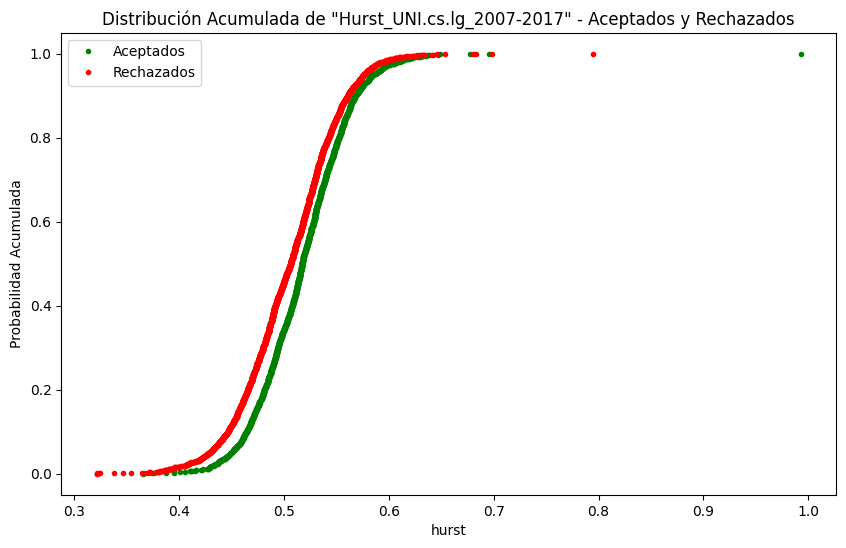

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_UNI'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_UNI'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_UNI.cs.lg_2007-2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


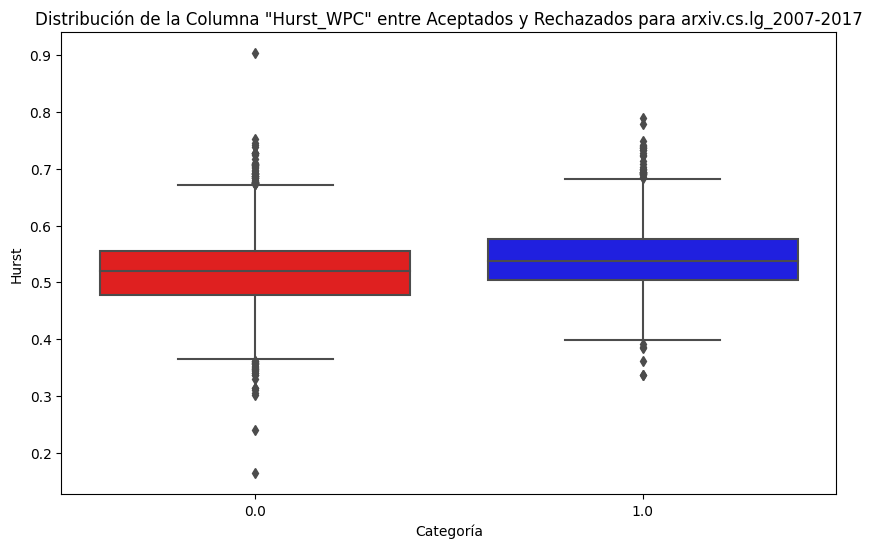

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos que tienen "acl_2017" en la columna "Conferencia"
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_WPC', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_WPC" entre Aceptados y Rechazados para arxiv.cs.lg_2007-2017')

# Mostrar la gráfica
plt.show()


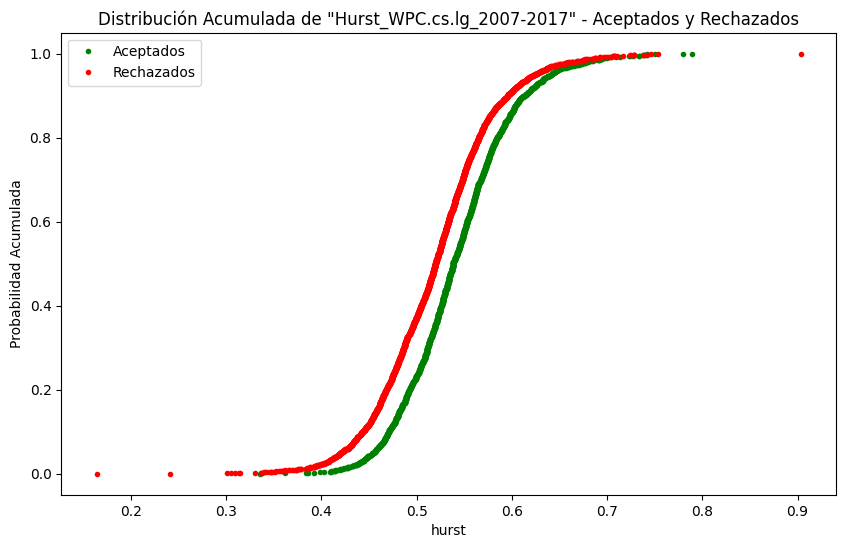

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_WPC'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_WPC'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_WPC.cs.lg_2007-2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


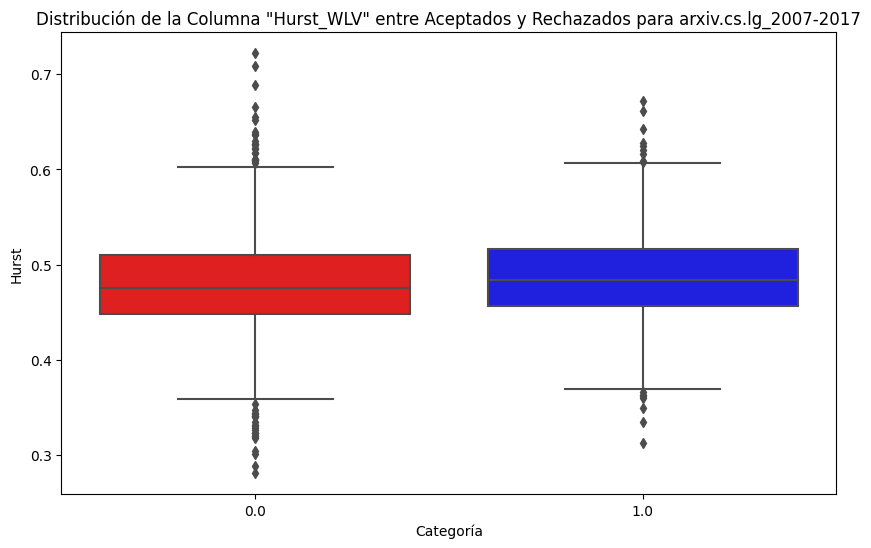

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos que tienen "acl_2017" en la columna "Conferencia"
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_WLV', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_WLV" entre Aceptados y Rechazados para arxiv.cs.lg_2007-2017')

# Mostrar la gráfica
plt.show()


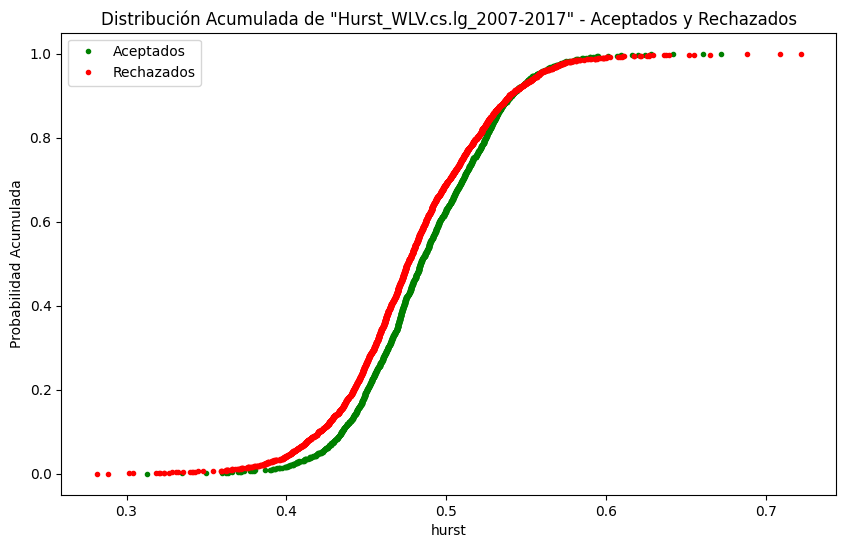

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_WLV'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_WLV'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_WLV.cs.lg_2007-2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#Graficas arxiv.cs.cl_2007-2017 nuevos tokenizadodres

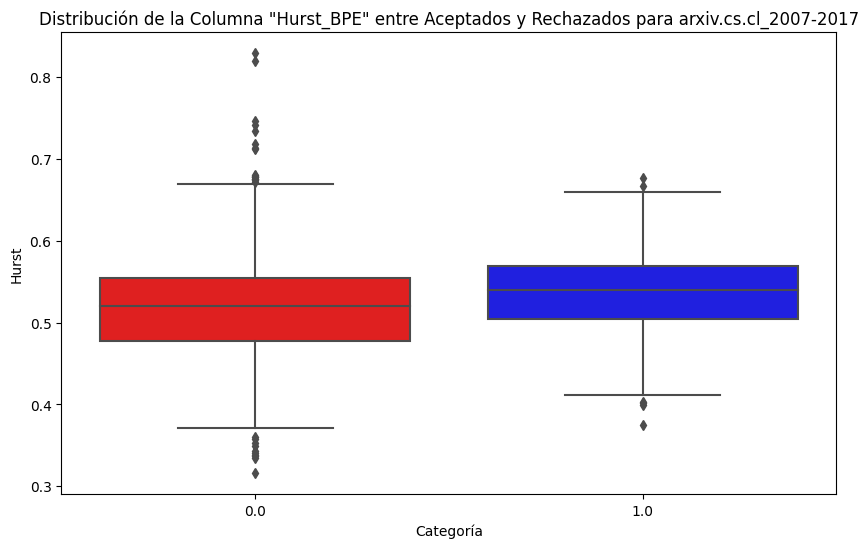

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.cl_2007-2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_BPE', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_BPE" entre Aceptados y Rechazados para arxiv.cs.cl_2007-2017')

# Mostrar la gráfica
plt.show()


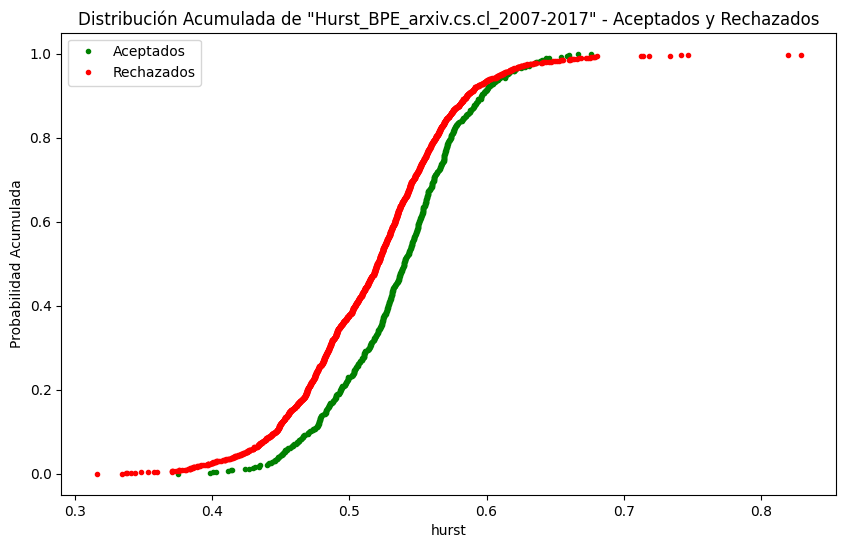

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.cl_2007-2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_BPE'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_BPE'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_BPE_arxiv.cs.cl_2007-2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


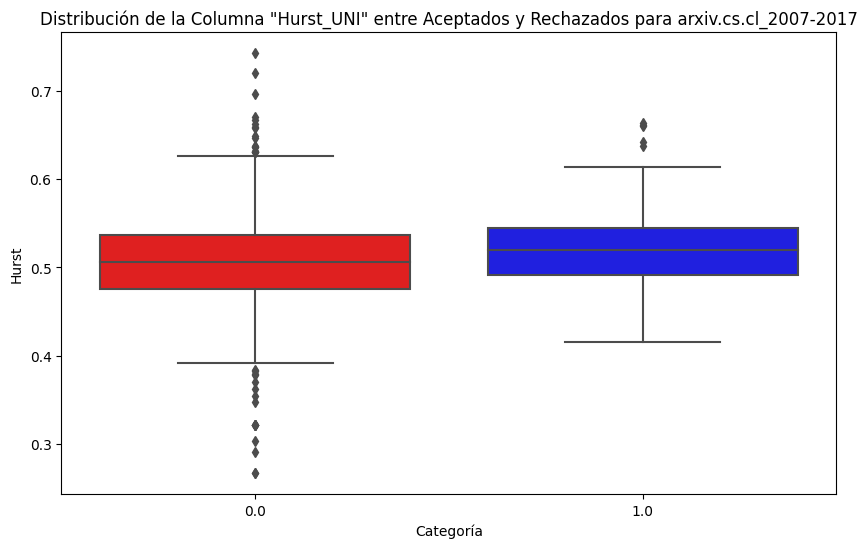

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos que tienen "acl_2017" en la columna "Conferencia"
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.cl_2007-2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_UNI', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_UNI" entre Aceptados y Rechazados para arxiv.cs.cl_2007-2017')

# Mostrar la gráfica
plt.show()


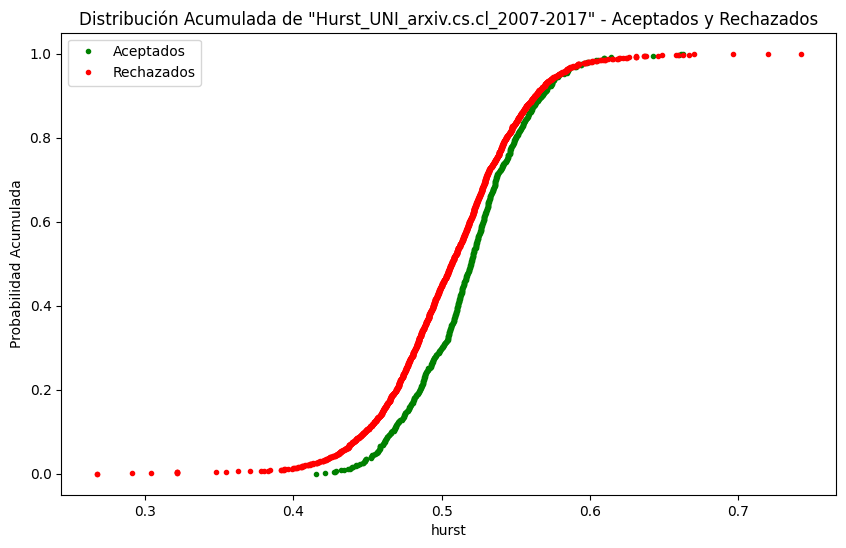

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.cl_2007-2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_UNI'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_UNI'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_UNI_arxiv.cs.cl_2007-2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


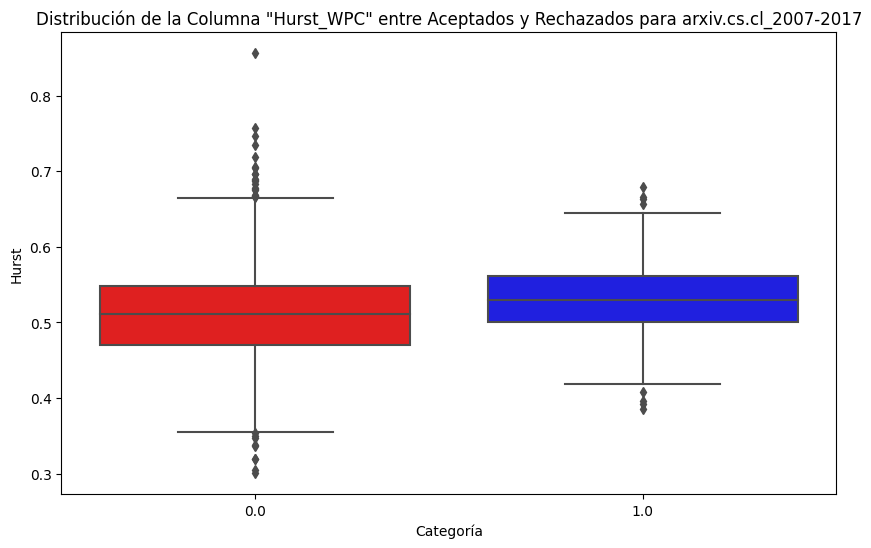

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos que tienen "acl_2017" en la columna "Conferencia"
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.cl_2007-2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_WPC', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_WPC" entre Aceptados y Rechazados para arxiv.cs.cl_2007-2017')

# Mostrar la gráfica
plt.show()


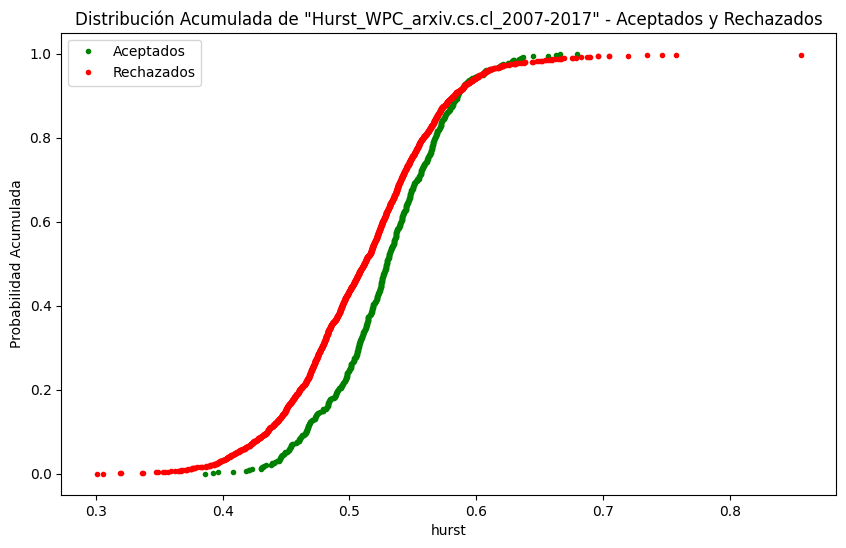

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.cl_2007-2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_WPC'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_WPC'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_WPC_arxiv.cs.cl_2007-2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


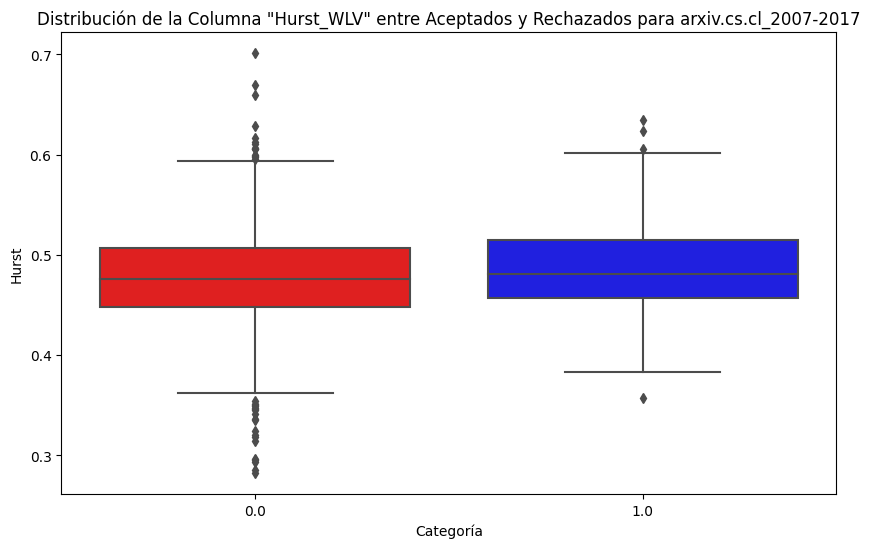

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos que tienen "acl_2017" en la columna "Conferencia"
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.cl_2007-2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_WLV', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_WLV" entre Aceptados y Rechazados para arxiv.cs.cl_2007-2017')

# Mostrar la gráfica
plt.show()


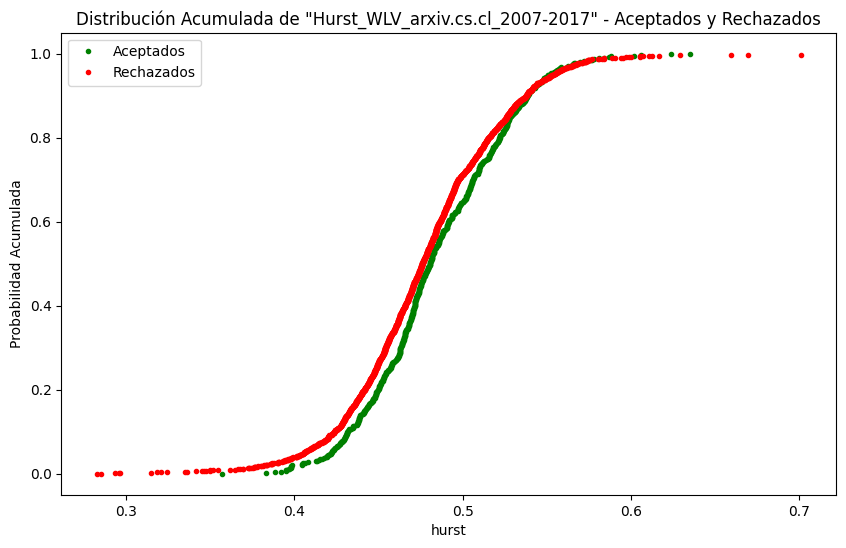

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.cl_2007-2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_WLV'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_WLV'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_WLV_arxiv.cs.cl_2007-2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#Graficas arxiv.cs.lg_2007-2017 nuevos vectorizadores

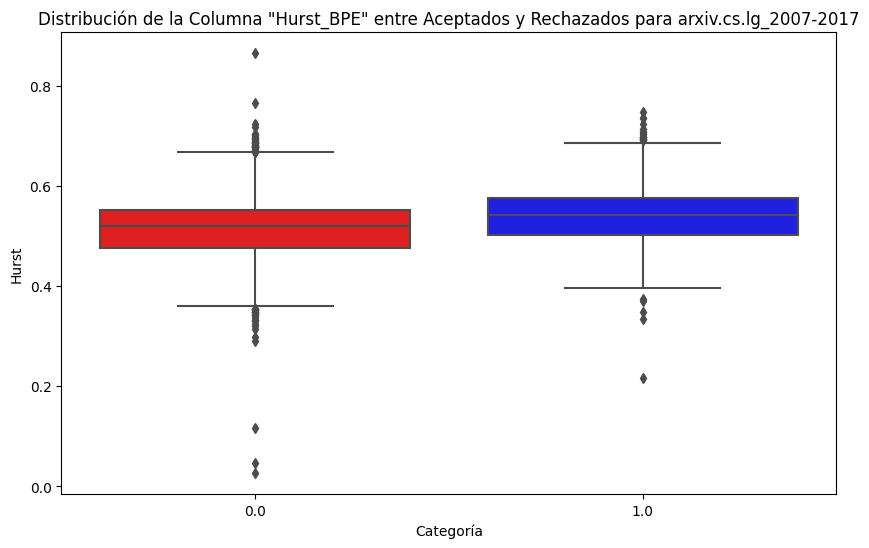

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_BPE', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_BPE" entre Aceptados y Rechazados para arxiv.cs.lg_2007-2017')

# Mostrar la gráfica
plt.show()


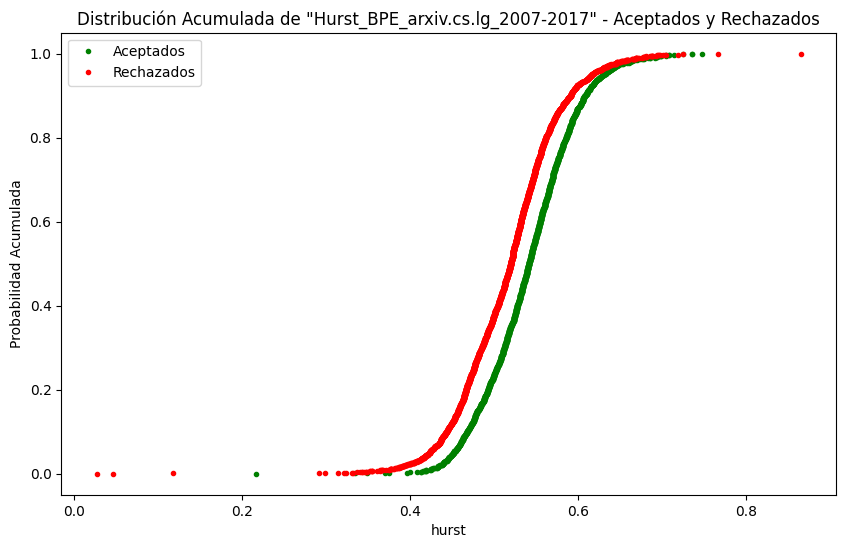

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_BPE'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_BPE'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_BPE_arxiv.cs.lg_2007-2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


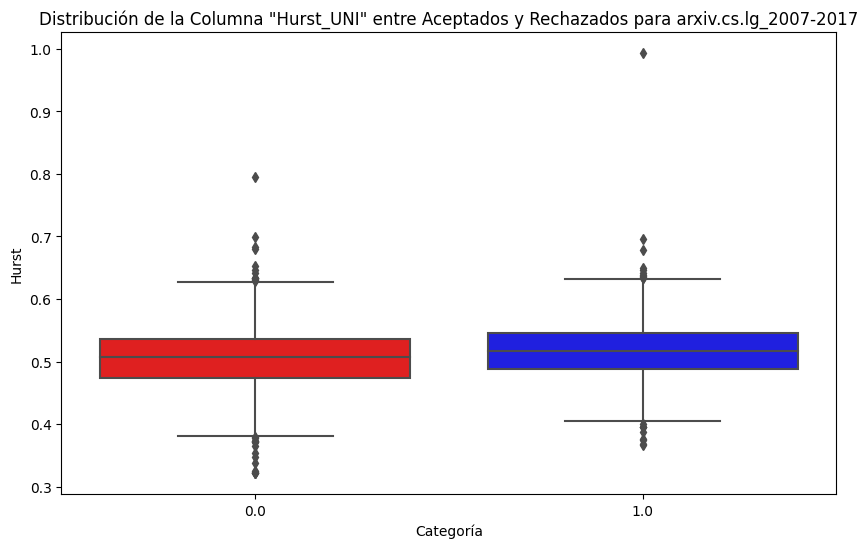

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_UNI', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_UNI" entre Aceptados y Rechazados para arxiv.cs.lg_2007-2017')

# Mostrar la gráfica
plt.show()


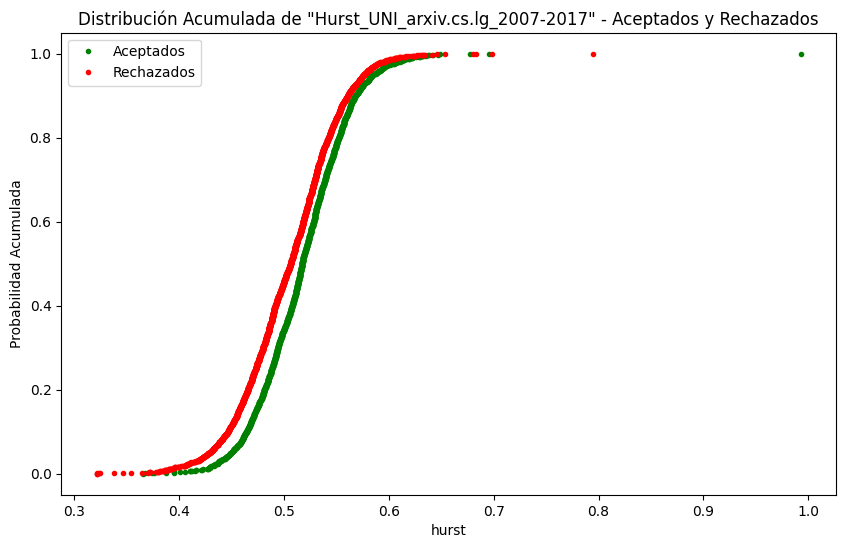

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_UNI'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_UNI'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_UNI_arxiv.cs.lg_2007-2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


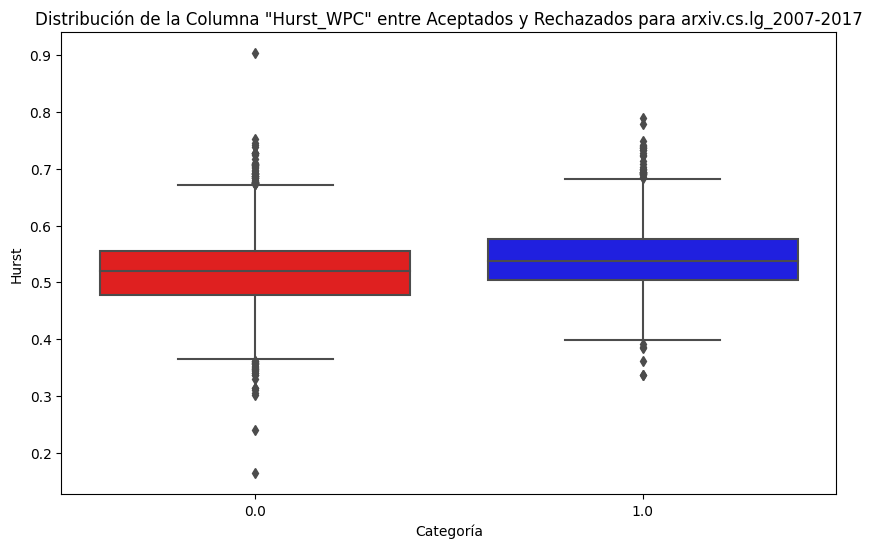

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_WPC', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_WPC" entre Aceptados y Rechazados para arxiv.cs.lg_2007-2017')

# Mostrar la gráfica
plt.show()


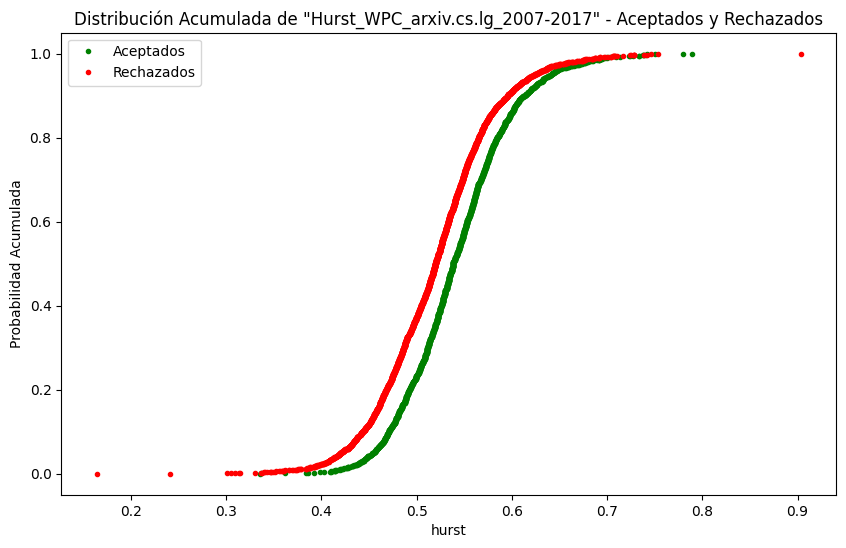

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_WPC'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_WPC'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_WPC_arxiv.cs.lg_2007-2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


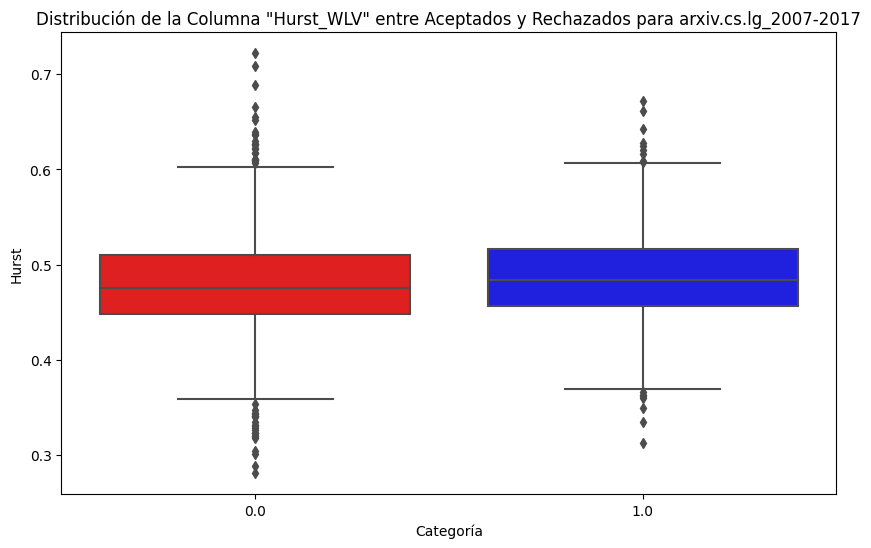

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_WLV', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_WLV" entre Aceptados y Rechazados para arxiv.cs.lg_2007-2017')

# Mostrar la gráfica
plt.show()


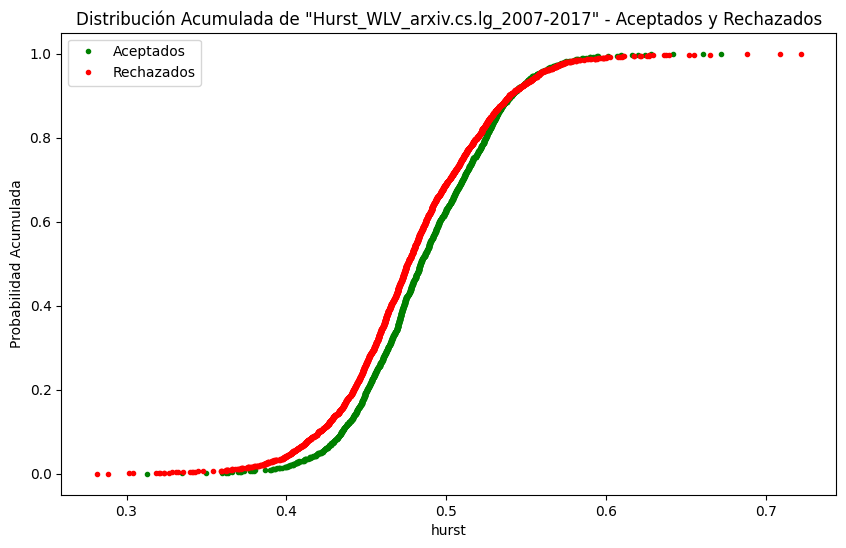

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'arxiv.cs.lg_2007-2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_WLV'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_WLV'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_WLV_arxiv.cs.lg_2007-2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#Graficas iclr_2017 nuevos vectorizadores

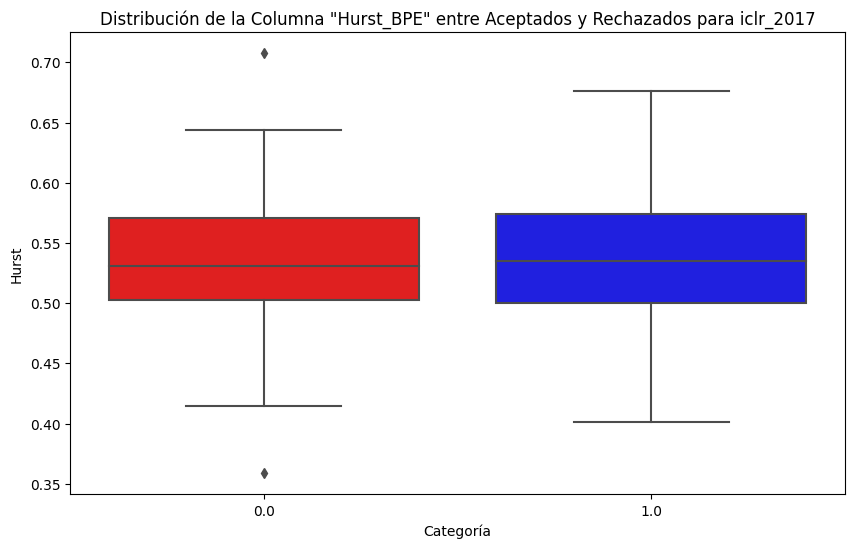

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'iclr_2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_BPE', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_BPE" entre Aceptados y Rechazados para iclr_2017')

# Mostrar la gráfica
plt.show()


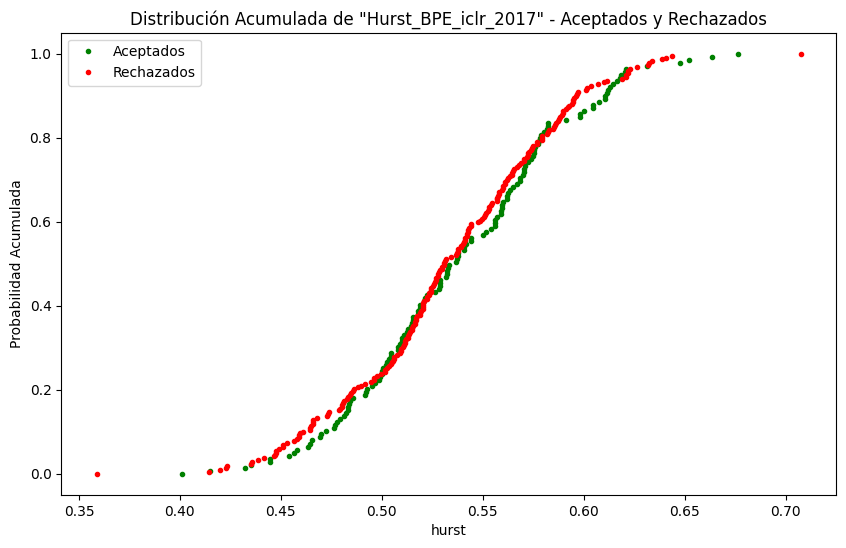

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'iclr_2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_BPE'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_BPE'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_BPE_iclr_2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


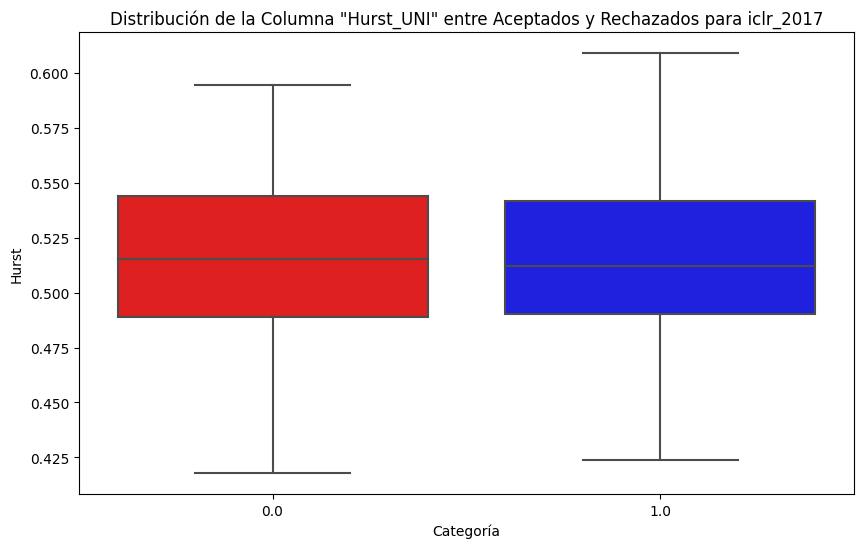

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'iclr_2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_UNI', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_UNI" entre Aceptados y Rechazados para iclr_2017')

# Mostrar la gráfica
plt.show()


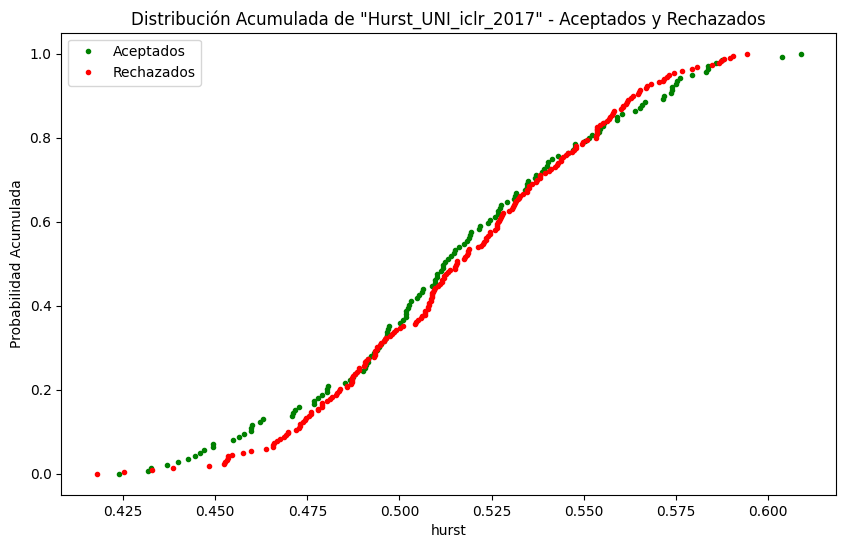

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'iclr_2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_UNI'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_UNI'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_UNI_iclr_2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


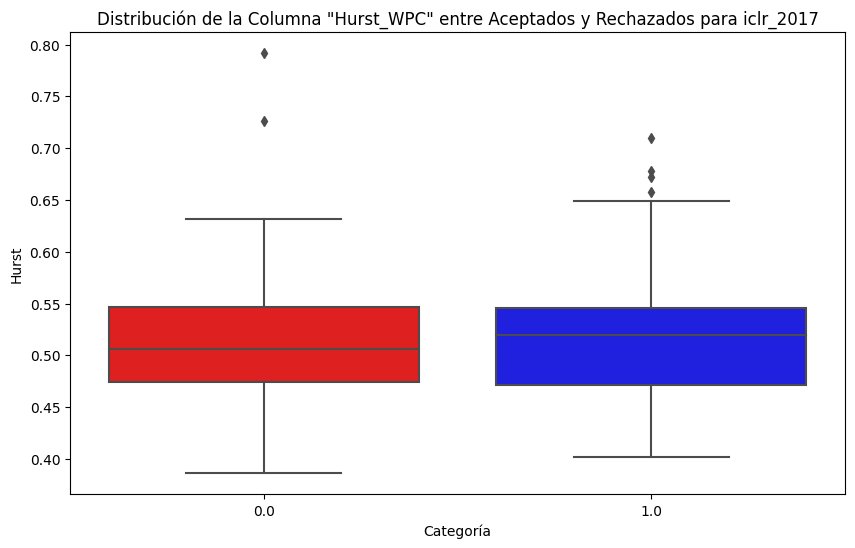

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'iclr_2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_WPC', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_WPC" entre Aceptados y Rechazados para iclr_2017')

# Mostrar la gráfica
plt.show()


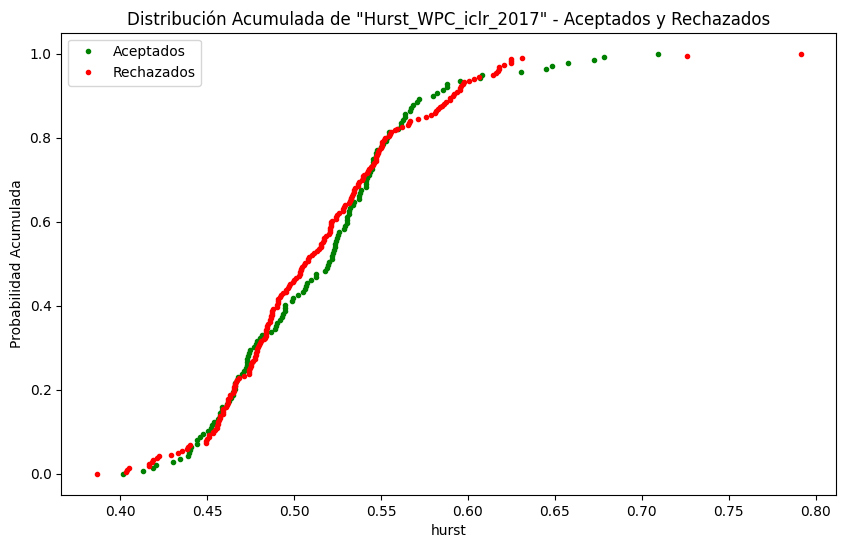

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'iclr_2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_WPC'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_WPC'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_WPC_iclr_2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


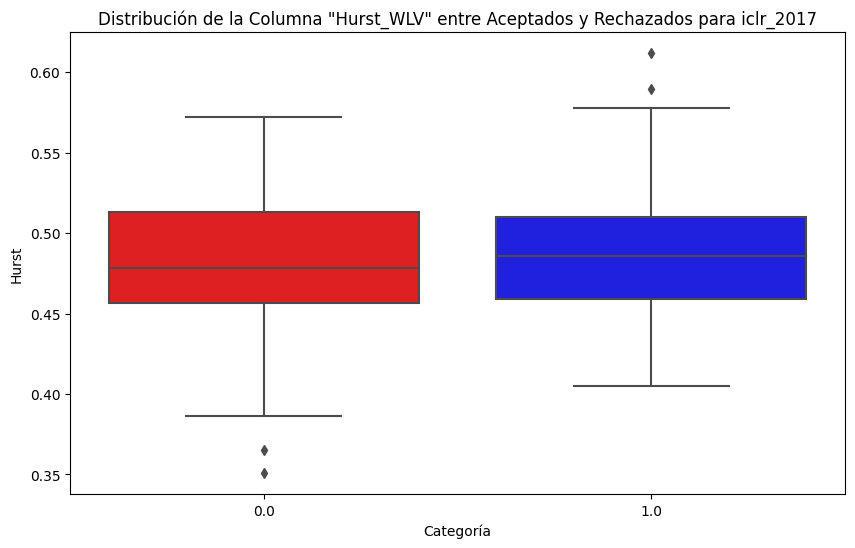

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'iclr_2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_WLV', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_WLV" entre Aceptados y Rechazados para iclr_2017')

# Mostrar la gráfica
plt.show()


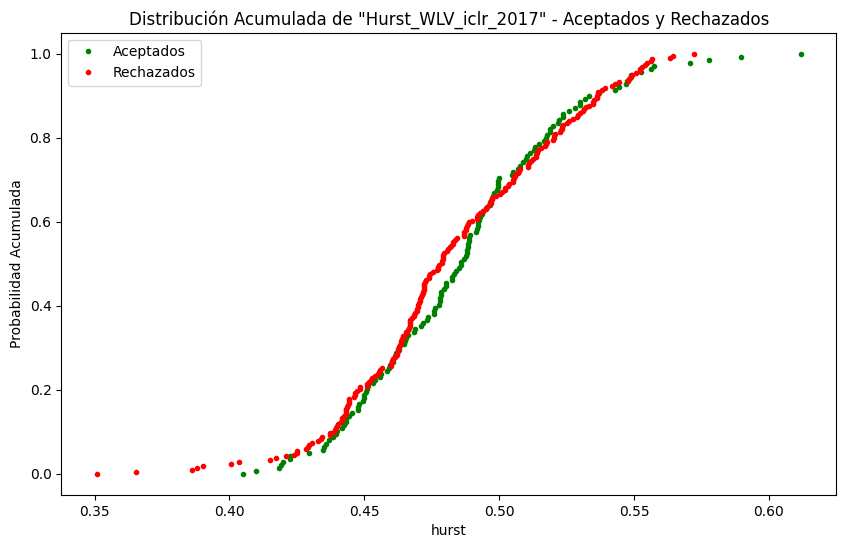

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'iclr_2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_WLV'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_WLV'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_WLV_iclr_2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#Graficas acl_2017 nuveos tokenizadores

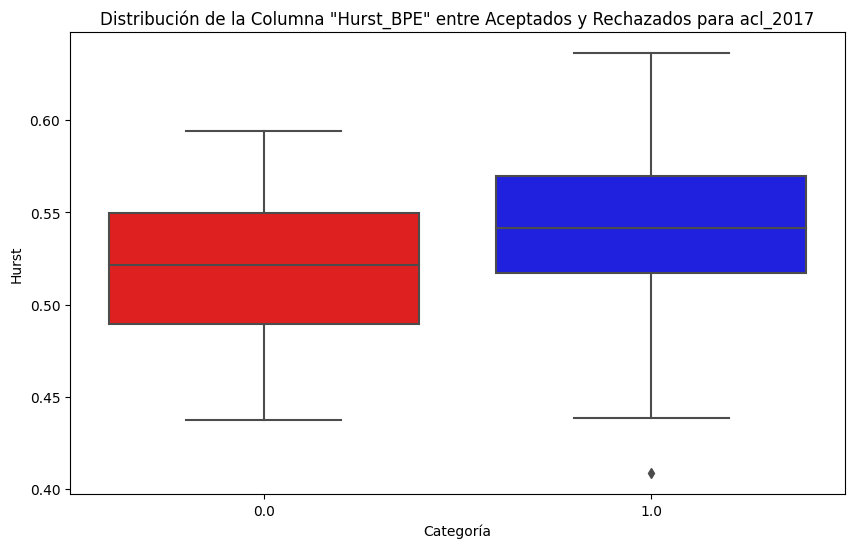

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'acl_2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_BPE', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_BPE" entre Aceptados y Rechazados para acl_2017')

# Mostrar la gráfica
plt.show()


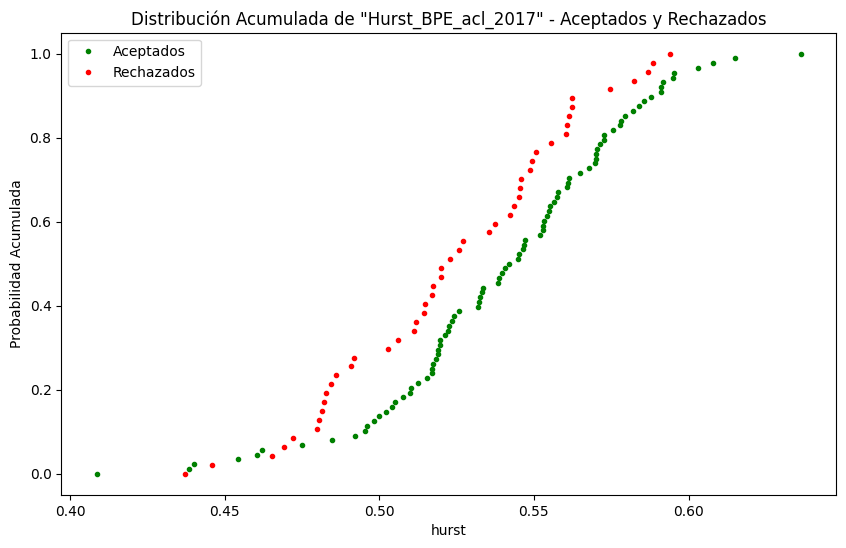

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'acl_2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_BPE'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_BPE'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_BPE_acl_2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


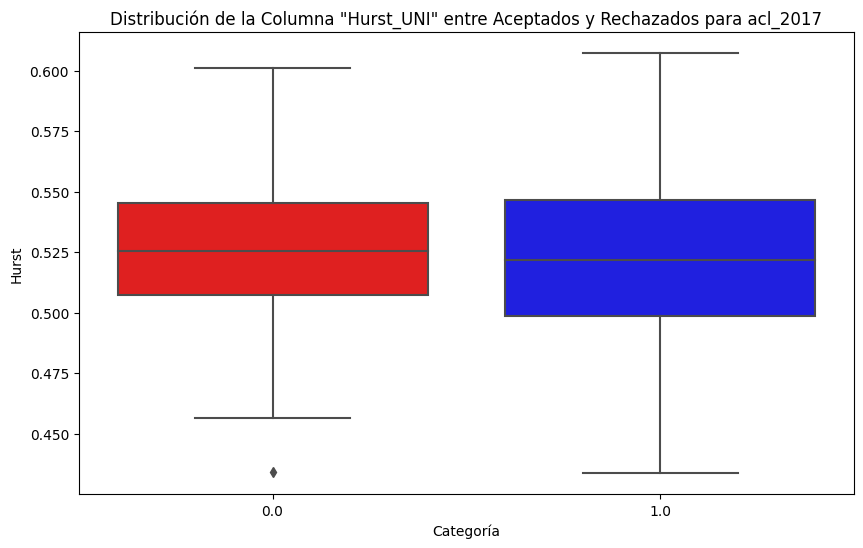

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'acl_2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_UNI', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_UNI" entre Aceptados y Rechazados para acl_2017')

# Mostrar la gráfica
plt.show()


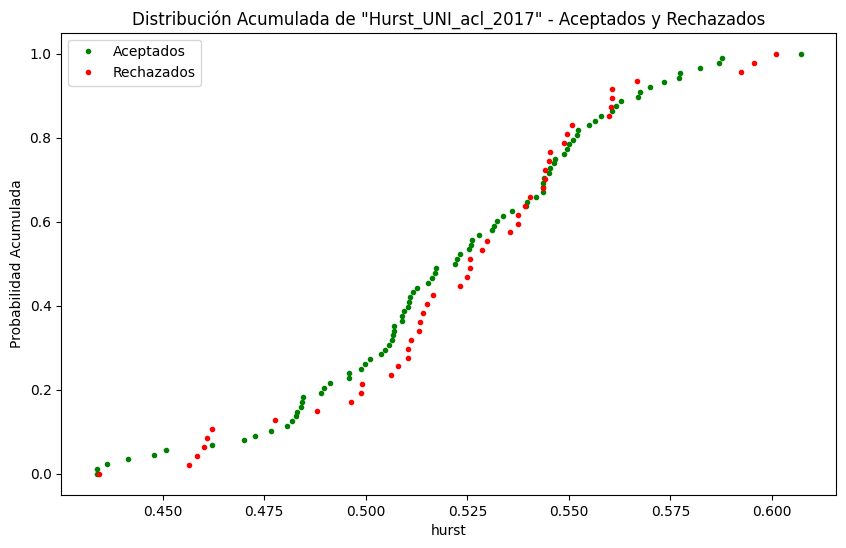

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'acl_2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_UNI'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_UNI'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_UNI_acl_2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


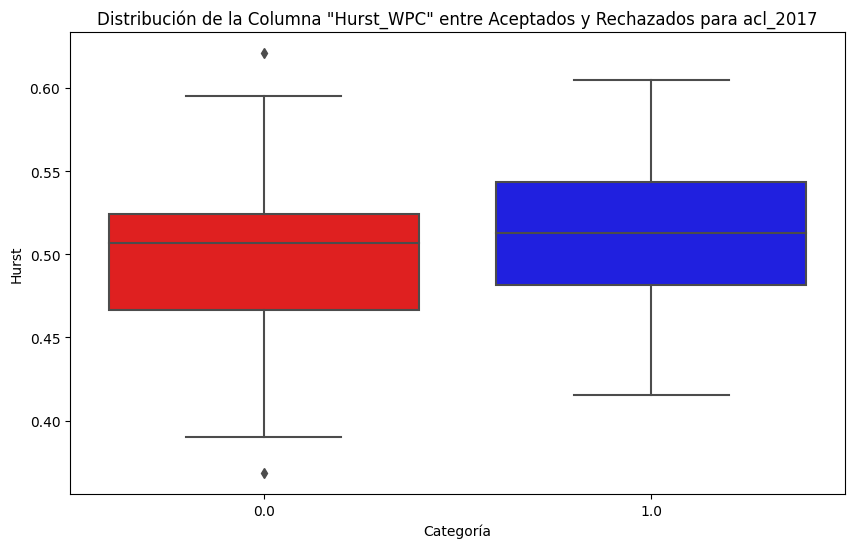

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'acl_2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_WPC', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_WPC" entre Aceptados y Rechazados para acl_2017')

# Mostrar la gráfica
plt.show()


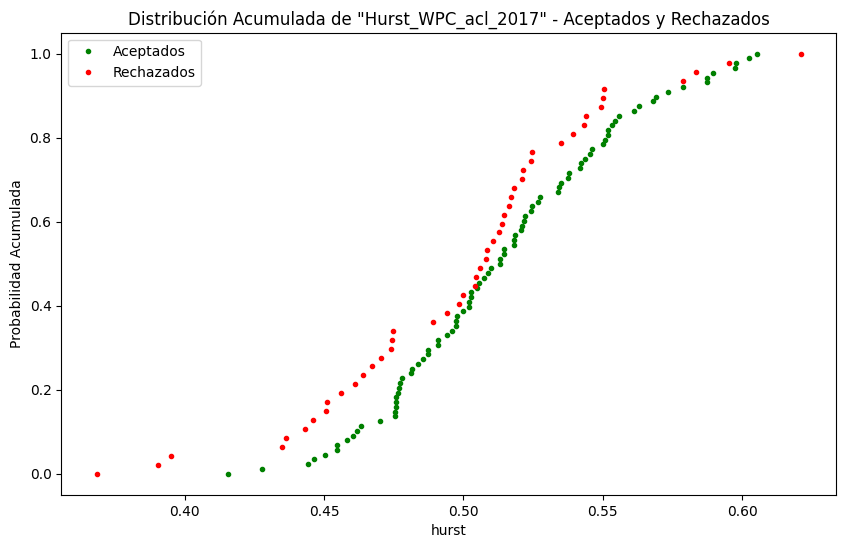

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'acl_2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_WPC'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_WPC'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_WPC_acl_2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


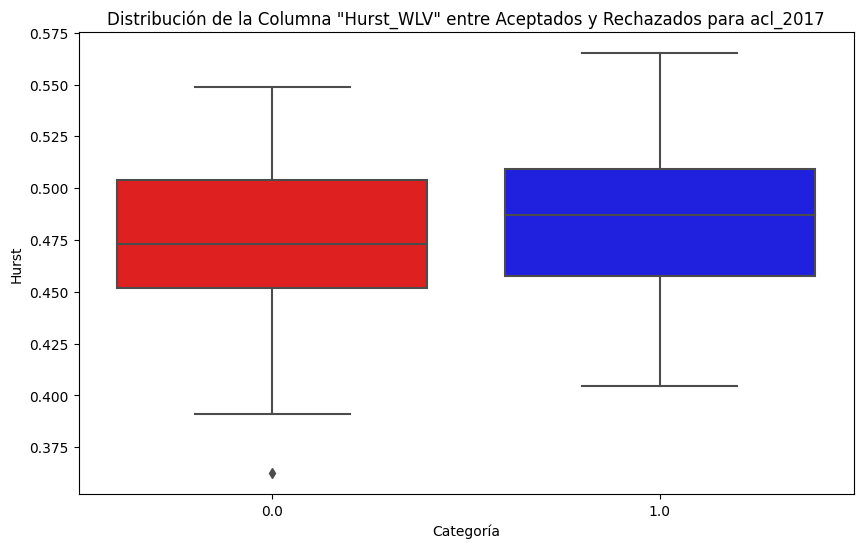

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV con los datos procesados
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'

# Leer el archivo CSV
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'acl_2017']

plt.figure(figsize=(10, 6))

# Graficar un boxplot para aceptados y rechazados en los datos filtrados
sns.boxplot(x='Accepted', y='Hurst_WLV', data=df_acl_2017, palette=["red", "blue"])

# Configurar ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Hurst')
plt.title('Distribución de la Columna "Hurst_WLV" entre Aceptados y Rechazados para acl_2017')

# Mostrar la gráfica
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del CSV
csv_resultados_path = '/content/drive/MyDrive/Colab Notebooks/Transformer/TODOS_HURST_NUEVOSTOKENIZADORES_F.csv'
df_resultados = pd.read_csv(csv_resultados_path)

# Filtrar los datos por conferencia unica
df_acl_2017 = df_resultados[df_resultados['Conferencia'] == 'acl_2017']

# Separar DF aceptados y rechazados
df_aceptados = df_acl_2017[df_acl_2017['Accepted'] == 1]
df_rechazados = df_acl_2017[df_acl_2017['Accepted'] == 0]

# Calcular la distribución acumulada aceptados
sorted_hurst_aceptados = df_aceptados['Hurst_WLV'].sort_values()
p_aceptados = 1.0 * np.arange(len(sorted_hurst_aceptados)) / (len(sorted_hurst_aceptados) - 1)

# Calcular la distribución acumulada rechazados
sorted_hurst_rechazados = df_rechazados['Hurst_WLV'].sort_values()
p_rechazados = 1.0 * np.arange(len(sorted_hurst_rechazados)) / (len(sorted_hurst_rechazados) - 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sorted_hurst_aceptados, p_aceptados, marker='.', linestyle='none', color='green', label='Aceptados')
plt.plot(sorted_hurst_rechazados, p_rechazados, marker='.', linestyle='none', color='red', label='Rechazados')

plt.title('Distribución Acumulada de "Hurst_WLVC_acl_2017" - Aceptados y Rechazados')
plt.xlabel('hurst')
plt.ylabel('Probabilidad Acumulada')
plt.legend()

plt.show()


#aplicar hurst a dataset de noticias y comparalo con este
#lematizar y graficar (todo el dataset)